In [1]:
import pandas as pd
import re

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data = pd.read_table('data.tsv', header = None)
# print(data)
labels = pd.read_table('labels.tsv', header = None)
# print(labels)
full_data = pd.concat([data,labels], axis = 1)
full_data.columns =['Data','Labels']

In [3]:
full_data

,Data,Labels
0,▁All ▁my ▁buddies ▁love ▁Pacific ▁R im ▁and ▁a...,AskReddit
1,"▁I ▁didn ' t ▁really ▁care ▁for ▁it , ▁I ▁thou...",AskReddit
2,▁Tr uck ▁driver . ▁I ▁actually ▁made ▁an ▁atte...,AskReddit
3,▁I ▁used ▁to ▁be ▁' The ▁guy ▁at ▁the ▁window ...,AskReddit
4,▁Hahah aha ▁oh ▁my ▁go sh ▁your ▁poor ▁sister ...,AskReddit
5,▁She ▁shouldn’t ▁have ▁been ▁Ch ucky,AskReddit
6,▁yep . ▁so ▁many ▁liberals ▁fall ▁for ▁his ▁ac...,politics
7,▁My ▁problem ▁with ▁the ▁right ▁isn ' t ▁that ...,politics
8,▁Not ▁the ▁milk ▁too,movies
9,▁The ▁man ▁frequ ents ▁milk ▁bars !,movies


In [4]:
voc_dict = {}
i = 0
with open('vocab.bpe.from','r') as f:
    keys = f.readlines()
    for key in keys:
        if i>2 :
            voc_dict[' '+ key] = i-3
#             print(key)
        i+=1
print(i)

.

▁.

▁the

,

'

▁to

▁newlinechar

▁a

▁I

▁and

▁of

▁that

▁it

s

▁in

▁is

▁you

▁was

▁for

t

?

▁on

▁this

▁with

▁he

▁be

▁they

▁have

▁'

▁but

▁my

0

▁like

▁not

▁are

▁just

!

▁as

-

▁at

▁me

▁so

▁out

▁can

▁The

▁all

▁about

▁his

▁up

▁It

▁if

▁or

▁your

*

▁would

▁one

▁people

▁an

▁get

▁we

▁from

m

...

▁when

▁him

▁do

▁what

▁had

)

▁them

▁her

:

▁their

▁1

▁more

▁she

▁time

▁*

▁there

re

▁think

▁don

▁because

▁who

▁(

▁how

▁has

▁He

▁2

▁will

▁by

▁know

ed

▁no

/

▁were

▁some

▁really

ing

▁That

▁You

▁even

▁This

▁been

▁than

▁only

▁good

▁then

1

▁They

d

▁now

▁got

ve

▁too

▁>

▁could

▁way

▁going

▁see

▁being

▁much

▁make

▁back

▁And

▁go

▁still

▁into

▁over

▁other

▁If

▁did

▁want

▁never

▁shit

▁off

▁-

▁right

▁thing

▁A

▁something

▁3

▁years

▁after

▁say

▁should

er

▁any

▁But

▁first

▁also

▁game

▁didn

▁actually

▁My

ll

▁said

▁down

▁We

5

▁year

▁why

2

▁where

▁guy

y

▁someone

▁most

▁


uff

▁jump

We

▁ends

▁built

▁positive

▁machine

▁FBI

▁treat

app

▁afraid

▁folks

▁guilty

▁message

▁Roy

fully

▁language

▁rock

med

ines

li

▁?

ron

king

go

▁politics

ying

▁lucky

tr

▁gift

▁taxes

▁mo

▁“I

▁dating

ock

owing

▁balls

▁hoping

▁grade

▁private

▁option

▁harder

▁currently

▁rec

▁excuse

ys

which

▁White

▁def

▁considering

▁scared

ures

▁pet

▁Mr

▁Snoke

atch

ere

▁names

▁blow

▁planet

AD

▁appreciate

▁wouldn’t

ised

ey

und

▁tough

▁failed

▁healthy

▁truck

▁hated

▁laughed

▁staff

▁marriage

▁universe

▁sun

▁Wh

▁proud

removed

▁wild

ced

▁Black

▁awkward

▁haha

▁Actually

▁smell

▁Will

▁manager

ree

▁club

let

▁project

▁NBA

af

▁cute

amp

▁zero

ited

▁anywhere

▁national

▁bank

▁impossible

rd

▁becomes

▁throwing

▁cast

▁talked

▁ride

▁released

▁giant

nt

▁cry

▁annoying

▁program

ently

oy

der

No

▁ST

▁loves

▁posts

▁following

▁trump

▁bottom

▁pack

▁expecting

▁keeping

▁Except

▁z

▁source

▁bus

▁sentenc

illy

▁basis

▁WITH

▁print

▁illness

▁creating

▁referring

away

▁focused

▁shield

▁prosecut

▁pic

▁harm

▁Run

▁oper

▁panic

▁debate

▁Usually

▁beats

▁reminded

▁Tri

▁wise

▁HAVE

▁complicated

osing

▁officials

▁bang

▁causing

ought

▁Sy

▁Steelers

cast

▁Sunday

▁murdered

▁flair

▁disease

▁plate

▁Gold

▁expansion

list

▁sue

▁Kinda

▁ignorant

▁forces

▁fur

▁waited

▁besides

▁til

▁None

oose

rent

▁pig

▁differently

▁suffer

▁buff

▁blowing

nn

▁inst

abb

eel

▁invited

▁equipment

▁relax

▁Adam

▁dislike

che

ove

▁Jr

▁burned

anted

▁egg

osh

▁vehicle

▁marry

▁replies

▁continued

▁acceptable

▁Green

▁sandwich

▁Merry

▁domin

aa

▁height

▁tea

▁Cor

▁Sun

▁uh

▁dicks

▁Sn

▁programs

▁AD

▁frequently

▁basement

ares

ius

▁acqu

There

▁adding

▁Welcome

▁intentionally

craft

atives

▁values

anged

▁library

▁succeed

▁zone

▁facing

▁tele

ooo

▁nervous

▁struggling

▁slap

▁Dan

▁jumped

▁Reminds

▁reports

▁MS

▁supp

▁object

▁grandmother

Is




▁discussing

▁simultaneously

▁Skyrim

▁ties

▁begging

▁aid

▁heel

lif

▁Bernie

▁complained

▁warrant

▁bel

eeee

ij

▁sne

▁Seattle

stand

▁intimid

▁commentary

▁everytime

▁SK

▁empathy

▁recruit

▁spite

▁Microsoft

▁Acc

▁consumer

▁resume

▁variety

▁CR

▁buddies

▁chuck

▁accountable

▁invent

▁coord

▁Rams

▁christ

▁Dick

Let

▁mock

▁upgrade

▁gravity

▁buildings

▁DM

▁territory

▁Omg

hin

▁Cur

▁elaborate

▁hardcore

aching

onies

▁lips

andom

▁realizes

▁Ive

▁overwhelming

▁Legend

ressive

step

▁engineering

▁vehicles

▁relative

ression

▁watches

▁adapt

▁follows

▁Thunder

▁assists

▁loc

▁Hue

aur

▁“You

▁Klay

▁Ins

▁shocking

▁string

▁mechanic

▁pleasure

amps

▁scores

vis

high

▁Adams

ouse

▁nic

▁Conf

▁Boo

▁whats

wl

▁defender

mission

▁Oregon

▁trail

▁needing

▁spawn

pend

emes

▁determine

▁Yo

mond

azi

▁would’ve

icked

▁casually

▁efforts

▁Stone

▁differences

▁YES

▁medication

rett

wide

▁clown

ican

▁DNA

▁gri

▁blanket

▁closely


▁nostalgia

▁Indeed

▁celebrities

sex

Star

▁grip

▁lungs

ingers

▁BU

▁hockey

▁Manafort

olds

uper

▁Cra

▁Deep

▁occasion

ez

▁conc

▁chaos

▁promises

▁trolls

▁props

▁MO

▁enormous

▁supervisor

▁folk

▁ML

▁alternate

▁vanilla

▁fairness

▁POTUS

gage

sec

▁regime

forced

▁gall

▁storage

heard

▁surf

▁haircut

▁robbed

▁layer

tf

▁rally

▁bleeding

boys

▁hadn’t

amin

▁funded

▁justified

▁undefeated

▁repeating

▁OSU

▁fascist

▁OG

▁impro

wor

▁THERE

▁FF

▁lau

▁promotion

▁bible

▁amaz

▁Christianity

▁Ang

▁PhD

▁Living

▁genetic

▁sustain

▁autistic

▁unhealthy

▁Loved

ophobic

▁vegan

eme

di

▁Calling

▁accidents

wr

lights

esque

mel

▁fried

▁spoil

▁divide

▁lighting

▁Saying

actic

▁TEDDY

▁exotic

▁contribute

▁wig

▁disrespectful

▁exhausted

▁anonymous

▁lemon

▁gloves

aires

prop

▁presumably

irty

▁overl

Wow

eemed

inge

▁noticing

breaker

osure

▁souls

▁honesty

ula

▁theyre

▁Suddenly

▁bin

▁Mill

▁Third

▁jedi

ellow

▁mart

ras

aired



▁overt

▁Remind

iden

▁bulk

▁trials

edy

▁assigned

▁cube

▁steady

orporate

▁yells

▁Timmy

igation

▁NASA

▁netflix

REAT

▁retiring

▁responds

▁adren

MM

▁Mississippi

▁correction

▁mixt

▁convey

▁chop

▁shat

▁profession

▁vets

▁lecture

▁resolved

▁stoned

▁coun

▁eternity

▁Goo

▁awe

▁stap

otics

▁mater

▁sticker

▁sperm

▁EVERYONE

▁Sort

▁Sug

▁hunger

▁masturbating

▁Raw

▁butts

▁chooses

▁dose

▁nutshell

▁Key

didn

▁obscure

▁vampire

▁doubled

▁Normally

▁inn

▁seizure

ASH

▁Rico

▁Kong

▁chicks

▁finest

ohn

▁Nether

▁Dist

▁err

▁Lam

▁container

▁mines

▁vibr

▁producers

▁boarding

rolls

otine

▁Snap

▁Zach

ounter

▁homo

▁Huge

▁roots

qual

▁Hmmm

▁satisfaction

▁mama

▁fue

▁sting

▁archite

▁protocol

▁monkeys

mans

▁contempt

▁roasted

▁bol

▁gallon

▁emphas

▁sketch

▁Thing

▁accom

▁Ald

▁stripper

▁fountain

▁SHOULD

▁parrot

▁recon

oore

immer

▁academy

▁kylo

▁Video

▁cyber

oration

▁accommod

▁smartest

▁distribution

▁beautifully

▁propo

▁monop

ceries

hile

▁insan

▁Oblig

▁Winst

arios

▁restaur

▁thous

▁toile

▁proble

meric

▁intell

▁whatso

▁weap

▁charac

▁oppon

▁opin

▁suppor

▁mone

▁occas

▁holid

▁behav

▁repres

OPLE

▁citiz

▁acce

ophren

▁figh

▁pock

▁becom

evit

▁themsel

▁traum

▁sympt

▁acknow
15003


In [32]:
# token_pattern = re.compile(r'▁?\w+')
token_pattern = re.compile(r' \S+')

In [33]:
tfidf = TfidfVectorizer(token_pattern = token_pattern)
features = tfidf.fit_transform(full_data.Data).toarray()
print(type(features))

<class 'numpy.ndarray'>


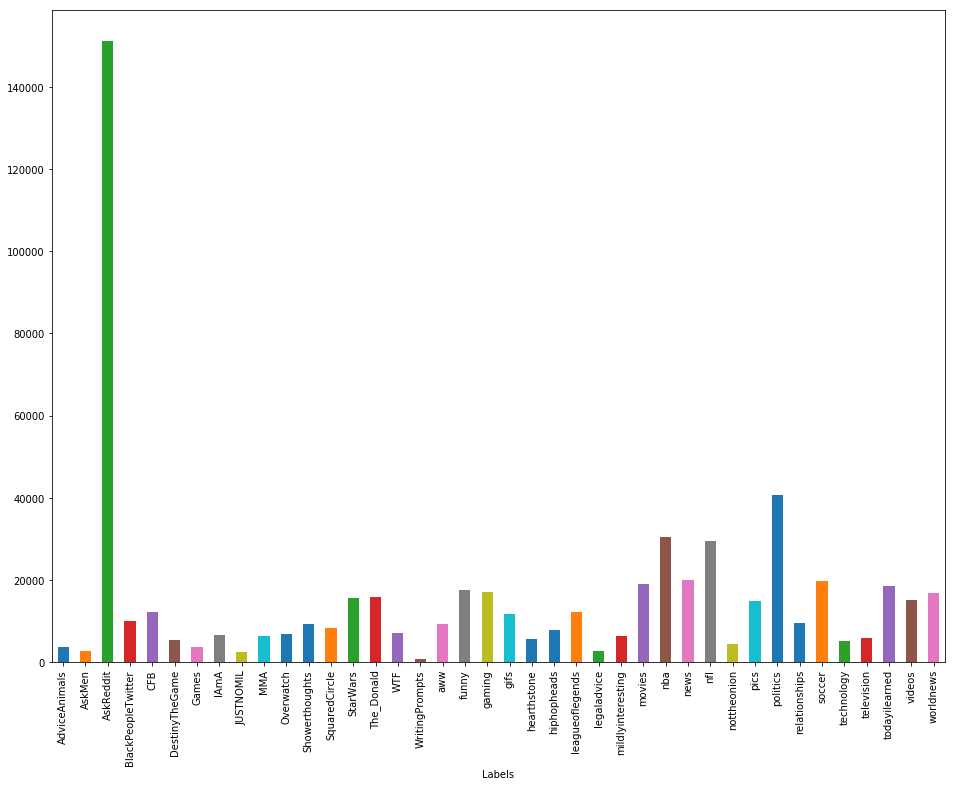

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
full_data.groupby('Labels').Data.count().plot.bar(ylim=0)

In [34]:
print(type(features))
print(features.shape)

<class 'numpy.ndarray'>
(608979, 12788)


In [35]:
from scipy import sparse

In [36]:
X = sparse.csr_matrix(features)

In [37]:
X

<608979x12788 sparse matrix of type '<class 'numpy.float64'>'
	with 16122676 stored elements in Compressed Sparse Row format>

In [93]:
word_vector = np.zeros(40)
word_vectors = np.zeros((15000,40))

In [95]:
for i in range(12788):
    for j in range(608979):
        ft = features[j,i]
        word_vector[Y_list[j]] += ft
    
    word_vectors[i,:] = word_vector
    print(feature_names[i])
    print(word_vector)
    word_vector = np.zeros(40)

 !
[ 132.97155749  263.52310655  358.40511049  464.93635352  105.86255957
   65.0827018   149.42992376   23.41821889   65.28748366   95.65196128
  100.35908145  156.14360819  228.48565429  152.7833321   197.04997171
  294.00362852  222.97706196  161.13231729  138.11558827  575.45666667
   19.62456537  287.33072286  111.36612554  132.86926594  408.46926529
  156.33783892  302.95544465  295.05013905  293.63351417   75.19478522
  109.57653834   34.49028264  290.03837416   80.42326798  362.74103799
  155.44462888   41.76325493  122.41153678 2543.74272112   46.19716037]
 "
[ 0.20888415  1.79589097  2.1473767   1.36212397  0.39674517  0.4808611
  1.02152938  0.77447949  0.19501243  0.718345    0.75383516  0.24564367
  3.56259194  2.61869002  3.15072621  3.95438162  1.71951231  0.29491286
  2.05844339  6.72776259  0.16140189  0.43640399  0.98471198  4.14639356
  1.69697026  2.54191112  1.13882919  2.20280103  2.30093559  0.92660205
  0.84160759  0.35637889  3.45070591  3.54927006  0.12973666 

 ...
[  61.18237336  168.04668702  194.45749809  188.06197352   54.24401936
   53.52467116  114.04780095   24.46107661   40.50777395   61.218334
   86.75252791   86.45565977  203.10640102   70.31762504  160.54597758
  243.30125903  196.94145692  121.2151731    80.4975532   389.02197797
   11.43587648  153.82494436   85.58185017   96.61408265  234.94851696
  138.40798583  112.58212698  181.59622925  158.67411335   45.93038237
   29.66665169   23.29025628  190.98840107   48.81053487  182.57014184
   80.24994028   39.49523993   86.9194133  1601.95692461   11.59178307]
 /
[ 51.8686522   73.13189096 127.90248341  55.97666914  58.25185502
  32.67882516  59.43639532  20.15807691  18.81212369  25.55093105
  37.65512067  50.28558517 219.18495112  41.30869256  87.58164879
 136.86990365 111.09712971  65.64450111  42.26535524 184.2787503
  19.5832399   76.84341334  47.10975405  87.31836827  98.1789109
  80.41938274  53.05944928  93.34380119  85.44587385  31.67261987
  13.58349925  21.64231066 101.

 >
[1.14155532e+00 4.50052844e+00 5.84944438e+00 6.80584776e+00
 4.73954426e+00 3.47501079e+00 2.43699581e+00 2.82939142e-01
 1.84153985e+00 5.89803643e-01 2.76114276e+00 3.35921707e+00
 1.57660294e+01 1.21892395e+00 5.26043627e+00 1.11581092e+01
 3.37331648e+00 4.01732599e+00 3.86215857e+00 1.47039955e+01
 5.94599893e-01 1.70777957e+00 5.30660013e+00 1.03173735e+01
 6.31707748e+00 8.31595744e+00 4.85091376e-01 4.21504675e+00
 5.54505252e+00 9.69683020e-01 6.19540647e-01 1.34530325e-01
 5.24608087e+00 1.28186332e+00 4.57631325e+00 1.94277596e+00
 3.47462596e+00 1.60507022e+00 4.12455626e+01 2.66518160e-02]
 ?
[ 257.43426631  300.17823938  416.9287404   323.55812708   95.41799602
  131.15316264  221.75355415   71.92926277   83.77513788  134.52867318
  114.43938457  160.15838331  561.18615114  161.00494864  367.85863524
  573.76054323  439.03853181  233.53677777  137.69438793  771.98446845
   67.32520498  282.65538483  245.22352256  252.15813265  438.8641403
  372.02657411  212.05563757 

 abbed
[0.09574408 0.36787443 0.1553854  0.         0.         0.
 0.         0.         0.         0.54543398 0.         0.14823338
 0.16074443 0.         0.         0.46973539 0.5328902  0.
 0.         0.4259066  0.         0.         0.         0.80267425
 0.         0.3728143  0.         0.99189976 0.47052106 0.63236762
 0.15586723 0.         0.28214926 0.         0.09201488 0.24414701
 0.         0.70639443 1.63018991 0.03820358]
 abbing
[ 0.6083032   1.58594707  2.23579541  2.25819945  0.50360139  0.27370564
  0.5053883   0.179334    0.          0.34023444  0.          0.
  0.31976029  0.80484492  1.3811562   0.62652032  1.27076998  0.52333837
  0.04086464  1.95647418  0.          0.          0.60059959  4.02741128
  1.02647213  2.35911141  0.          0.54452598  0.53355856  0.98664645
  0.84314263  0.07602866  2.63318428  0.2529295   0.          0.16498731
  0.39658313  0.20103218 13.08197803  0.02534327]
 abe
[ 0.24533158  2.37224798  2.2599757   8.49691309  0.          0.
  0

 ac
[  9.2420137   11.64877874  11.93783458  22.02977951   6.53129281
   5.7812792    7.6393632    2.28118103   2.39080098   6.1888218
   3.84172761   6.93819635  25.28407298   6.46366036  13.12071772
  17.22065845  15.00589571  34.34030348   7.85688638  33.91510973
   3.370747     5.33991634   6.29581261  13.39834752  15.7281806
  19.58427732   8.92969231  20.93491289  10.35062602   7.33287789
   1.41043662   2.28712679  20.44069783   1.95460822  12.00354176
   5.00483637  15.23844664   4.90017499 133.5447907    1.18931992]
 acare
[0.         0.         0.         2.00346418 0.         0.08431547
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.12592278 0.
 0.         4.78493974 0.         0.         0.         0.
 0.         0.         0.         0.         0.         2.74615746
 0.         0.         0.         0.         0.         0.
 0.         0.         0.64037142 0.        ]
 acc
[ 0.         13.78875052  2.02950481  3.6

 achu
[ 0.5709636   0.          5.63028901  0.          0.          0.
  0.          0.07536692  0.          0.          0.          0.
  0.          0.          0.          1.14843661  0.          0.
  0.50025931  0.          0.          0.          0.          0.
  0.          0.          0.         16.66918997  0.41331721  0.
  0.          0.22427356  0.51272524  0.          0.          0.1028135
  1.20849915  0.          6.55867196  0.        ]
 acies
[1.34740959 0.5571022  0.24555768 0.72466416 0.         0.16563142
 0.594877   0.3765009  0.         0.15026365 0.         0.
 1.28784458 0.         3.9713324  0.25485313 1.85966209 0.
 0.         6.06200465 0.         0.78312791 0.89637447 0.24670421
 0.         1.90624633 0.         0.37656718 0.         0.1387102
 0.         0.         0.80785606 0.10803905 0.42779826 0.50838788
 0.         0.         9.68749438 0.        ]
 acing
[ 0.         14.05078538  4.81920503  0.63167454  0.          0.92342452
  0.57527993  0.13490303  0.3

 action
[ 0.54368167  1.52752757  5.38368961  2.73524719  0.69426582  0.
  0.83482797  2.32272398  0.28667585  0.87220083  6.41093572  0.
  2.34330092  0.          2.00528408  0.88529931  3.46656081  0.47543622
  0.          5.84246643  0.09481897  0.18055416  0.          0.80521846
  1.68511044  1.4172066   0.2055065   5.95457463  0.89450171  0.32735795
  0.08968704  0.          1.53666243  0.44242837  1.0601923   1.11718145
  1.35098472  1.56343699 11.01975603  0.52430086]
 actions
[0.         0.12628147 5.18250707 0.17597248 0.         0.
 0.23688029 0.61263361 0.         0.         1.66828565 0.
 0.35813633 0.         0.67457568 0.         0.93870002 0.
 0.54324473 1.17690667 0.         0.         0.24905146 0.49207875
 1.45330709 0.34214149 0.         0.         0.76857894 0.
 0.06891512 0.         0.05505174 0.         0.13359237 0.52140833
 0.         0.         6.36419571 0.04789589]
 active
[0.953609   0.52065567 3.10790454 1.29780974 0.53215431 0.51788059
 0.         0.999516

 ado
[ 0.69399898  0.60253635  0.43938163  0.59033755  0.          0.30542017
  1.46199033  0.23347859  2.1183787   0.94014944  0.73032281  2.39585837
  0.58089971  1.26804696  0.9701436   4.17867134  1.94596804  1.54877852
  1.52402882  5.32591374  0.          3.14582933  4.81139937  0.07831468
  0.          4.36151649  1.0437298   5.62057789  0.55155509  0.81264847
  0.          1.14725141  0.56265968  0.          2.87108941  0.17068098
  0.04831371  1.83718547 20.49839325  0.07196937]
 ador
[0.         0.         0.27686005 0.91340069 0.         0.
 0.         0.         0.         0.         0.         0.
 0.12619237 0.14877981 5.49921722 0.         2.70250381 1.53719641
 0.         5.8349199  0.         0.31311176 0.         0.31412534
 0.64988493 1.88882634 0.19802863 0.47481975 0.         0.42549828
 0.         0.         0.38086498 0.         0.21532485 0.
 0.         0.         4.5062677  0.10140386]
 adow
[0.         0.77609392 1.18660856 0.         0.88589302 0.
 0.         

 aged
[ 1.57375198  2.5911843   1.85330337  2.32682431  0.3239998   1.90531664
  1.80407247  0.21900882  0.24881099  1.76830324  0.53106671  1.06859457
 12.96977112  3.35270219  3.96547253  3.99133033  4.30995643  1.77700735
  0.86370136 10.07001161  1.08980813  2.49004409  1.06482743  1.13181696
  1.29438711  0.67022587  1.35074924  3.14817779  3.40462463  0.09701476
  1.19558142  0.49627593  3.7582328   0.34143884  1.49121883  1.64541948
  0.67111368  0.85510327 39.96192226  0.25583628]
 agement
[ 0.          0.46173122  0.          0.73756445  0.0669183   0.49952821
  0.          0.66426396  0.          0.          0.67435999  0.17375331
  2.56395716  0.3744072   0.15899229  0.54500555  3.01571097  1.42140196
  0.6360488   0.8887698   0.63157695  0.          0.64788358  0.19015846
  0.30357329  0.28392467  2.39131961  0.          0.56857822  0.63059434
  0.          0.05261564  1.17341619  0.          0.87626871  2.00233856
  0.          0.         12.97482208  0.        ]
 ager
[ 1

 agram
[1.00220645 0.         2.18418455 0.         0.         0.02778123
 1.12540586 0.         0.46878922 0.         0.         1.01264989
 1.30372091 0.12156374 0.5189001  0.61481689 0.06922339 0.
 1.25796596 0.49393574 0.8023662  3.0468762  1.31218515 0.59619822
 2.04601493 0.70387086 0.24502519 0.         0.         0.
 0.         0.         1.9365412  0.66751542 0.37516171 0.
 0.36739224 0.54000216 5.51328285 0.03788554]
 agraph
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.82617773 0.         0.54630794 0.22030444 0.         0.
 0.         0.         0.         1.15367599 0.         0.
 0.         0.         0.         0.58428236 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         2.07052234 0.        ]
 ags
[ 0.13756422  1.36534933  1.02763193  3.82940023  0.15264042  1.60594756
  4.08315461  0.27017812  0.88217758  2.65338667  0.74282202  2.00838251
  0.584199

 ain
[  2.66188732   3.14008194   9.72842216  14.58383599   4.79921596
   3.68687767   7.16738885   5.1168156    3.64123509   2.67468867
   1.87371608   4.14989646  15.99969711   4.71411278  17.46563486
  12.24425183  15.07212878  10.64178868   5.82476201  39.0080865
   3.29872671   7.70606193   7.47863482   8.28241907  10.4098146
  21.17783569   1.45706108  12.94384541  12.84615494  13.98976015
   1.80940977   0.94664528  16.53922138   4.39177087   8.33416904
   7.468621    12.06145034   4.19422387 104.81273714   0.63713174]
 aine
[ 0.          0.          0.92766992  1.91140681  0.          0.32779842
  2.84749274  0.          0.          3.26225628  0.15276888  0.54736156
  7.21299342  0.         12.10189272  2.92930704  1.89231787  0.56887336
  0.          6.81441028  0.          0.          2.18071421  0.
  0.4827189   2.37925676  0.57622988  4.61863961  0.54243532  0.94853946
  0.23715334  0.61016788  1.13510555  1.6805184   1.53857196  0.27465991
  0.37755302  0.61225271 25.8129

 ak
[ 4.13513743 17.97791718  9.29117789  7.23379835 10.37629315  1.90772346
  1.75964337  3.40121362  0.60480516  2.44825367  2.85330554  4.06546245
 23.78290452 23.30513295 10.52257363 36.48674912 12.54494475 12.40102334
  3.73277765 16.63613512  0.28520221  6.64001732  4.97353128 12.15039446
 11.75069174 32.14999195  6.46745962 19.3195804   7.11388418  3.34138273
  0.70517207  1.61623135 18.20638876  1.85369455  5.28037414  2.0538862
  9.76489447  5.47617957 83.96564327  1.33506508]
 aka
[ 0.09637762  0.          0.16358279  1.11826191  0.12812704  0.
  1.05059366  0.1333689   0.46626245  0.27648713  0.02751437  0.
 16.64499262  2.49236493  1.79664636  0.25326608  1.33056948  0.
  0.89709472  1.90286374  0.          0.98235101  1.86908661  7.38947713
  1.22707381 18.55612541  1.07125018  0.56440705  0.6468724   0.
  0.38760838  0.07506275  1.42188484  0.22288365  1.45401443  0.66137932
  4.83166772  0.23517635  7.43334877  0.        ]
 ake
[ 2.39882741  2.66060576 12.89694816 12.790

 alaxy
[0.         0.4103058  0.         0.         0.         0.
 0.         0.         0.         0.         0.41518912 0.
 0.         0.         0.314347   0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.57025638 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.78010478 0.        ]
 ald
[ 2.70540074  0.27083052  4.51511015  4.92526251  0.40328404  0.53365327
  2.19880094  1.97668407  0.          1.7748314   0.          1.27639323
  7.09360564  0.16947106  3.07158559 12.50774078  2.20242659  2.25587313
  1.43224854  8.71371637  0.          0.30317744  2.18104563  4.87114284
  0.53122969 13.93608833  2.74175234  4.52094599  0.44905678  0.32541082
  0.25872991  0.17644806  4.5609532   0.88146421  0.83416503  0.56674827
  1.02976545  0.1103938  24.14207527  0.3700567 ]
 ale
[ 3.52464923  2.96815722 10.44300013  6.60810111  4.21602461  0.51226246
  3.41531349  5.123244

 allen
[0.         0.         0.61736009 0.46187749 0.         0.
 0.96493511 0.01514738 0.         0.         2.70831137 0.
 0.55412928 0.         0.         1.20814774 0.39154809 0.
 0.         3.16674929 0.19321354 0.         0.         1.2090899
 0.3389258  1.25351882 0.17704287 2.44542265 0.84596409 0.96450914
 0.26169998 0.         0.         0.0779544  0.         0.04256025
 0.         0.         5.28091264 0.        ]
 alley
[0.         0.55339626 0.16505596 2.94175988 0.         0.
 0.         0.         0.         0.75581394 0.         0.
 1.9969319  0.         0.05481403 1.32010135 1.02220064 0.66820252
 0.         4.21218916 0.08677329 0.         0.35186944 0.
 0.14519241 0.         0.3978913  2.87077582 1.53885991 0.
 0.         0.         0.52962749 0.         1.28373566 0.
 0.         0.22982685 7.37232192 0.        ]
 alling
[0.2880994  0.83613884 1.10283382 5.12450871 0.         0.
 0.         0.41829123 0.         0.         0.         1.02257613
 0.34759069 0.5629217

 am
[ 11.5517475   27.69698167  31.46604282  24.94651879   7.07947563
   6.74269802  13.75116653   7.49352895   6.10739849   7.5980655
   7.12142886   9.55526886  35.60809222  30.64669734  19.95024343
  39.26113296  31.08878599  35.67509772  13.88470277  52.63766869
   4.27232357  18.88941545  16.23148102  32.60718778  32.11505453
  38.31378744  16.1633692   38.00245134  27.08010413  18.3696802
   4.30325196   4.26934236  34.9622272   10.65516016  27.32346294
  10.48976693  16.8599551   16.11051102 274.39353947   1.86677516]
 ama
[1.19694653e+00 2.35995654e+00 4.88072206e+00 1.20920801e+01
 0.00000000e+00 6.95888109e+00 2.92631816e+00 8.72089648e-01
 1.80053249e+00 2.04873597e+00 0.00000000e+00 4.00065030e+00
 3.70450032e+00 2.16251912e+00 1.19774278e+01 5.51418415e+00
 4.54169630e+00 1.82984156e+01 5.62460836e-01 2.15885512e+01
 0.00000000e+00 1.76045921e+00 6.34756271e+00 1.68114509e+00
 8.57508782e+00 8.45423096e+00 3.54505796e+00 5.67871655e+00
 5.38599329e+00 1.21170080e+00 1.8981

 aming
[ 0.          2.190322   24.57487943  3.69193042  2.39759795  0.7398338
  1.28997864  1.15011711  0.23832589  1.60587946  2.68708851  0.70755711
  5.42692881  1.5783309   2.39743648  2.62858406  5.76828112  0.94193531
  2.39576814  8.70370216  0.24806953  0.74711395  0.90164581 10.13984366
  4.60310108  0.          1.12956771  2.28913706  3.05337345  0.35014697
  0.34250856  0.99752465  4.15593756  1.06040325  2.01979959  2.91114307
  0.68974796  0.69281782 27.93830178  0.09959098]
 amm
[ 0.          0.40343427  2.8017438   3.89273168  0.94900606  0.41216162
  0.64802369  0.          0.12285172  0.          0.6620135   0.
  0.35497036  0.          4.58030556  0.07158974  1.92386684  0.20180107
  0.          3.60898859  0.11350525  2.19171863  1.022197    7.56250178
  3.24207071  0.18205934  0.47758855  1.50499867  3.83530867  0.0384919
  0.10358038  1.10457714  5.89696284  0.61778987  4.97989489  0.69710157
  0.53350258  3.93379014 18.35980765  0.05067464]
 ammar
[0.         0. 

 ances
[ 1.10016937  2.98796125  4.91441549  4.12167443  0.26272257  1.8172067
  2.34464569  0.58721706  1.41514834  0.79381144  0.8506959   1.09420796
  1.40811923  2.8137817   4.62919014  3.31526957  6.82433056  0.83332816
  0.29302914 11.62682655  0.80674789  4.49128311  3.09475309  1.01467786
  3.14753182  0.83127317  0.8178913   2.40392006  4.32504991  0.72324203
  0.40420153  1.73045306  3.88031516  0.62778597  1.84420761  4.83107359
  0.80792214  1.18103593 41.2723291   0.06269349]
 anch
[ 1.17074062  1.08261354  1.49874455  1.19767627  0.19004256  0.11381869
  1.14572398  0.15156044  0.40756511  5.00011215  0.5339125   1.11192998
  0.63809255  0.56687983  2.69568498 12.60716846  4.63411255  1.14539407
  0.42562328  9.02800254  0.          2.03024071  2.33434815  0.19180303
  0.39804357 16.76286973  1.051175    6.09073893  3.66795109  4.03675787
  0.0472438   0.          1.93010526  1.04803672  1.24387288  0.
  0.26472204  1.68003437 16.29982438  0.10595236]
 ancing
[ 1.94982965

 ang
[  4.88524862   1.99706259  14.59630615   7.49987971   2.18704982
   0.50880746   3.91780722   2.47357803   1.4360085    5.18133795
   2.40052998   2.63815304  12.62049983   5.04340289  10.74688395
   4.2716955   14.94357023   4.05692853   7.33838649  11.72767865
   0.57146244   5.52125084   4.68760656   3.74738718  12.47695685
  11.23290908   6.39984835   7.7476436   11.89545208   8.90221014
   2.86625307   0.92756198  13.0429303    1.59209524   8.49488597
   1.88769643   8.25505529   3.2750235  105.30523429   0.82288915]
 ange
[1.22352646e+00 1.20079800e+00 3.80341210e+00 5.69055078e+00
 2.29700382e+00 3.36286044e-01 1.58491171e+00 2.12658517e+00
 0.00000000e+00 5.64966728e-01 1.41775595e+00 1.64418078e+00
 1.35468080e+01 5.82124146e-01 5.27486370e+00 3.58974507e+00
 3.57366377e+00 5.38696889e-01 1.09273198e+00 9.75951333e+00
 3.84215180e-01 6.99296090e-01 1.31436948e+00 1.80370748e+00
 3.42374476e+00 1.46066386e+00 3.32876900e-01 5.76719885e+00
 1.62120971e+00 1.51271648e+00 1.

 anked
[0.         0.25769142 1.62802648 0.29343606 0.18169555 0.95122946
 0.14334066 0.         0.90575669 0.         0.91131866 0.
 0.41802495 0.11164469 0.43065538 0.4185071  0.16117045 3.66717548
 1.78641808 1.82749557 0.         0.77564483 0.         4.29516729
 1.12184925 0.56221837 0.         0.         0.         0.15832139
 0.52343908 0.         0.66265868 0.         0.48471103 0.50766152
 0.13274469 0.20276807 9.41556985 0.21523393]
 anking
[ 0.          0.75747269  1.91744044  0.87784187  1.28875095  0.
  0.87944788  0.12853681  0.31551604  0.43971206  0.42685074  0.21905413
  2.2253644   0.28277224  0.18256126  1.84714698  0.83101929  1.03838847
  1.13230662  1.11451348  0.3246537   0.39149999  0.76129612  0.7531263
  0.94627718  2.0312715   0.          0.75686392  0.71770506  0.
  0.27466958  0.          1.80277712  0.5909744   0.24469236  1.46943143
  0.          0.         15.32897971  0.        ]
 anks
[0.96422545 0.43438861 3.53349202 0.81240256 0.66504009 0.42027733
 

 antom
[0.         9.27633278 1.17620631 0.         0.         0.
 0.65337151 0.96262    0.         0.         0.         0.
 0.55033741 0.         0.61679163 0.46373899 0.         0.
 0.         1.48896012 0.         0.6145897  0.         1.19234157
 0.64760533 1.81967026 0.         5.86611919 0.         0.68458422
 0.         0.         1.97842496 1.24277029 0.96378386 0.44582001
 0.         0.         9.47204117 0.05103974]
 ants
[ 4.7066588   5.43011325  2.93275617 11.92206058  1.60051036  5.08364824
  5.49091425  1.42091267  1.16640911  2.61797033  2.56423138  3.22751268
 10.32127823  7.3661625  13.58201568 16.31413524  9.88947227  4.88373252
  0.26867029 29.27435237  6.13211715  8.28965696  4.69089748  2.90775859
  5.91649572  4.40144925  3.60396046 11.18936644  4.80292129  0.65211124
  0.72898479  0.2716534  17.72612321  2.91335553  6.62044877  3.81313481
  0.32983689  3.71506171 66.88712517  0.2312372 ]
 any
[8.02852004e-01 4.08892127e+00 3.19884191e+00 1.99520638e+00
 1.652676

 apped
[ 1.41840585  4.31782441  1.71886555  1.23025921  0.98819185  0.37158177
  2.98990822  0.          0.1433473   0.20883545  0.17627145  0.57279898
  4.70217975  1.00774853  1.30118409  1.83165882  3.08942833  0.31628279
  1.24639424  5.42524337  0.          1.06889539  4.91247461  1.52428719
  2.18188546  2.23393171  1.69751617  4.23692525  0.88875247  3.05636853
  0.21598556  0.47970225  3.04041549  0.19618916  1.62070527  0.
  2.42829494  1.19664483 13.2896797   0.28430535]
 apping
[ 0.          2.69497995  2.22974206  2.01756423  1.00228341  1.72992797
  3.76789141  0.35338165  1.0143143   0.2441315   0.65130663  0.98971102
  3.94851898  1.9702944   4.06253146  2.18585962  2.00594521  0.26090761
  2.14721951  2.75495249  0.          4.96920143  6.70694233  2.49836286
  4.39991321  4.67941644  1.50656989  1.90674515  5.54081939  1.96735178
  0.60581103  0.2113585   1.86313626  1.23461244  0.58244572  1.26966397
 15.68205546  3.44779933 22.79776469  0.11791495]
 apple
[ 0.      

 ards
[ 1.00956684  4.77327459  4.09594342 16.69362584  4.48838067  1.03926133
  3.49725023  0.24065687  1.97630908  5.3579224   5.84042355  0.87022246
  3.38791906  0.96142853  7.10193563 16.42856953 10.73895399  2.31530747
  1.43006559 13.70907297  0.74813169  3.70779329  4.45490408 17.10017773
 12.28603113  3.97948874  2.10103516  4.71337917  1.74747157  0.77235835
  0.40341252  0.31544623  5.71822926  0.56246221  6.58705302  0.72453026
  0.76753466  1.62325447 39.02313615  0.087038  ]
 ardy
[ 2.23869827  0.          0.33191852  2.17691325  0.          0.
  0.          0.          0.          0.          0.          0.
  0.39638181  0.          0.2260182   0.50989796  0.62973958  0.86059498
  0.          2.74945091  0.66104793  0.          0.          0.77958088
  0.93452126 18.79334384  0.          0.          2.07823904  0.
  0.          0.2239958   1.17535894  0.          0.10314051  0.16801159
  0.11291491  0.          5.72228743  0.        ]
 are
[  2.01304842  10.02206084  10.

 ario
[0.73825731 0.         3.63055401 0.7193171  0.         0.61837742
 0.38918442 0.23349942 0.38967761 0.38627811 0.         0.
 2.47776366 0.         1.46219809 0.29914988 2.72938731 0.17382324
 0.         1.13665461 0.9989845  0.         0.         0.
 0.28697011 2.50280845 0.         6.90302362 0.         0.
 0.         0.         1.60281661 0.         2.1523927  0.23385733
 0.         0.249422   9.85944644 0.03917985]
 arios
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.23696344 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.66171162 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
 ark
[ 1.80226978 18.39418927  6.10855306  2.07308525  1.05218318  1.43005119
  1.52515509  1.67454906  0.67587729  0.57699799  1.3552237   1.39274786
  7.75073535

 arrow
[0.         1.07396493 0.         0.6483074  0.38685211 0.
 0.         0.         0.83590136 2.65919632 8.39109066 0.
 0.         0.3719935  0.         0.         1.91216147 0.24278258
 0.29957862 1.75262707 0.         0.         0.         0.
 0.49532174 0.43593736 1.50379737 2.0549409  0.44065096 0.4680238
 0.         0.         4.57027549 0.         0.52995136 0.
 0.         0.         6.14572727 0.03801585]
 ars
[ 7.11357853 14.75340894 11.09875248 17.30487151  2.06538864  0.3951935
  3.85816213  2.24280975  1.25116809  4.11304615  1.64490193  3.30411698
  6.41228756  2.97673016  6.20611485 26.86346478 10.66214325  5.04846418
  1.58860397 10.36448222  0.89406723  3.52276039  1.49320652 22.4934093
  7.35248155  3.08058266  3.55425912 29.9989006  13.08210418  0.81311167
  1.46885843  2.4557232  14.18142718  3.03497851  7.17910401  3.63356784
  3.15630115  7.07446086 68.20853755  0.3654902 ]
 art
[  3.97201146  10.20887116  16.25898512   9.60321489   2.78796121
   1.42274273   

 ashes
[ 0.          0.40239242  1.672335    0.85156988  0.          0.30307879
  0.91300606  0.          0.          0.          0.          0.47364604
  0.27735029  0.          2.3833541   0.          0.98001103  0.
  0.74717096  1.16816926  0.26632762  2.35436398  0.3817195   2.41211913
  1.11462717  0.24174655  0.51912364  0.          1.04059988  0.31800061
  0.          0.21228862  0.39398104  0.262607    2.52924787  0.39726653
  0.34289202  0.19970326 13.29745161  0.        ]
 ashing
[ 0.71884593  3.45917177  3.70809905  4.40594823  0.19663584  0.09667152
  0.82048819  0.2969414   1.10497984  0.7516335   0.82377883  1.02830357
  3.69036029  1.49832169  3.25048077  4.05943518  1.29016898  0.97501643
  1.36581833 12.2874663   0.32978679  5.15181179  2.63439842  4.08251805
  1.57642181  3.12155107  2.25444859  2.09845139  2.95400126  0.93384799
  0.38059749  0.25289024  2.63024331  0.97693539  2.05055585  3.01698816
  1.38494307  3.61977065 24.62043659  0.40465753]
 ashion
[0.      

 assion
[0.         0.40052532 1.0000522  0.         0.         0.08672776
 0.         0.59918868 0.         0.25120526 0.         0.
 0.1220269  0.         0.         0.80224533 0.57446514 0.33871944
 0.         0.60609508 0.         0.         0.         0.76442429
 0.         0.96360498 0.         0.58756383 0.         0.
 0.         0.12739328 0.87903397 0.         0.         0.1575745
 1.57335203 0.         9.04931671 0.02329633]
 assy
[0.19901495 1.78118561 0.         0.7731701  0.         0.
 1.6271131  0.16774156 0.         0.         0.         0.
 2.33805296 0.         2.8301582  1.5573232  0.84759143 0.18750043
 1.43226198 6.11414531 0.67745208 1.49630741 0.         0.72174647
 0.26687956 1.48479853 0.85742227 0.35640501 2.48385951 1.35117366
 1.58056146 0.         1.09308066 0.         0.2844217  0.1727161
 0.         1.44774905 7.24647301 0.01690794]
 ast
[  5.25100668  10.87882309  10.28295922  10.40732418  14.66440857
   2.97932708   5.44456373   0.95471572   1.70096036 

 atan
[ 0.09018253  0.          4.45284264  0.          0.          0.
  0.37176025  0.          0.          0.          0.          0.
  0.          0.18526745  0.          3.51178577  0.72974849  0.18890568
  0.24240561  1.22415071  0.          0.          0.67265894  0.
  0.33273884 22.50580926  0.          0.42958697  0.67231858  0.
  0.24106909  0.          1.0401639   0.          0.73490763  0.
  0.          0.          4.71057022  0.        ]
 atar
[0.17621437 0.49124213 1.20430279 0.         0.54276954 0.
 0.5724298  0.19453877 0.         0.13618073 0.         0.
 0.         0.         0.72420465 0.         1.52546427 0.
 0.         1.40343223 0.         0.         0.04427764 3.28439404
 0.         7.0507126  0.         2.83871463 0.71496036 0.28773651
 0.         0.         1.37764147 0.63703008 0.34693245 0.
 0.         0.         8.52406506 0.        ]
 atch
[ 1.74979339  2.51467508  4.36247769  6.89467767  3.20943365  0.13026909
  2.76990442  0.64252767  0.          1.69804

 athan
[0.13979156 0.29138179 1.12140738 0.         0.47574561 0.
 0.         0.22680596 0.         9.88153373 5.62432363 0.
 0.         0.         0.         5.71669191 0.         0.35061072
 0.         1.05015306 0.         0.         0.         2.8791628
 0.49695719 0.53807528 0.         0.89399275 3.84110555 1.27825536
 0.         0.         1.53659957 0.04707877 0.66725796 0.03414899
 0.54901432 0.         9.62282343 0.22991796]
 ather
[ 0.89440251  0.62920389  4.92434807  2.32385968  0.55687199  0.92789253
  4.09452137  2.12726625  0.15933182  1.98812341  0.46562945  0.13632506
  1.81986523  0.47312856  1.76383009  3.54903206  4.35539715  0.68253332
  0.91096492  7.0226672   0.03983751  0.4600423   0.42380357  1.08986924
  1.090558    1.95459295  0.          1.72869933  3.43829683 13.25731323
  0.          0.          3.81416347  0.47959825  4.29600652  0.64235449
  1.55355615  0.         27.80510769  0.0950031 ]
 athers
[ 0.          0.48548462  0.22820087  1.03766639  0.       

 ative
[ 8.998097    3.55475409  5.69030882 10.95114176  1.20296994  5.11255794
  3.86028685  2.35212593  1.72294066  1.64623874  1.76430187  2.56335981
  5.82907129  1.63683322 12.85737757  8.51590791 15.93246807  2.14889083
  1.17799991 48.74129745  2.36997488  2.41609916  2.48641836  1.80049322
  4.83179272  3.56463081  0.46897627 10.08781002  6.11139442  2.73302346
  1.38827266  1.14690691  6.94794019  2.79259862  4.92138787  3.23266649
  3.74142913  1.44528355 61.34797352  0.19190351]
 atively
[ 0.69165347  2.17387886  0.66589602  1.54288551  0.06780136  0.70843216
  1.01346828  0.54768555  0.65330388  0.93074904  1.08259069  0.44258841
  1.9057054   0.          1.95339419  3.26889992  2.46326509  1.29404706
  1.88938102  7.36305607  0.44313087  0.50947373  0.50328687  1.07235012
  1.82639236  0.46303445  0.38850586  1.67481702  0.17329457  1.08411033
  0.59581037  0.13217457  2.86548676  0.          1.00640358  0.95597279
  0.06220192  0.83034781 23.73900471  0.66854035]
 atives


 atulations
[0.         0.         1.0506155  0.69879632 0.56686893 0.
 0.45140017 0.         0.         0.         0.         1.11328249
 0.65403785 0.         0.54087777 1.27529115 0.41693129 0.75149596
 1.27550636 2.32804132 0.07507421 0.9023044  0.         0.
 0.33151    0.         0.52989659 0.67792721 1.02374119 0.35594153
 0.93362085 0.09854462 0.14710107 0.90457532 1.00442554 0.71182429
 0.52563317 0.         6.0316862  0.        ]
 atur
[ 0.09626945  1.519373    0.81048146  0.76774676  0.          0.40381513
  0.82495937  1.26807846  0.19129213  0.55036256  0.30498224  0.69353472
  0.26238613  1.84532287  1.56562938  1.12950826  0.76048185  0.95614248
  0.17692056  1.421706    0.          2.45718557  0.24183972  0.28672282
  0.93515921  0.94885025  0.50305591  1.79512778  1.08321331  0.62150196
  0.          0.39237398  3.35073267  0.43703535  2.65707306  1.00319976
  6.65303713  0.12759688 11.67411964  0.08099851]
 atural
[0.         0.         0.70766577 0.         0.       

 ause
[ 0.36492426  1.41154468  3.20349158  1.4202354   0.          0.32169774
  2.06617676  0.18617877  0.26538798  0.          0.06310366  0.39087941
  2.40537283  0.93681071  0.77541819  2.20728973  2.14568306  0.7227034
  1.45835771  3.73086797  0.1392684   0.37091153  1.3419079   1.04283832
  2.4246254   2.3913108   0.46940687  5.09503792  1.05729431  0.28861468
  0.76286892  0.17901497  1.66033915  0.          0.99524091  1.49712172
  0.9193731   0.         27.6394818   0.08138627]
 ausible
[0.34197015 0.0658954  0.         0.         0.81378255 0.
 0.         0.         0.55158862 0.42807286 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.00284591 0.42090516 0.         0.         0.
 1.40461365 0.         0.         0.         0.37171653 0.
 0.         0.         0.         0.         0.         0.
 0.         0.88076304 0.8836557  0.        ]
 aut
[ 1.25124569  1.37817358  3.33419808  0.83666937  0.65087325  0.55884761
  0.43524349  0.4958

 awks
[ 0.40783282  0.32025047  0.          0.46675321  0.          0.
  0.          0.          0.          0.          0.          0.
  1.22148886  0.          0.90200353 14.08808935  0.          0.
  0.          0.          0.          0.35320898  0.          0.
  0.          0.          0.          0.          0.          0.61732811
  0.14155493  0.          0.01560375  0.          0.          0.
  0.          0.          2.80136475  0.        ]
 awn
[ 0.67441301  0.49342915 10.63171228  0.70386199  0.72551562  0.12679778
  2.14733936  2.77317027  0.19955348  0.27591958  3.19198264  0.
  2.36546067  3.56409738  1.02466827 11.38804944  1.33487031  2.38833248
  3.61545199  5.1548309   0.41367648  7.25787529  0.99439659  2.66956566
  1.30494028  1.22267794  1.25507688  5.01568568  1.57017009  0.57840543
  0.9443344   0.6098142   5.37453003  0.          3.74719021  0.6226429
  1.12521097  0.31091879 35.47282634  0.21784934]
 awning
[ 0.          0.45155345  0.15294563  0.          0.  

 b
[ 22.22712051  46.50957624  61.98394966  61.56063989  17.88089866
  24.36952771  22.42326069  12.67567843   8.12913282  15.65666713
  21.53807089  18.58332957 107.70052951  42.07091944  55.62103652
 126.1785534   59.79883782  76.97645041  38.95323722 108.76843026
   6.44667977  33.08244929  30.84474048  34.85171987  53.00511637
  85.83465578  29.24002879  64.57623463  47.52828371  25.74744566
   8.04841278   5.72441109  60.74282166  12.35800976  48.80177683
  17.55099613  30.3875335   29.24949461 461.58524409   3.2017395 ]
 ba
[ 0.30091085  4.22553326  4.65489974  2.78970921  0.6291631   0.3189295
  0.          1.51121508  0.29030054  0.73764272  0.58964593  0.85863429
 47.59354032  2.21796558  3.05278583 11.07657798  0.54071247  6.68704546
  0.90628927  3.79906055  0.17701321  0.94776995  2.52938924  2.45628608
  3.11846123 20.75190322  2.04879124  5.10153137  2.04944886  0.88003755
  0.          0.          2.10613738  1.46288354  2.51868687  0.08675832
  5.76819572  1.29756139 24

 base
[0.         1.25429416 1.15997225 0.         2.01068817 0.
 0.         2.44830675 0.42113001 0.         5.48626436 0.
 1.1852026  0.21674017 1.03140924 0.28782499 1.15552601 0.
 0.89692533 0.61904677 0.         0.67808014 1.59474246 1.8244958
 0.         0.3407881  0.         0.13029992 0.34945501 0.
 0.         0.         0.59755829 0.         0.54419022 0.16185312
 0.65438402 0.         2.45132944 0.        ]
 based
[ 2.17310633  0.69630737  3.10905787  1.4979005   0.8363418   1.63261842
  0.11395194  1.23037528  0.4220888   0.          0.70608649  0.
  0.          0.          3.30171029  0.40720303  6.13083599  0.
  1.20220122 11.55339951  0.76095331  0.          0.78207267  0.47212608
  0.63242829  0.74185     0.65796588  3.05187448  0.48570928  0.28535885
  0.          0.11049409  1.19362958  1.24527712  2.00030563  0.
  0.71809164  1.13975285  9.70838469  0.0164301 ]
 bat
[ 0.89093916  0.44933732  1.25225792  0.18658385  3.2435508   0.
  0.          0.77054968  0.          

 bell
[ 0.74193942  2.79989464  1.20383268  2.02069735  0.          0.29082639
  5.42182997  0.          0.          0.          0.46220432  0.
  1.60902376  0.25899511  1.30757712  5.07500144  2.03556337  1.34968412
  0.19129592  0.79869746  0.25262269  0.14914645  0.66233125  0.71056123
  2.46944986  0.67707396  2.04225912  1.33294594  1.06170463  0.60240484
  0.07915779  0.69755555  3.3594219   0.          0.46105312  0.83405715
  0.          0.         21.54241126  0.0818277 ]
 bellion
[0.         9.8611869  0.         0.18196052 0.         0.
 0.         0.         0.         0.40226376 0.         0.
 0.         0.         0.21088666 0.         0.         0.
 0.         0.30821499 0.         0.         0.         0.
 0.         0.         0.         3.46336886 0.14169555 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.84034013 0.        ]
 bels
[0.         2.70669325 0.         0.46548737 0.         0.
 0.         0.         0.         0.    

 big
[0.         0.72045953 0.54800396 1.01511386 0.31490846 0.
 0.         0.56831095 0.84704204 1.24134826 0.         0.31603797
 2.84239677 0.77004237 2.32309895 0.51032016 1.24596549 0.1511261
 0.60839715 7.88493699 0.23983743 0.         3.03816471 0.18724635
 0.44021123 3.78335776 0.         1.52012419 2.03453644 0.13683374
 0.24416977 0.14753196 1.40551947 0.04575981 0.3620734  1.12473579
 0.78358551 0.44835393 7.92550021 0.02198191]
 biid
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 2.55914465 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
 bing
[ 0.33694991  1.65543824  2.71578539  0.52145516  0.          0.25127288
  3.69665606  0.55037628  0.84615126  2.00741981  1.25749205  0.8024675

 body
[ 1.19338736  3.66123151  3.43664641  2.36984116  0.          0.20480995
  0.60439894  0.1381327   0.77609301  1.73991014  0.32830423  1.97868943
  3.10291999  1.53585263  3.1090878   2.17208697  2.12136129  1.23954146
  0.74404033  7.29962474  0.07503777  1.63273198  1.36560089  0.21999168
  3.27698842  2.97545402  0.          2.13624075  3.24161982  0.89884701
  0.          0.          1.80433658  0.20098274  0.68826815  0.73654524
  0.72936849  1.5117201  15.85687994  0.02108819]
 bol
[1.07700355 1.26713265 1.08551041 1.43441309 2.84630063 0.20173315
 0.         0.         0.         0.46063244 0.1831633  0.72377574
 0.38243178 0.41723779 1.27523819 1.18587977 2.08259054 0.4651995
 0.         4.04761001 0.10884535 0.28030013 0.         1.22993371
 0.43881845 0.09519021 0.14189615 0.79784853 0.         1.54932335
 0.02797803 0.         0.89615341 0.         0.         0.
 0.4975596  0.         4.13498315 0.20974457]
 bon
[ 0.95042231  1.43555017  1.38231616  1.72809716  0.     

 br
[ 2.3033742   3.18447836  3.37741811  7.05243332  1.49333026  0.15141392
  2.71843112  1.76751919  2.2114022   1.64871966  2.31267714  4.14221011
 26.44487519  6.24947897  6.86893194 16.27802403  7.65692349 21.87079
  7.87836116 19.28701184  0.32228652  7.16137411  5.30440017  3.97653539
  9.74514299  5.88167769  5.04608042  8.86360752  5.94249127  3.45256683
  0.99861772  0.42916711  7.7154795   1.87621634  6.56467879  5.59025304
  2.10467708  8.86437939 80.96069051  0.29837318]
 bra
[ 1.08956015  0.          0.63590978  0.557851    0.27135547  0.
  0.          0.28008434  0.          0.96723659  0.          0.
  0.85895331  0.71754222  1.28456605  1.79049021  2.63653758  0.
  0.70287349  0.93214398  0.          0.74733115  1.20457441  0.
  1.58172533  7.7928271   0.27369182  0.23353601  0.80620316  0.
  0.          0.          0.23665877  0.2988613   2.84699955  0.
  0.35977198  4.80196367 12.05740668  0.10999425]
 break
[ 0.17979569  0.09305696  1.87308936  1.56966131  0.9818239

 burg
[0.         0.         0.         0.2903253  0.         0.
 0.         0.         0.         0.         0.         1.33582329
 0.         0.         0.77893086 1.62864592 0.64977329 0.
 0.         1.8705739  0.         1.1583284  0.         0.
 0.         8.96913519 0.         0.11846623 1.22113077 0.
 0.         0.         1.79126895 0.         1.07973909 0.
 0.         0.         6.34529961 0.        ]
 burger
[ 0.88732037  0.          0.84817975  1.66629647  0.          0.
  0.15860898  0.          0.          0.          0.          0.
  0.          0.41693854  4.11506011  2.0680011   3.29682853  0.
  0.44913975  7.35897914  0.          0.1679983   0.28666754  0.
  0.93526789  0.          0.15739871  1.41622785  1.80860437  0.
  0.          0.          0.29816211  0.          1.2341682   0.33919138
  0.          0.40536015 13.35190001  0.        ]
 burgh
[0.         0.         0.         0.         0.         0.
 0.         0.         0.30179977 0.35179151 0.         0.511788

 can
[ 2.50590658  6.79229363  4.9071766   3.73935863  3.705537    1.30422907
  0.79894174  0.38560372  1.42694212  2.62121642  1.02372827  1.34437089
  6.63536856  3.57124855  5.18236554  6.45385136  6.05320247  2.70328869
  2.84499446 14.10567482  1.35658964  3.86712044  4.6167625   3.32976718
  7.17639533  4.6410823   6.08385881 22.13566188  5.6241021   1.17081139
  0.97146917  1.08347896  7.85184358  2.70710435  5.6344784   3.98459588
  3.20445815  2.76826348 64.4461479   0.82433521]
 cap
[0.82700838 0.68977979 1.24478626 1.03683806 0.0689407  0.75597079
 1.00896893 0.44114675 0.45412139 0.30391263 0.         1.35929498
 0.88199121 0.36560499 1.86165368 1.49956262 2.24098216 0.21899819
 1.14888276 3.28412993 0.         0.         0.92618915 0.0855924
 3.69314142 0.         0.         0.18177419 0.78991165 0.
 0.         0.         1.25287525 0.         0.40417061 0.
 0.06231278 0.08495612 4.1190679  0.20718649]
 car
[ 0.3673649   0.17785785  4.80719278  0.25503164  0.          0.29

 cel
[5.63450738e-02 0.00000000e+00 3.55217086e+00 6.36153027e+00
 6.80429301e-01 1.73251396e+00 0.00000000e+00 5.36322960e-01
 2.29317882e-01 5.99432902e-01 9.50905888e-01 0.00000000e+00
 1.32479297e+00 1.52203982e-01 0.00000000e+00 0.00000000e+00
 2.04239128e+00 1.45207558e-01 0.00000000e+00 1.71875168e+00
 0.00000000e+00 4.42857876e-01 1.11618829e+00 1.27232453e+00
 1.21296039e+00 4.69156859e+00 0.00000000e+00 2.67985214e-01
 6.05420021e-01 6.56999185e-02 2.73464850e-01 8.39551017e-01
 9.62485873e-01 0.00000000e+00 9.41899515e-01 1.14334792e+00
 0.00000000e+00 6.90709704e-01 2.23860077e+01 2.20591085e-02]
 cell
[0.         0.52496258 0.         0.2355064  0.         0.
 0.72601625 0.29528035 0.         0.6469721  0.24118817 0.
 0.29847948 0.12734391 0.12345814 4.12924968 0.15303165 0.90179747
 0.09816846 1.92661227 0.18110342 0.         0.96124403 0.24047077
 0.         0.53745687 0.         0.84125012 0.14545387 0.
 0.55538859 0.         1.33163244 1.02670633 0.52134405 0.27607792


 ch
[ 13.08628456  18.46198197  24.23367393  20.57893073  11.31089411
   5.6692323   12.15679433   4.68210458   3.67016916   7.31187229
   5.98723558   9.88656799  32.94908028  10.63963357  22.82328839
  35.34375119  22.39544317  38.09518226  12.45466043  63.01588831
   2.86061005  14.83821759  16.84450815  19.76771387  26.69216023
  31.90806222   9.63503324  23.52419221  20.7383652   12.36721471
   3.2095335    3.14501343  31.15362512   4.65005062  19.62226168
   9.62976329  12.06086325  10.94512039 214.0387707    1.06262373]
 cha
[ 0.65206113  0.53581947  9.72443843  1.07276304  0.43769098  0.15789196
  1.03094143  0.28625096  0.11739808  0.          0.          0.39446367
  0.8782643   0.7326363   3.08772416  1.79932507  1.6491647   0.
  1.04721543  3.48822994  0.          1.69920996  0.37514027  2.30411118
  2.81470095  1.15231247  0.          3.25422224  5.32294781  0.43996315
  0.          1.62311559  1.94831286  0.52898289  1.45413207  0.55042104
  0.94823595  0.55013254 18.0605

 cho
[0.32228789 0.         0.80300751 0.         0.         0.
 1.24137978 0.         0.         0.35564421 0.         0.
 0.         0.27500147 0.79735117 2.60458492 0.         3.87288906
 0.         0.61892465 0.         1.37560395 0.         0.2502867
 1.10920116 0.         0.         0.         2.41698285 0.16073656
 0.         0.         0.96277115 0.         0.09914656 0.
 0.         0.72016285 5.68520422 0.15030355]
 chool
[ 0.40218133  0.          0.24579426  0.78115394  0.          0.
  0.40484393  0.          0.          0.          0.          0.
  0.4466249   0.          0.23258864  0.          1.0129375   0.
  0.          1.69910269  0.39589434  0.32422478  1.65125336  0.
  0.          0.83463244  0.52415426  0.49026463  0.23332704  0.
  0.42357933  0.30633555  0.72764655  0.          0.107542    0.13681079
  0.          0.         17.58101299  0.0329432 ]
 christ
[0.17385178 0.31693634 0.2770825  2.77478404 0.         0.
 0.94664926 0.05909122 0.         0.         0.273

 cipl
[0.         0.7674908  0.61770521 0.32571144 0.         0.
 0.         0.         0.         0.07383087 0.         0.09887901
 0.         0.         0.         2.68214225 1.33405352 0.42333902
 0.         2.57823337 0.         0.         0.79499632 0.
 0.06811885 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.17376998 0.04500772
 0.         0.         4.03400774 0.        ]
 ciples
[1.29515738 0.2013669  0.         1.98019637 0.         0.2943326
 0.         0.         0.26137577 0.         0.39523315 0.
 1.23318062 0.         1.31888147 0.         0.78183734 0.
 0.         8.7338148  0.08314384 0.         0.         0.33884634
 0.         0.         0.         1.0299442  0.         0.
 0.19877813 0.         0.43273482 0.31892386 0.         0.45415597
 0.         0.09981454 3.68414696 0.04067301]
 cis
[0.         0.         0.         1.95785229 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.  

 colm
[0.         0.         0.         0.         0.         0.65509694
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.05266998 0.         0.
 0.         0.         0.65640331 0.         0.         0.
 0.         0.         0.21047451 0.        ]
 com
[ 6.08319394  3.42052169 12.26002889 12.80673006  1.39857183  7.21508235
  4.78101219  4.77843631  2.67168907  2.84546405  4.557992    3.38946511
 11.04023211  2.1777796   9.41206582  4.99110128 10.04905321  4.77917678
  1.13670018 19.85743793  1.6776586   5.73157426  3.19483128  4.56308897
 12.41113673  8.24753881  2.10092808 11.61718719  5.01634485  0.99564537
  0.79819497  1.23511872  8.14433432  3.20533748  6.79556975  6.90554363
  1.17965916  0.79117992 78.67544115  0.27300696]
 come
[ 2.03582747  0.37799095  0.88861665  0.06638603  0.12251701  0.67092269
  0.97068262  

 cor
[0.3523047  3.67938282 0.3794385  1.82556047 0.         0.50121006
 0.         0.         0.         0.         0.         1.31095352
 1.04541221 0.         1.32295419 0.         1.35775213 0.87877749
 0.         1.66379699 0.         0.         0.         0.18012709
 0.         5.57697709 0.62615504 0.13256561 0.         0.
 0.         0.         0.         0.         0.         0.26147613
 0.14871304 1.22676683 5.51407    0.        ]
 core
[0.         0.1741778  1.94412779 1.53457282 0.         0.
 0.70172154 0.11021339 0.86283921 0.         0.60968814 0.
 2.07261882 0.86336994 0.03440269 0.         0.06845601 0.
 0.17501619 0.75344698 0.17285706 0.         0.         0.39522011
 0.53615163 0.47017528 1.36062525 1.86946575 2.31037831 0.29021803
 0.         0.         1.05726563 0.         0.60968702 0.
 2.0319019  0.88228812 2.88185171 0.24220316]
 corn
[0.         1.03703093 0.         0.35832589 0.         0.
 0.36398442 0.         0.         0.         0.         0.
 1.043193

 ctions
[ 0.81273915  1.04303975  0.11200251  0.40665684  0.17148769  0.34220997
  2.04029045  0.20769578  0.18858606  0.91034545  0.          0.25168518
  0.34941194  0.44781465  2.38896713  0.07004342  1.7644856   0.37483556
  0.2570687   3.58607471  0.06687733  0.44236337  0.          0.02297393
  0.16828173  0.56565524  0.26550329  0.3222608   2.01951042  0.24337685
  0.3258199   0.          0.83644154  1.99101941  1.52944829  0.85556454
  0.11080929  0.3503112  10.86853279  0.        ]
 ctor
[ 1.68220678  0.48151777  1.53438254  1.95898201  0.          1.20600919
  0.28444744  0.15236051  0.49450477  1.39811328  1.40195085  0.79789057
  0.55122906  0.24392696  1.51986061  0.55898666  2.21435625  0.66474972
  0.89903009  9.09361831  0.          0.          2.4045209   0.44779374
  3.83322304  0.52908157  0.          4.54658705  0.84185124  0.56064914
  0.05957063  0.          4.52136499  1.39467003  2.07593115  0.22468355
  0.56535607  0.85232872 16.82701714  0.02934334]
 ctors
[0.

 damn
[ 0.          3.5027137   0.59371439  0.          0.          0.
  0.          0.21319244  0.23121298  0.2072402   0.54404044  0.
  1.19735671  1.70692414  0.          1.44465015  0.31667536  0.87200587
  0.35225061  2.53456588  0.          0.          1.74656614  0.49050945
  0.          0.30335498  0.12658855  0.80498672  2.39744612  0.71863774
  0.          0.30768362  1.26385939  0.          0.278849    0.84166654
  0.55285417  0.         11.33204643  0.01629789]
 date
[0.15556861 0.88103613 1.61050924 0.87907892 0.         0.19758173
 0.4293268  0.         0.07976727 0.10123262 0.5198735  0.20101351
 0.91374621 0.33923987 0.44446611 1.045542   1.47328829 0.
 0.57224192 3.04491574 0.94671398 0.         1.6612838  0.68903504
 1.61173126 0.         0.43125658 0.29787816 0.17475852 0.2296095
 0.3873288  0.         1.21791265 0.52460798 0.27638056 0.66203326
 0.21842518 1.08123138 7.21708449 0.01924117]
 day
[ 2.16420789  1.69934723  4.92907178  3.24347578  0.04931958  1.73037728

 dest
[ 0.65231479  2.26243156  0.7469635   2.05167723  1.05970202  0.3771658
  1.28927558  0.44182579  0.          0.537002    2.25216269  0.45232738
  1.41212445  0.31518802  0.8401651   1.48213562  1.72619197  0.
  1.064445    5.32513377  0.          0.25297699  0.29510848  1.02537831
  0.59765055  3.09309843  0.96692365  1.96677894  2.01170063  0.6895411
  0.28980477  0.          0.78260691  0.          0.27694341  0.90925348
  0.3440911   0.         18.91368935  0.        ]
 di
[ 0.23114584  1.29879099  0.85608793  2.736809    0.          0.64256737
  0.07420435  0.34635095  0.30466891  0.          0.84150781  0.
  1.0639763   0.          0.58849782  0.23954352  0.73516791  0.
  0.29828896  4.0906483   0.38934855  0.8043425   0.47100146  0.
  0.42534563  0.          0.          0.33162134  0.34264058  0.27663743
  0.15111827  0.31611875  2.00695782  0.67507132  0.27582501  0.91528188
  0.41459754  0.20994665 11.9445359   0.        ]
 did
[ 0.78357221  3.78854134  0.49831746  3.931

 don
[ 0.68895978  2.90938514  3.33850046  5.246814    3.41864893  1.88181191
  1.74405727  0.59592227  1.48597683  1.73923817  1.45862745  1.94605108
 14.43795585  4.90535449  4.29750291 10.09449998 10.59661295  1.23904886
  1.59850776 15.01068436  1.21568324  2.2906895   2.96604705  1.20635349
  7.06515574  2.56458769  1.79581797  6.69549689  4.38143539  1.00148804
  0.70478116  0.99973115  7.43124752  2.70259678  3.63327111  5.02501149
  1.65369046  0.88689294 65.79281971  0.23374946]
 donald
[ 4.10903089  0.          0.         11.17454748  0.50838663  2.80916411
  0.74978143  0.          0.40961826  0.73228054  0.          1.01028063
  0.55724798  0.          6.75481701  0.          9.48233035  0.
  0.         13.0059408   0.          0.39511258  0.88945088  0.
  0.26619167  0.69090607  0.          0.          2.76264603  2.29877183
  0.          0.          1.77917231  0.          1.36786649  0.
  0.          0.          4.68778242  0.        ]
 down
[ 1.49464347  4.08962216  4.6

 ear
[ 2.47508797  4.59892078 16.37956203  8.31535435  3.68000183  0.94072809
  4.58964861  3.42336927  1.26475315  2.47400167  3.60008006  3.24014389
 10.76196541  2.34583268  4.81564294  7.37399589  8.26754768  4.09733636
  2.69072574 24.18476732  1.44407932  8.52699637  3.31251059  7.46248516
 13.91041164 12.07022669  5.81409798 10.96440974 13.75720339  2.9360651
  1.1211507   1.65246134 15.45154437  2.49624369  7.22492352  2.77486167
  2.67012547  3.68984093 72.18049173  0.98516424]
 earch
[1.8179913  0.86131539 1.03918622 1.32621859 0.         0.
 0.         0.         0.         0.23162517 0.         1.27000785
 0.         0.         0.         0.         0.87716226 0.
 0.30705954 1.22828924 0.37708053 0.07664563 0.         0.07565978
 2.0412364  0.72315858 0.54239817 2.87688854 0.1605217  0.
 0.         0.42659968 1.68964472 0.45727899 2.22066065 0.
 1.19361523 0.         8.91401697 0.0201519 ]
 eared
[0.78454153 0.         1.16420816 0.52838099 0.         0.24652929
 0.47040185

 eds
[ 1.25850468  0.95863522  1.4090017   2.25894853  0.          0.73096648
  2.48299528  0.56759102  0.22494705  0.          0.          0.18469745
  1.40444939  0.39504124  1.19967332  1.25798125  2.22398331  3.76442208
  0.31047843  5.10404659  0.56398325  1.07322838  2.16023902  1.51339707
  3.53706065  2.10560125  1.19789528  2.54108296  0.76659961  1.53147605
  0.42031557  0.21836283  0.85948889  0.          0.1683821   1.27645561
  0.          0.07703664 16.7927599   0.11458035]
 edu
[0.81713718 2.74921983 0.92357144 1.44622069 0.37243998 0.
 0.03350033 0.71519333 0.         0.1383146  0.0413424  0.
 0.         0.15465951 1.21598061 0.23087291 1.88155452 0.69526253
 0.         5.72644755 0.         0.         0.         0.
 0.2532147  1.58321192 0.         1.10882074 1.08819703 0.
 0.         0.15595547 1.00118764 0.14088421 0.0887904  1.02760517
 0.         0.         9.41975111 0.        ]
 educ
[0.16398367 0.         0.         0.32171412 0.         0.68681483
 0.25687227 0

 eelers
[ 0.          0.          0.          0.30549646  0.          0.
  0.          0.          0.          0.          0.          0.
  1.32354782  0.          0.55547879 20.59954804  0.          1.35167308
  0.          0.          0.          0.          0.          0.
  0.34829562  0.          0.          0.          0.          0.
  0.          0.          0.32932608  0.          0.          0.
  0.          0.          0.          0.        ]
 eeling
[ 0.          0.90778912  0.81834116  2.51657107  0.5244431   0.
  0.61938785  0.19444731  0.          0.          0.42737656  0.88445041
  0.40446075  0.          1.72270411  2.93942395  2.60470787  0.
  0.28707937  4.66755568  0.27929121  0.39339783  1.65317924  0.
  0.97564289  0.19123648  0.86359136  0.60717359  0.79964418  0.
  0.          0.          1.0025719   0.60989859  0.98767262  0.9504968
  0.3870484   0.51682461 10.96389067  0.03562681]
 eem
[ 0.07151013  3.20921326  1.63816721  0.53713285  0.4528382   0.07006129
  1

 egr
[0.16426421 0.38134744 0.55683098 0.49609818 0.38436627 0.
 1.20179623 0.         0.         0.         0.         0.
 2.00298518 0.         2.18283314 0.         0.22914723 0.
 0.13123248 0.93039669 0.         0.07344191 0.         0.
 0.36843215 4.00010376 1.12844952 0.33359642 0.         0.33098582
 0.         0.         0.26263067 0.53193729 2.26179001 0.17135644
 0.         0.         4.0399958  0.45073522]
 eh
[ 0.          0.55049165  2.92532608  0.74561778  0.96066427  0.
  1.70203665  0.          0.          0.23102011  0.3505175   2.61709571
  1.52888512  0.          2.40945882  0.14234681  0.92028039  0.
  0.          2.36650196  0.14131066  1.28591212  0.15748342  3.77346119
  1.1438456   2.37260297  1.31731235  1.74266516  0.73375372  0.43384786
  0.          0.13080523  3.76927275  1.99309548  0.59647401  0.84989443
  0.          0.35128463 14.13873138  0.04324904]
 ein
[0.44063619 0.         0.         0.35009477 0.         0.
 0.58139361 0.         0.         0.   

 elve
[0.         0.51031627 0.         0.23364422 0.         0.
 0.         0.         0.         0.         0.         0.
 0.46917347 1.85445824 0.         0.         0.         0.
 0.12209669 0.64798709 0.         0.         0.42245776 0.
 0.95712559 0.         0.         0.46994214 0.01729384 0.
 0.         0.         0.07494492 0.         1.87287888 0.36412848
 0.21894578 0.         8.49660573 0.        ]
 ely
[ 0.          3.25480298  4.48279518  3.29401741  2.17420206  0.6102749
  2.27774224  0.33647677  1.7684104   0.94273619  0.57389593  0.25359743
  3.59399093  0.79107137  3.07260395  4.98183693  2.09716872  2.361561
  0.25108466  7.00985059  0.61636582  1.77698457  0.83974835  1.02199079
  4.8556254   2.57788042  0.83213946  5.1817802   1.18975573  1.38487734
  0.4986808   0.50447388  1.84739045  0.05017871  1.88991443  2.65336158
  0.49879962  0.10703169 29.27140625  0.09544308]
 em
[  8.33120666   8.54665402  21.41981441  21.3593119    6.72856411
   3.8918982    6.62413386

 ena
[ 1.28328948  0.          0.24855089  2.20838715  1.58036732  1.9613419
  0.20897995  0.          0.749796    0.96607249  0.          0.
  0.37189719  2.22605058  0.88175322  0.          0.60284417  1.54036014
  2.19029353  9.50260758  2.28245784  0.          0.2909168   0.3595298
  0.46579676  0.          0.          1.69036761  0.83278949  1.13520109
  0.          0.19425049  0.28333406  0.23285603  1.92470182  0.37040333
  0.          0.46145871 17.35962535  0.12052008]
 enan
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.52957105 0.         0.24242642 0.         0.
 0.         0.         0.         0.         0.         0.
 1.90410366 0.         0.         0.15103605 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02243479 0.        ]
 enanigans
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.     

 ened
[ 2.47053693  3.59369203  4.8600784   3.87663839  0.47132758  0.43667349
  4.39086721  0.06514893  1.31377853  0.63986126  0.22320385  2.05058913
  3.27745238  0.26618878  3.8987738   4.46294732  4.83823548  1.03637206
  1.30573587  6.78427298  0.89476498  2.4825366   3.52179281  1.42371046
  3.26035715  2.46740359  1.31488889  4.40858911  4.46839945  0.76601661
  0.22264293  1.29657698  6.25498517  2.12271212  6.40233096  1.38021229
  1.1981498   1.56963315 47.11491142  0.94873421]
 ener
[2.84817214e-01 5.64031752e-01 1.30238796e+00 4.18056169e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.38565384e-01
 0.00000000e+00 6.53757699e-01 6.11533048e-01 1.85789406e-01
 6.42610655e-01 2.70454053e-01 1.03209311e+00 1.05540223e-03
 1.56380013e+00 0.00000000e+00 1.14964455e+00 3.80861190e+00
 2.37128019e-01 8.05184795e-01 1.43212311e-01 3.50802735e-01
 1.98809864e-01 0.00000000e+00 1.87415394e-01 0.00000000e+00
 1.60641310e+00 3.58638173e-01 0.00000000e+00 0.00000000e+00
 1.87914469e

 ensional
[0.17189769 2.97678745 0.73581336 0.85669714 0.         0.
 0.3423994  0.29951023 0.         2.80961194 0.08233143 0.40046738
 0.19100425 0.         1.00713553 0.91024121 0.37822065 0.36591864
 0.         0.1799575  0.         1.32989417 0.45722173 0.4749746
 0.         0.19755669 0.20346524 5.08152331 2.83106356 0.32776855
 0.         0.         0.15516143 0.46780494 0.         0.06395585
 0.59058882 0.         4.44909254 0.411621  ]
 ensions
[0.26072765 0.1609072  1.08998959 1.19677029 0.         2.46519571
 0.21998368 0.05531085 0.34169191 0.23275518 0.         0.
 1.56116068 0.         1.92989425 9.89098836 2.97735531 0.036043
 0.20977809 5.29918445 0.         1.07736162 2.18133576 0.46050108
 2.23616137 1.8135749  0.         3.88575471 2.00150004 0.84611964
 0.36409321 0.2076677  0.64097047 0.06280234 0.33956756 0.29799493
 0.41921655 0.         7.42837517 0.0393198 ]
 ensitive
[1.60529941 3.49308497 0.         1.35516384 0.         0.16994782
 0.24876366 0.         0.  

 eople
[0.         0.         0.         0.         0.         0.32478357
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.88243353 0.
 0.         1.26519082 0.         0.         0.37524488 0.
 0.         0.         0.         0.51371172 0.         0.
 0.         0.         0.         0.         0.24339891 0.
 0.         0.         2.25400274 0.        ]
 eor
[0.39890359 1.38840595 0.42899034 0.14751571 1.90667936 1.2445972
 0.24613331 0.         0.         0.         0.64944481 0.4303578
 0.78707438 0.         0.23080069 1.26134418 1.14163772 2.80051736
 0.         2.42250496 0.         0.         0.         0.09075132
 1.24623717 0.14065587 0.         0.50785975 0.45383376 0.51885949
 0.         0.1029731  1.3674354  0.2680324  0.         0.8893305
 0.         0.         5.86554009 0.1431608 ]
 ep
[ 0.85245597  5.38531388  3.00255592  1.25067491  1.16470036  0.96255969
  0.57457579  0.04629405  4.0013388   1.50231124  0.640906

 ergart
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.23158825 0.
 0.         0.         0.         0.         0.         0.
 0.         1.81490517 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.96549394 0.        ]
 ergarten
[ 0.          0.          0.43089818  0.11417861  0.          0.
  0.6763154   0.          2.9245977   0.          0.          0.
  0.          0.          1.15100273  0.30557793  0.3068553   0.
  0.          2.00988631  0.27024601  0.89665007  0.23794047  0.55521525
  0.88143886  0.          0.          0.27016092  0.14071544  0.
  0.          0.55174806  0.21605977  0.          0.48357539  0.13918118
  0.          0.34155567 17.2706321   0.        ]
 ergy
[ 0.27216908  0.          0.14779094  0.          0.          0.
  0.          0.27176789  0.          0.          0.110

 ertain
[0.         0.6409516  1.36833547 1.09977685 0.         1.47328545
 0.26484218 0.44922569 0.17074848 0.         0.         0.16205534
 0.         0.         0.13590153 0.76905163 1.23586534 0.47650752
 0.61836289 2.16594556 0.99878535 0.89798427 0.6638662  0.45592073
 0.21696457 0.04202592 0.         0.69251834 0.37422666 0.
 0.35522264 0.23803526 0.47969357 0.14457036 0.         0.6077811
 0.         0.         6.76410171 0.103338  ]
 erties
[0.         0.         0.         0.         0.28956178 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.34868955 0.
 0.         0.31132691 0.         0.         0.         0.
 0.         0.         0.         0.39717755 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
 erto
[0.         0.         1.28893446 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.       

 esome
[ 0.          0.          0.17684878  0.          0.45653993  0.
  0.88748714  0.          0.          0.          0.55990599  0.
  0.2575586   0.87967139  0.21663103  0.31080862  1.18315663  0.39943439
  0.40991441  0.48708577  0.68291351  0.          0.          0.
  3.06148708  0.43934674  0.32256495  0.54830653  1.41161046  0.
  0.          0.41075088  1.5856095   0.          0.          1.75814209
  0.          0.         20.28218935  0.28577133]
 esp
[0.         2.60421236 1.26819621 0.97505855 0.69061318 0.35305379
 0.38164877 1.41756579 0.43695143 0.         1.2881308  0.74604736
 0.31036804 0.         1.57183252 0.80542282 2.79228009 0.30830049
 0.23908096 8.04240217 0.27481381 0.3960768  0.28371504 3.61916891
 0.         0.74474601 2.79776668 1.54789982 1.05882944 0.
 0.08373126 0.         1.98092984 0.         0.13651616 0.10023382
 0.62901567 0.47420139 7.83658733 0.02200836]
 especially
[ 0.4301209   1.17985222  0.34972373  0.6096517   0.39688344  0.14104482
  0.694

 estic
[0.         0.62094615 0.48161122 0.13555976 0.         0.24384071
 0.         0.         0.         0.         0.         0.
 0.38067232 0.08800236 0.5698364  0.60741854 2.08556561 0.5032538
 0.         2.90550765 0.23742879 0.85795689 0.         0.17034209
 0.97365825 0.83550742 1.92653821 0.78083553 0.43302955 1.12516072
 0.         0.44049559 1.0759862  0.         0.94397903 0.
 0.9918546  0.27834564 8.2061242  0.        ]
 esting
[ 1.21582227  1.90764683  2.33754693  1.08187038  0.5997211   0.
  0.          0.45118437  0.81892805  0.24047379  0.19351589  0.29204639
  4.59952228  0.20716972  1.37451164  0.81078351  6.49744932  0.
  0.98261172 13.68388649  0.76060528  0.40647377  2.46915133  1.68889655
  0.94905423  0.35016072  0.0692495   1.34149848  1.92567304  0.71747139
  0.          0.          1.33242132  0.38723897  2.24085244  1.01148941
  0.          1.77907514 11.01363333  0.02696269]
 estion
[ 3.09463495  0.03540706  1.34688864  2.46836876  0.1983288   0.10954587
 

 etical
[0.36738672 0.         0.         1.038538   0.14456136 0.7362198
 0.34875106 0.10477654 0.         0.15072692 0.         0.
 1.51497076 0.         1.57305715 2.29503763 1.35087155 0.
 0.         2.79862326 0.67537473 0.67174332 0.13109165 0.57283257
 0.         0.         0.76518583 0.         0.         0.26168541
 0.47786384 0.37770469 0.94085069 0.         0.         1.94848399
 0.24177755 0.57776551 5.27420336 0.        ]
 etically
[0.64845051 0.14247222 1.98307801 1.77564715 1.43423635 0.60454795
 2.54863428 0.08680248 0.22932742 0.34967817 1.06941783 0.38635169
 1.55486876 0.3199258  2.47953644 0.26663365 3.51515513 0.
 0.80256342 3.36072263 0.28249128 0.45323111 0.58976818 0.
 0.38590502 0.92373964 0.26415393 2.63473551 1.75501238 0.
 0.18349261 0.         3.8616798  0.21804988 1.57175787 0.70452644
 0.         0.62512149 7.40658974 0.27811468]
 etics
[ 0.05790506  2.71108314  0.08156348  1.97826575  0.          0.
  2.16238561  0.29757097  0.12700202  0.          0.   

 evin
[0.45805857 0.         0.         0.14164316 0.         0.
 0.         0.         0.         0.09350321 0.         0.
 3.06514477 2.55643917 0.         1.08593694 0.         0.
 0.         0.52437879 0.         0.         0.53066103 0.
 0.         0.40219964 1.23304323 1.88518738 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.9995136  1.57084317 0.        ]
 evit
[0.         0.         0.         0.         0.         0.
 0.         0.10582593 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
 ew
[ 1.92462838  5.84764528  8.81369679  5.9512601   2.03951322  0.5887545
  3.29911493  1.55768018  0.59096147  2.79151178  1.08552141  8.75948954
  9.05583764  4.74763004  8.04598195 10

 fare
[0.         2.67530259 1.33304791 0.70094624 0.         0.
 0.         0.60324152 0.         0.         0.         1.0682531
 0.30548306 0.         0.3353538  0.65648966 0.         0.
 0.11634164 2.34444307 0.         0.         0.         0.
 0.         0.28981142 0.         3.46250893 0.         0.
 0.0361258  0.         0.49798258 0.         1.05173427 0.
 0.         0.         3.38076561 0.02865802]
 fast
[ 0.          0.64372083  0.          0.1305425   0.24356851  0.08855332
  0.36176079  0.          0.12185824  0.          0.54581185  0.
  0.          0.22068905  0.          0.81226386  0.80587574  0.18226169
  0.          1.67791682  0.          0.51147963  0.13560602  0.
  0.67594293  0.          0.44438507  1.70315504  0.          0.
  0.          0.18515543  0.73783881  0.          0.08757328  0.
  1.49517543  1.57654856 14.65417543  0.02864659]
 father
[ 0.36617461  1.15317811  0.19130854  0.31819726  0.          0.
  1.04788477  0.49715845  0.          1.03154369  0.

 fficient
[0.10319487 0.09363423 0.2925241  1.17330652 0.         1.49300239
 0.43902017 1.28115882 0.04014615 0.17964989 0.         0.32274809
 6.69404846 0.         1.03122117 0.98242029 1.18062318 0.
 0.86224742 3.98469989 0.79347654 1.30208144 0.14512392 1.13956286
 0.52177991 0.61897965 2.69963007 0.         0.39237336 0.
 0.16558061 0.84777644 0.85132715 0.38613966 0.22366307 0.51942343
 0.14279912 0.19053941 9.0532945  0.57847973]
 fficult
[0.         0.         0.50239165 0.         0.         0.
 0.64452051 0.         0.         0.56146086 0.         0.
 1.09958958 0.         0.         0.24419214 0.13816464 0.
 0.         0.         0.         0.         0.11931898 0.
 0.         0.63543735 0.         0.         0.         0.
 0.18705688 0.         0.         0.         0.         0.
 0.37927055 0.         1.23993176 0.        ]
 fi
[0.83749052 5.66557658 0.83170515 0.         0.         0.
 0.58288072 1.66296734 0.         1.14036583 0.08207145 0.
 0.         0.         1.46

 force
[ 0.76395661  2.75778156  0.57330409  3.25453825  0.          1.24232251
  0.47275487  0.24209282  0.17115043  0.62309706  0.24301482  1.83585502
  0.57601735  0.27879328  1.64748603  0.2481971   1.91355872  0.42941406
  0.15190217  5.46656935  0.22533429  1.03126346  0.26046249  0.79638654
  0.73062063  0.43461603  0.81790726  1.05934617  1.95064822  0.62154149
  0.28820094  0.15374871  1.1291061   0.          0.91839783  1.09449178
  0.03659758  0.05403282 15.00918306  0.03834396]
 forced
[1.24459997 0.99327137 0.82064641 3.1883039  0.56855371 0.36035744
 1.15911885 0.28604705 0.36694933 1.1252262  0.         1.22420744
 0.32811179 0.         1.46262661 2.25523228 3.35517717 0.28487891
 1.16395019 6.4517232  0.         0.20906915 0.         0.
 1.08201843 0.         0.20942782 1.24798371 0.6955416  0.24875196
 0.04024736 0.         0.45569455 0.         0.         0.11420435
 0.         0.77134983 8.57062019 0.03994717]
 ford
[ 0.45426729  0.3240126   0.          0.          0

 fs
[ 0.3523069   0.65954295  2.5240132   0.2599215   1.05161518  0.63318554
  1.87222309  0.          0.          0.51580384  2.27306499  0.
 20.37320085  0.          1.70700142  7.24535708  0.44989659  2.92391521
  5.21406907  2.23520127  0.18628604  0.39190002  1.33292078  8.04522356
  2.81670494  8.61787256  0.48584893  1.20544086  3.13892994  0.
  0.30088459  0.35276589  2.19090499  1.10312202  0.28845717  0.47281444
  1.21387189  0.         17.13590761  0.        ]
 ft
[ 2.60683283  1.77850215 15.67517991  9.35305113  5.08109801  0.77274522
  3.34611036  5.10705853  2.79205015  0.69301807  1.50758245  1.16241279
 17.95363361  0.76869984  9.10979396 13.21636659  6.9957499   8.0130227
  2.73430687 12.65812756  1.35196791  4.87570402  1.7934621   4.36688002
  6.87365708  6.65506001  1.16266439  8.03359471  8.68190753  1.26265256
  0.53297463  1.47446196 13.15146765  1.13620145  5.26411405  1.05179962
  2.55342778  2.44853434 63.51871882  0.28650092]
 ften
[ 0.5154258   0.44448753  0

 gage
[ 4.27495872  0.83869515  0.          0.94504339  0.          0.
  0.69800982  0.          0.38454999  0.          0.          0.6551174
  0.388195    1.19698704  1.03465854  0.          1.23235503  1.11216663
  0.          3.99116137  0.10003791  0.44973347  0.13707716  0.
  3.25327981  0.          0.49308181  0.83255268  0.10286645  0.
  0.          0.          2.970834    0.93484879  0.46443935  0.59738924
  0.          0.         12.43398995  0.        ]
 gain
[0.         0.         0.         0.8906861  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.37594178 0.56793636 0.
 0.02910868 0.         0.         0.         0.         0.
 0.54958259 0.         0.         0.         0.         0.
 0.         0.         0.         0.         5.0967903  0.
 0.         0.         1.33779913 0.        ]
 gal
[0.10820784 1.92009575 1.14721935 0.14323871 0.6336564  0.
 0.         0.23599476 0.         0.         0.75956987 0.
 1

 geon
[ 0.1091502   0.20318465  1.361715    0.67575939 10.76090735  0.
  0.          1.50869452  0.          0.66557101  0.          0.12145896
  0.18661877  3.71205017  0.7046962   0.81083344  0.70825165  0.17012397
  0.          1.28752982  0.          0.          0.          0.
  1.39890654  0.33243233  0.          0.          0.63529626  0.
  0.          0.          1.09478335  1.61677779  0.5577776   0.
  0.          1.24582678  6.79078822  0.        ]
 geons
[0.09202272 0.         3.51504524 0.43190074 0.44859439 0.
 0.27267138 5.96684801 0.         0.50563692 0.66376433 0.
 0.44469825 0.         0.         0.22371448 0.41761236 0.
 0.         0.51369426 0.         0.04784683 0.         0.
 0.         0.         0.         1.87696773 0.76920807 0.
 0.06211052 0.         0.72607617 1.64733539 2.49628474 0.
 0.         0.         9.1634119  0.06498503]
 geous
[0.         0.67399405 0.         0.58695089 0.         0.
 0.32128107 0.         0.         0.         0.         0.
 0.   

 ght
[0.         0.29125866 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.37072131 0.         0.38178034 2.07976486 0.         0.
 0.         0.10108311 0.         0.         0.24818849 0.63717645
 0.         1.8640939  0.32716329 0.38717443 0.         0.
 0.         0.35367442 0.4906734  0.         0.         0.09619038
 0.84355314 0.         1.49340435 0.01809534]
 gi
[ 0.2913369   6.82424418  0.          0.02925047  0.1432697   0.
  0.22525431  0.          0.          0.80700323  0.          0.04714781
  1.13666782  0.          0.57633641  0.84786391  2.15184637  0.
  0.63266221  3.06484341  0.          1.1103706   0.65068603  4.06323418
  0.94429025  6.25988656  7.23830792  6.0282305   0.64252691  0.
  0.13182639  0.25337444  5.61222289  0.57228182  1.40376214  2.95707716
  0.          3.25866016 18.37890578  0.05563433]
 gia
[0.         0.17858403 0.72199826 0.34013224 0.         0.
 0.         0.         0.         0.25136628 0.

 gling
[ 0.37831657  1.90050889  3.85492739  2.67108658  0.29204299  0.16791579
  1.95967264  0.0542488   0.52641835  0.34675198  1.05795149  0.
  3.5636611   0.27460183  5.00932397  2.26037832  3.37705166  0.34254479
  0.99131399  7.58470803  0.39299821  1.52774006  0.93597858  0.73778786
  3.35087023  0.97161665  1.18762842  1.63213651  4.1747136   0.42569361
  1.01334197  0.38680734  1.62472799  0.49340563  3.1802666   0.68257363
  0.49427365  1.98063624 31.83688888  0.28216941]
 gly
[0.41617413 0.         0.26334445 0.         0.         0.
 0.43047685 0.         0.         0.78302319 0.         1.25167743
 0.06413256 0.42648206 0.         0.75036057 0.46274459 0.38881078
 1.22871315 0.7239881  0.         0.         1.63442183 0.42110512
 1.41966263 0.         2.88434155 1.39839999 0.34058951 0.35077403
 0.         0.         0.58926619 0.         0.         0.18842537
 0.44936469 0.44092296 8.59736798 0.04503627]
 gn
[ 1.5735505   1.67327048  0.4291892   2.19303052  0.80877842  0.

 gress
[0.38479294 0.34262469 0.4522846  3.61710028 0.         0.51154926
 0.48836713 1.45978167 0.03911967 0.11011791 0.         0.
 3.54524768 0.66692346 2.92964903 2.3677344  3.89613025 0.08655139
 0.         8.26067202 2.71617218 0.43031799 0.         0.65549861
 0.96480685 0.         0.36282189 0.         0.28080981 0.
 0.11391262 0.53757418 1.45741713 0.         8.56812241 2.14046999
 0.         0.74937089 8.7912353  0.        ]
 ground
[ 0.14844269  0.2673017   1.18707641  0.59245176  0.          0.12228778
  1.0268301   0.40910967  1.07174516  0.89330521  0.24685806  1.71581397
  1.77839968  2.12956225  1.41711772  0.          1.03030191  0.39023055
  0.          2.88999894  0.82676956  0.20572953  0.          0.
  0.41724759  0.28595282  0.42860683  1.29518856  0.67751131  0.57054214
  0.          0.2136786   1.26182913  0.16347192  1.89258253  0.37471066
  0.76925302  0.67644168 19.21903304  0.        ]
 gs
[ 1.83583583 19.48579532  6.08405991  4.69531187  0.45952525  0.
  0.

 ham
[ 0.09041191  2.29249336  5.32372342  2.52476822  0.43350541  0.69068231
  1.31630071  0.93007383  0.          2.52254631  0.          1.16025186
  2.51992975  0.          2.95761973 11.34761443  3.27898174  3.46212798
  1.1355859   6.48689118  0.          1.11401228  2.76642256  0.85778152
  1.87608797 18.3694848   0.30117676  3.33127783  3.27166264  1.24779088
  0.          0.94471561  3.06516642  1.19333362  1.05872444  0.18832322
  0.46169627  0.42045934 31.25502725  0.19342671]
 hampton
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.71771784  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 39.04149891  0.          0.          0.        ]
 hand
[ 1.59295604  3.00728183  2.25029695  2.07187228  3.

 hel
[1.06444634 0.         2.62039512 1.88579743 0.         0.49009801
 0.07183403 0.         0.54897838 0.19524454 0.16233556 0.11194799
 0.44562603 0.92910497 0.6604602  1.74461673 1.00286716 0.92489062
 0.47535714 8.72477759 0.         0.12493692 0.55900862 0.24378243
 0.76563666 7.72837895 0.29521646 0.50315537 1.95403039 0.
 0.         0.         3.28698772 0.         0.44899742 0.20903105
 0.         0.         8.39723011 0.16802674]
 held
[0.28111299 0.87137566 2.24628773 0.62972094 0.         0.51080934
 0.         1.74362896 0.         0.         0.         0.
 0.5967707  0.         1.11883991 1.66761509 1.43764378 0.
 0.         2.84819144 0.19112014 0.85895679 0.         0.16079849
 0.         0.67719842 0.         0.58635201 0.78729074 0.
 0.85263577 0.         0.48863041 0.49015739 0.1896906  0.85067388
 0.         0.         4.40574471 0.0272933 ]
 hell
[ 0.56452069  0.99437086  1.86213371  3.39898569  0.          0.34025771
  0.          0.          0.          3.436129

 high
[ 1.22214477  1.443172    2.01206973  0.26282715  0.98197407  0.86788325
  0.          0.31600822  0.67098811  0.29522045  0.06142693  0.03246364
  1.09290042  0.          0.72368312  3.44427355  3.01552658  0.69250923
  0.97048716  4.41607668  0.37514308  0.64992637  0.3574658   0.29700932
  0.84161509  0.43637126  0.33217642  1.28275224  0.30616683  1.12955244
  0.5240502   0.          1.33214846  0.67576061  0.52156577  1.0774741
  0.47630417  0.44759275 17.81119645  0.48916352]
 hile
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.28842763 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.29283015 0.        ]
 hill
[0.39303935 0.15155223 0.76073878 0.33808885 0.306456   0.4085465
 0.         0.16335827 0.3875

 holes
[ 0.31631703  1.54234081  0.          2.8875294   0.          1.36670318
  1.44341879  0.          0.          0.          0.          0.11606021
  0.31415264  0.          1.38278772  0.63436632  2.11247485  0.
  0.          3.35095268  0.          4.14921861  0.29813223  0.20790895
  0.44463644  1.22181594  1.16760021  0.1454348   0.25678724  0.
  0.42635927  0.          0.11020145  0.43063894  0.91923979  0.20825238
  0.          1.21748675 10.47160752  0.01495379]
 home
[0.         0.         0.42378076 0.24026966 0.         0.32974103
 0.67583104 0.         0.         0.         0.         0.
 0.20845287 0.         0.23036886 1.33857795 1.63079899 0.33294457
 0.         0.77843165 0.99934512 0.78783296 0.33849745 0.
 0.38780721 0.32219583 0.         0.35929332 1.03655653 0.
 0.04405837 0.         1.55218747 0.15172636 1.34037696 1.42871436
 0.25176445 0.88212324 5.83603344 0.07030089]
 hood
[ 0.69015049  1.19323952  4.9751673   4.4149415   0.48068455  1.89092182
  0.91158325

 ial
[ 2.67530304 10.01560322  6.48897396 12.90840669  3.24858981  2.21251862
  6.29159738  1.80867058  2.02773109  1.95779817  4.36371785  0.37047095
  4.74403545  2.05196117  9.6732851   8.92318797 14.18697271  4.8761856
  0.4853609  41.2507151   2.42880546  4.17600563  3.79334094  3.68608458
  8.03469242 11.71531043  3.38900482  9.35577592  7.34776183  2.90434119
  1.19392208  1.8073674  12.89960268  4.94085204  6.78882102  4.04144706
  2.94927982  3.278494   80.57951465  0.48689737]
 ially
[ 0.79974709  1.30189617  0.45414295  1.79539289  0.          0.35803478
  0.84537477  0.35399219  0.54467506  0.18323611  0.0988012   0.25410633
  1.12743727  0.13723116  5.54039885  2.39689176  1.636805    1.53479028
  0.29098215  2.66182573  1.03721645  0.27207132  0.59281021  0.9787339
  0.58519147  1.10532511  0.63072742  0.42467499  0.65866414  1.48692074
  0.          0.          2.20441015  0.66133044  0.77671565  1.51204601
  0.55367997  1.63602205 12.67175134  0.43415519]
 ials
[ 1.7655

 iating
[0.         0.14096744 1.01146832 1.44503389 0.         0.18881549
 0.84619457 0.51810828 0.17137697 0.         0.37244842 2.4209532
 8.47935871 0.         1.58680687 5.55762887 2.54794037 3.85139704
 0.48783609 2.79513159 0.56690719 2.04351717 0.31220198 0.03956426
 1.96788651 2.04966579 1.24836683 1.02208035 1.1053569  0.
 0.22170628 0.4385736  0.36401943 0.         0.12033543 0.63169442
 0.         0.         6.84110063 0.06080834]
 iation
[ 0.39544881  2.56778953  0.72864885  1.94506223  0.61628758  0.61919038
  1.49577198  0.          0.          0.63420018  0.15037515  0.80258563
  1.27665121  0.21212087  2.35566676  3.85589755  1.99611601  0.19539782
  0.          3.38660313  1.22834533  0.0321163   1.34736944  1.47794832
  0.74523984  1.55126482  0.          1.66870739  0.35809226  0.77284135
  1.37613471  0.4764657   3.61479746  1.60622204  1.92502025  1.67416324
  0.          0.75861416 18.17101974  0.02580303]
 iations
[0.         1.8061547  0.         0.52238968 0. 

 ical
[  5.06036716   9.21759729   9.50992187  10.89026029   2.36144377
   2.03217911   3.85927244   3.48627375   3.24413382   3.20898082
   2.45772023   3.79451356  10.39274942   3.76623146  14.10611252
   8.79790821  14.13273327   3.38183235   5.84979981  33.07143288
   1.33212893   5.18700632   6.06295886   3.47998714   9.80092927
  17.27127597   5.8833485   15.0266591    8.3245432    2.27332685
   0.55256735   2.98533608  22.05410502   4.93545073  15.20445549
   7.23879299   5.93821753   4.85764811 113.91170845   1.31259657]
 ically
[ 3.95789142  8.89510023  6.72779462  6.0706193   1.95997215  3.48456335
  5.2884095   2.71922427  1.38508272  2.3213854   1.85854143  1.19474733
  7.31661771  1.9095184  11.7938457  10.37504554 13.66958884  3.9785772
  3.9916614  30.98961841  2.41044977  5.08911767  6.19751265  8.85609114
  7.08572393  7.99591548  3.40307326 12.99686222  6.79295592  2.13954155
  0.97650361  2.47305815 10.65418467  3.75203057  4.71732738  4.80786721
  6.55005064  2.8325

 icho
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.47092517 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.22027492 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
 icial
[ 1.35445183  0.75539647  0.21724013  5.78493141  0.9135583   0.36242531
  1.09043316  0.50885003  0.15504528  0.          0.12231936  0.
  1.41978581  0.23848183  2.3575675   1.53814866  5.7492238   1.27827888
  0.25568606 14.39310216  0.53880828  0.          0.          0.85720387
  0.37463524  0.60643147  0.44278208  2.62916971  2.03937205  0.4557263
  0.32731568  1.89485628  2.02510464  0.61861381  1.19102014  1.42708484
  1.06035495  0.42043541  6.28487913  0.        ]
 ician
[ 0.          2.37976596  0.          0.6851916   0.          1.19232105
  0.55631963  0.          0.

 ict
[ 2.14115974  4.90045859  3.85623105 13.63821435  2.04945058  0.73453689
  1.99122218  0.5266443   0.          3.20827055  1.12663493  0.87911484
  1.29420928  0.45140652  4.74094339  4.07334252  9.56202711  1.45310522
  1.1671966  15.53468852  3.62127991  1.02443606  2.33549501  1.65735425
  3.47223115  0.92631181  1.95136846 11.97397529  1.53875418  0.65861942
  1.0630823   0.09278358  4.7451204   2.22273272  3.52568336  2.9699589
  0.82040924  1.10172222 37.16287986  0.16450335]
 icted
[ 1.64882276  0.91474727  0.4668547   1.2944301   0.50329745  0.50391251
  0.22712002  0.13241672  0.          0.38321401  0.42516154  0.
  1.13824517  0.          5.91432912  0.93001237  1.95547816  0.2562771
  0.45605624 16.41952513  0.41081162  0.4553406   0.48264005  3.53080386
  0.32345007  0.76777185  0.77706922  1.75471313  2.37826051  0.
  0.25148881  0.          1.1723949   0.          1.14029085  0.74093954
  0.31916673  0.1848909  11.66530904  0.08218372]
 icting
[0.57127653 2.0626596 

 ident
[ 0.90299153  1.95283562  2.76759132  4.73774479  2.64661081  0.20720494
  2.02668395  0.74099417  0.59273475  1.50859925  1.1706399   0.42240372
  1.57608519  0.73779953  6.34075022  1.48200077  5.30334121  1.05606379
  0.79335182 15.17824267  0.42636804  1.94483809  0.2741749   0.87997996
  2.60861391  1.3742884   1.08015251  4.24157591  2.64924932  0.80674283
  0.51503438  0.06734531  2.2439146   1.48710876  3.37164452  1.20931443
  0.35502381  0.72319542 22.63465518  0.05940661]
 identally
[ 0.34700428  0.41782699  2.30344271  1.51370552  0.24989054  0.
  0.67004812  0.31897719  0.49918374  0.          0.          0.18289658
  0.99383791  0.          0.36008197  1.89793911  1.0622766   0.21066412
  0.          4.5673966   0.91738483  0.70659598  0.          0.
  0.44555135  1.83098713  0.5486099   1.15019807  0.67314124  0.59377447
  0.91182251  0.          0.93059761  1.57685905  2.09055829  1.89304647
  0.          0.59374959 13.15571185  0.03342784]
 idents
[ 0.77850512  

 ien
[ 2.12054985  3.86159182  4.25474615  1.83428543  0.          0.75643879
  0.41121495  0.89770099  0.32503686  1.6322562   0.64618497  0.
  2.1032825   1.41097078  2.63469593  3.54267976  1.3337147   0.37336413
  0.07935937  5.34744353  0.          1.35436587  1.34246399  0.67359774
  1.40676626  1.35129499  1.4423926   5.52435537  0.37947366  0.62022488
  0.12603318  0.40333155  8.10371768  0.81270448  2.87516565  2.73366988
  0.          0.41402875 32.30553222  0.09432419]
 ience
[ 1.9094542   2.46481797  2.35149286  2.01825916  0.29426375  0.68131749
  1.05607418  0.05499464  0.6305667   0.57752944  2.23732183  0.62724582
  0.0670009   0.53498516  1.21722477  0.81865168  3.25786176  0.22114684
  3.23812514  4.86601982  1.37489698  2.64149606  0.93339855  0.28861755
  1.00210193  0.39763437  1.66743902  5.52030062  1.75094263  0.55814646
  0.          0.14681458  2.37984228  0.45691513  1.85539529  1.01348287
  0.          0.         20.21352839  0.05287857]
 iences
[0.15655669 

 ieved
[0.         0.29318568 0.         0.         0.         0.
 0.         0.         0.66494044 0.19103931 0.18268747 0.
 0.35451125 0.         0.         0.65343566 1.16523979 0.12000134
 0.88153614 0.28022681 0.         0.         0.         0.
 0.3591457  0.24846839 0.         0.         0.         0.
 0.         0.         0.23282766 0.         0.         0.
 0.         0.         3.69465689 0.11273058]
 ieves
[0.         0.         1.28344906 0.20193845 0.         0.
 0.15974788 0.31436349 0.         0.         0.         0.70068311
 0.20379123 0.         0.62315157 0.         0.50392226 0.
 0.         0.33797129 0.         0.91558643 0.         2.64558945
 0.         0.43158662 0.         0.11474479 0.34297862 0.
 0.08219288 0.         0.         0.         0.         0.42862506
 0.34225375 0.         5.19319459 0.        ]
 iew
[0.25876484 0.51739064 0.65050231 2.79539226 0.         0.
 0.         0.07773845 0.         0.59209072 0.         0.
 0.         0.         0.252402

 ifully
[0.         0.67519783 0.         0.33547144 0.         0.
 0.         0.         0.13185388 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.836893   0.         0.         0.         0.
 0.15674713 0.         0.         0.         0.0791755  0.51339629
 0.45121106 0.         0.06930735 0.         0.         0.
 0.         0.         1.20678973 0.0548596 ]
 ify
[ 2.1155465   1.76596136  1.97933951  7.27034969  6.78423364  3.88475516
  1.31032009  0.          0.93802133  0.41910736  1.20462006  1.03787422
  2.27164214  0.74451971  5.93785666  2.87956854  8.09552122  2.03692893
  1.59857138 19.53633862  2.22633144  3.29734753  4.4699335   1.72009049
  2.83984566  3.36814149  0.40459092  3.42871251  1.47250035  1.59074666
  0.8711361   0.13307381  3.59837362  2.26086525  0.35143349  2.63160127
  5.97174771  1.6450948  36.24971033  0.09631243]
 ifying
[ 1.32889637  0.41179784  2.94266927  2.48435112  0.89278306  0.73725592
  1.790482

 igious
[0.30798151 0.09391962 0.25177804 0.85240221 0.         0.78422748
 0.         0.         0.         0.         0.37792562 0.18780628
 0.49047868 0.26774293 2.09284713 0.58020776 1.73582204 1.47387634
 0.         2.52667049 0.13622492 0.80130881 0.93791811 1.13088259
 0.15770509 1.87416928 0.24061442 0.15256011 0.42946545 0.
 0.20455427 0.04333797 0.18285823 1.08560913 0.22703096 0.10488567
 0.         0.         9.08822707 0.05852191]
 igma
[0.38981713 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.46933703
 0.97547971 0.293608   0.         1.04134989 1.31910417 0.27988274
 0.         0.         0.         0.         0.69516749 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.77940614 1.112126   0.         0.
 1.22119042 0.         2.55814468 0.        ]
 ign
[ 1.32564587  2.70083202  2.68321519  4.19520495  0.91256927  4.26738765
  2.61066861  0.88734527  1.88020528  1.42485674  2.

 il
[  7.96467787  20.6183791   14.84107993  23.99068583   5.02004903
   3.29977644   5.64457656   3.79344871   1.87977661   6.45385521
   7.49689724  11.09155303  35.78556841   9.89224148  30.75906136
  25.67866268  27.01464269  14.14460357   5.00823326  46.06769861
   1.87187615  11.19648198   9.42584243   9.12931144  15.52964911
  23.50786797   7.3937267   30.6730562   16.28158964   6.61239101
  24.07040573   2.40955487  24.12132747   8.02961458  23.33011677
  14.05097511  10.99116954  11.2987812  175.41904927   2.89883414]
 ila
[0.32706571 1.10183954 0.         2.45702869 0.         0.
 0.         0.         0.         0.         0.         2.20213966
 0.         0.         1.78631643 0.48768522 3.18042364 0.
 0.         0.73488923 0.         0.49247634 0.         0.
 1.60581292 0.28182504 0.63130854 1.09256731 0.30393253 0.
 0.         0.         1.55381576 0.27293426 0.71827971 0.21743981
 0.         0.11479059 9.09523673 0.        ]
 ilar
[ 1.17168948  0.41409723  0.          3.

 ill
[  8.54382459  12.68598088   7.53783014  30.1035678    2.88715976
   7.98345137   6.06466645   2.28643737   1.1907223    5.33504805
   4.81287143   4.75540243  25.78624984   9.21991844  11.76486491
  31.64015815  15.5323543   11.82761776   4.57463519  45.47791926
   1.36709073   6.84630819  11.24062837   9.49811822  18.45003743
  13.47575532   6.74676029  20.48475224  12.94127965   7.04409101
   1.44562389   1.1631518   17.89448141   3.44960563  11.89688072
   3.51421515   4.33025965   5.40387553 124.54236233   1.10790723]
 illa
[10.72734249  1.31678392  3.00335629  2.30058569  1.18932287  0.36694769
  0.27299516  1.14628566  0.77925812  1.4748019   1.00633287  1.9128488
  0.41437472  0.51425457  2.95646985  1.00070376  0.74768027  2.18858364
  3.06620927  3.69417847  0.11000368  2.85776761  0.8925021   2.0202084
  2.17796213 14.58620344  5.37811913  5.03108116  1.63237711  2.05117583
  0.          0.23579941  3.38951209  0.13195903  1.68309087  1.13120867
  1.35631014  1.41495293

 ima
[0.10656836 0.         1.62367923 0.26972511 0.         0.
 0.0305065  0.97411587 0.         0.         0.         0.
 0.         0.30285783 1.94568787 1.19118931 0.1059748  0.
 0.         1.71821559 0.         0.38669288 2.42184889 0.2657644
 0.         1.14522408 2.136824   0.25817554 0.63488473 1.56597625
 0.         0.09904175 0.20050352 0.         0.34236763 0.
 0.4633521  0.         8.13087642 0.03935634]
 imal
[ 0.          1.44560017  5.3001063   2.211052    5.6828317   0.
  0.23513358  0.58949608  0.          0.21046563  0.35576829  1.41454214
  0.82157647  1.30074269  0.          0.28079408  2.05814801  0.
  0.60629741  1.08812074  0.48341867  1.72211889  0.55533742  0.90011982
  0.19999269  2.05457275  4.30017     0.39400826  0.72967113  0.
  0.18906595  0.48153569  2.59048556  0.50951665  0.55884647  0.87331213
  0.06422677  2.16673243 13.28848202  0.09651964]
 imate
[ 0.40252426  1.31590359  3.62153431  2.52633913  3.89849718  0.09623881
  0.27317794  2.39701772  0.38

 ina
[1.60142416e+00 6.32775697e+00 6.48912534e+00 3.93458059e+00
 1.18309166e+00 1.78446664e-01 1.76033641e+00 2.72497057e+00
 6.86229752e-01 2.50159556e+00 9.41185573e-01 1.09554966e+00
 7.12516941e+00 5.07337037e+00 1.04454419e+01 3.55896299e+00
 7.54606293e+00 1.09866503e-02 4.81456064e-01 7.52693320e+00
 4.14704525e-02 1.34611710e+00 1.39529422e+00 4.14259034e+00
 4.40680895e+00 1.76735613e+01 1.34816018e+00 1.06908263e+01
 4.61038619e+00 2.41930306e+00 3.51897141e-01 1.70619286e+00
 7.08874482e+00 3.32542573e-01 6.31301815e+00 7.84210737e-01
 5.25707150e-01 2.44737967e+00 3.94046873e+01 5.12165810e-01]
 inal
[ 0.          1.53178667  0.33908714  2.98213219  0.          0.24151882
  1.5160072   1.19387166  0.          0.29515774  0.53619122  0.40687496
  0.63829182  1.72832109  1.25441674  3.56760853  1.99171224  3.11143988
  0.26971707  0.92984639  0.39511402  0.          2.47179635  0.12295496
  0.54490742  1.06628978  0.30016002  3.19947135  2.66043036  0.97005889
  0.         

 inder
[ 0.2725474   0.7024883   3.84463621  2.95926241  0.37286607  0.71856855
  2.89485537  1.01387601  0.          0.23896029  0.06028831  0.24071712
  2.05465941 28.3438836   1.84856418  5.07838163  2.74170298  1.64576821
  0.          3.99059824  0.08235975  0.76995058  1.63155245  3.51944698
  0.62513115  0.73078125  0.29550933  0.21735809  0.          0.
  0.23616626  2.03011964  1.79138792  1.68018141  1.08393231  0.60790957
  1.45316687  2.12683658 25.54560293  0.3506963 ]
 inding
[0.         0.40592843 1.33107932 1.29117118 0.         0.
 0.         0.37744979 0.         0.32940133 0.48772744 0.25218185
 0.         0.         2.77112493 0.         1.49835264 0.
 0.16919312 3.40568467 0.20997386 1.75125463 0.2234516  0.41015612
 0.03179248 0.         0.26081008 0.15163475 0.24875647 0.
 0.24162209 0.         0.52487986 0.         0.22871563 0.28741584
 0.         0.55672782 8.63094339 0.02882244]
 inds
[ 1.18028247  1.59383644  2.16037203  0.78078183  0.29372312  0.3898792
  0

 ingers
[5.6474413  0.35613984 0.65494935 0.17715419 0.         0.48132436
 0.         0.         0.07825138 0.73771215 0.68029173 0.
 0.30682044 1.2310135  1.05982564 3.4738822  1.34515277 0.
 0.         8.05263188 0.         0.49753333 0.55269845 0.
 0.07140205 4.6006484  0.         0.62405595 0.         0.
 0.87628404 0.16530329 1.53608747 0.         0.         0.25648397
 0.88250362 1.97397615 6.51512907 0.        ]
 inging
[ 0.44165366  0.94817893  0.48324019  0.94197274  1.28463336  0.
  1.65197545  0.          0.          1.33210981  0.53194979  0.198496
  1.32259395  1.06609426  0.72498959  1.999205    1.03763686  0.
  0.          3.59217079  0.          2.03701082  0.84268912  2.51739337
  1.72024664  1.97163925  1.73455771  0.82807615  3.79345019  0.16414339
  0.07979452  0.47284316  0.80091224  0.          0.92296852  3.7068691
  0.          0.         12.89178518  0.15239837]
 ingle
[ 2.5854909   0.70637664  2.37358773  3.00526004  0.41748167  0.10304531
  1.77062021  0.874

 inky
[ 0.45281137  0.          0.55894244  0.56444181  0.          0.
  3.08424634  0.          0.33194733  0.          0.          1.
  0.34653258  0.          0.2303139   0.90433606  0.05605858  1.59917761
  1.84265218  2.89368165  0.92675261  3.49881234  0.91983154  1.14494933
  1.60406283  0.18859772  2.41537033  0.          0.06491585  0.61445414
  0.89982278  1.41990824  1.17569673  0.13697425  1.15801447  0.84793421
  0.          0.         21.22712079  0.        ]
 inn
[ 0.99711535  3.56886147  1.5266268   1.75638007  0.36151211  0.0469573
  1.7323581   0.9660415   0.32272751  1.39433199  0.67134837  2.71054337
  4.49972877  2.64314546  2.9301237   9.63087821  2.62966175  4.27193344
  3.13964545  3.39724907  0.          0.50103542  1.02425094  4.61428633
  2.15727201  0.77685095  0.44717598  8.35276444  1.0403995   1.09421724
  0.          0.          2.36915719  0.80964823  0.5838183   0.
  0.61003732  0.15131575 33.92021203  0.6054486 ]
 innes
[0.         0.         0.      

 in’
[ 0.          0.51833091  1.28651563  2.26935671  0.          0.
  0.57966808  0.          0.          0.          0.          0.85181467
  4.50851252  2.22288202  1.18565353  1.74836287  0.52498074  1.98168276
  0.          0.52773286  0.          1.22042747  0.68221221  0.
  0.96069713  1.09697378  2.25187393  1.58867813  0.70665385  0.
  0.          0.          1.71468718  0.          1.69659819  0.
  0.71831576  0.50064711 12.1169611   0.        ]
 io
[ 2.89480316  6.02373173 11.19702896  4.49293368  2.91319298  1.1785677
  3.16907296  3.5685467   0.          2.07664524  0.79288627  2.77631112
  9.71217185  6.04272888  3.34571062 25.55103964  5.91325103  4.94216791
  1.92884004 23.63263468  0.19079241  0.7021638   3.18581698 16.29667705
  4.77693688 23.65473584  2.15080119 10.64162251  5.4533997  10.06402583
  0.21982741  1.26730871  7.81291605  0.58919314  3.91962172  0.53971213
  2.95390216  3.84179407 62.27192327  0.96903647]
 ioc
[0.33278654 0.12410842 0.26748366 0.8947583

 ip
[ 12.74707758   7.92348956  17.38391228   9.25087401   5.6233861
   2.49619888   7.84081465   1.26051436   4.94858776   7.88886204
   6.44228945   6.1145518   27.3709464    9.60118653  10.65701593
  16.21068718  11.34871214   8.10980409   7.04126474  25.06827078
   1.83037302   7.6186771    9.11776671   8.63012882  22.54745327
  13.62604146   8.66646945   7.59450058  11.85182456   4.48060441
   2.45857617   2.47019079  16.48944976   4.7333288   11.43290789
   5.35031889  13.95888147   4.23581121 135.31679631   0.59020084]
 ipal
[0.         0.         0.         0.12928365 0.47707648 0.
 0.89333106 0.         0.         0.         0.         0.
 0.57562938 0.         0.         0.         0.         0.
 0.         1.4582249  0.94965598 0.         0.88530964 0.
 0.46451824 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         2.33894029 0.03753233]
 ipe
[3.71239388e-01 1.61163861e+00 1.50147729e+00 1.11978740e

 ique
[0.60850974 1.3304268  1.20275842 0.38167006 0.78645067 0.
 0.38765833 0.16925136 0.         0.02516478 0.45778984 0.2350271
 4.49309694 1.53006269 0.66272132 0.56521867 2.65698592 0.
 0.         1.97965341 0.         0.61883798 0.82058854 0.65982375
 0.91070695 7.90082839 0.83788697 7.49489874 1.32915918 0.39744345
 0.26997943 0.         2.84976966 0.65494136 1.21826117 0.26720971
 0.49722793 0.         9.19940064 0.37187335]
 iques
[0.3760768  0.81691607 0.56272873 0.         0.         0.
 0.21745764 0.         0.         0.         0.         0.
 0.         0.33322099 0.         0.         0.38874491 0.
 0.         0.7132369  0.         0.         0.         0.
 0.29221942 1.17270087 0.         1.14025542 0.         0.
 0.         0.         0.43281435 0.         0.         0.20360076
 0.         0.         2.31078068 0.        ]
 ir
[  7.43067616  13.54080233  14.09858838  21.01703747   7.22063918
   3.72196781   6.96464223   2.09924185   1.44302173   6.04469134
   3.8672201

 irlfriend
[ 0.          1.22046908  0.39460458  0.25275038  0.          0.
  0.22938218  0.          0.22089069  0.64495302  0.          0.
  0.          0.          0.45720311  0.36259876  0.37561999  1.17523856
  0.          0.          0.42716814  0.          1.38530896  0.36535525
  0.          0.          0.8900594   0.          0.71321913  0.
  0.          1.45930075  0.65374354  0.          0.41286315  2.94079326
  0.          0.         18.50789827  0.1144897 ]
 irls
[0.3377764  0.35976433 0.50134236 0.         0.         0.
 0.39442148 0.         0.         0.11717214 0.         0.43146701
 0.         0.32846943 0.         0.6666465  0.35200074 0.
 0.         0.35817995 0.         0.614344   1.02252539 0.
 0.33478362 0.         1.062601   0.66327059 0.35185594 0.
 0.         0.43944653 0.90595294 0.         0.29505648 2.75272986
 0.49972677 0.46827619 9.83240024 0.08132235]
 irm
[ 0.          0.39185667  1.0191332   5.10300294  0.          0.21628693
  0.14475031  0.01700992 

 iser
[ 0.28671428  3.80136709  0.74220734  1.25344569  0.          1.78427581
  0.34880893  0.          0.5751584   0.80263745  0.36324982  0.
  0.          3.67332405  1.31095339  2.39374817  1.09798767  0.61762966
  0.72434008  8.13729722  0.          0.12347104  0.54278188  9.21453232
  2.29115015  1.04603596  1.07639221  1.22379965  4.9768501   0.25146352
  0.          0.71738715  1.63775997  0.25360232  2.91507583  0.85205069
  0.          0.46055039 14.82419272  0.        ]
 ises
[ 3.54123837  4.73306802  3.74362336  1.91687263  0.34189771  0.49426232
  3.19536743  1.27555443  0.22122209  3.7972939   2.39645105  1.75080112
  2.84687305  1.08192953  4.05854583  7.5381822   3.33723302  1.66986816
  0.24394513  8.57691383  1.85470021  2.59802114  0.17361558  1.24538587
  2.72221647  1.87531259  2.8342728  10.96075599  2.22029776  1.43694676
  2.97510023  2.03358931  3.66205403  1.61559496  0.37612033  3.21042315
  0.82730131  2.28378273 42.73155514  0.17733125]
 isexual
[ 0.       

 isode
[0.         2.79325333 0.         0.41972147 0.17614298 0.
 0.         0.         0.         0.9204849  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.80196082 0.         0.
 0.         0.         0.24360602 0.         0.11035076 0.
 0.         0.14265193 0.31930379 0.        ]
 ison
[ 0.81569814  0.81677815  2.3728705   3.06831602  2.3909682   0.25803324
  2.00955855  0.          0.          1.8021913   2.0924189   0.
  9.15764254  1.20827173  3.81396232  4.69757856  6.12901608  1.14395262
  1.01932357 11.64759938  0.17557511  2.48804786  2.87590447  0.51264991
  1.7515633   2.78363988  0.22167446  1.88800198  3.71957274  0.32567658
  0.53867371  0.7366326   4.57775218  1.93970072  0.28081233  0.65063608
  0.79001676  0.         26.58769851  0.39160373]
 isons
[0.         0.54926856 0.         0.76921271 0.19186429 0.
 0.39989703 0.         0.         0.     

 it
[ 17.22626463  37.40647257  37.61950336  53.90955049  11.80900146
  14.85214212  23.23228946   9.84733606   9.59310683  16.1862364
  12.77266071  15.19467211  46.04624004  28.12641993  51.2303178
  54.43608549  59.91568295  24.92663217  22.25081925 105.1369426
   5.69381897  23.14623846  24.84135999  22.78654811  42.18130006
  26.99490299  22.35313776  49.21903196  39.75367411  15.31243088
   7.86108142   7.37245807  64.18360724  14.17132981  37.2569919
  25.22524675  15.9240275   20.03990048 396.61134662   2.81247208]
 ita
[0.49057849 0.19733527 3.1214037  0.80595087 0.17109654 0.
 0.71809421 3.84618489 0.11527094 0.40748884 0.         0.
 0.04354029 0.22877872 1.82526429 2.33818929 1.53252555 0.27157496
 0.         3.19136166 0.         0.         0.         0.
 2.61550314 4.30209772 0.94547011 4.49496777 0.31019735 0.
 0.         0.         2.82931701 0.3557841  1.03661614 1.8118339
 0.         0.69970966 9.8321643  0.        ]
 itable
[0.         0.69649788 0.19883508 0.9615366

 iter
[0.56122416 0.1969912  3.15257515 0.         0.         0.58952172
 0.16051202 0.         0.         0.         0.         0.
 0.84946551 0.         0.23427905 0.         1.57850026 0.20829229
 0.         2.09872458 0.         0.         1.37895069 0.74235481
 1.24247031 0.23035982 0.         1.46206105 0.31822433 0.
 0.88424801 0.         1.21362983 0.82709646 0.         0.22077782
 0.65776566 0.         6.9199176  0.05406078]
 ites
[ 0.85407304  3.45873237  0.98929265 10.18145754  0.87405022  2.40184088
  2.55519253  0.95629813  2.25240174  2.62106641  2.83774765  0.52624543
  2.47021468  0.88756023  7.8057258   2.25758302  8.40025482  0.77495169
  1.26278428 21.00300953  0.          1.47233954  2.34455834  2.92528456
  2.04409043  5.29055746  0.22404913  0.6461607   1.48417052  0.81437237
  0.24467605  0.05712695  4.5686745   1.01914402  2.35433827  1.70082707
  1.68049684  2.92890308 32.12783884  0.1357845 ]
 ith
[ 5.52155464  2.1251338   3.4565431   2.02729828  0.69470257  1

 its
[ 3.74332919  4.5936771   8.52665931 10.22702594  3.80807198  3.34886334
  4.90440396  1.33538353  2.23131969  3.74066178  1.40939534  3.56310282
 13.35917041  4.56675422 12.23183806  7.32910301 11.18310494 17.285817
  3.38194196 23.25897659  1.56436684  8.49438797  1.89784475 10.80734907
 10.62712122  9.50815534  5.97209698  8.27058061  6.42881312  4.64499738
  1.19169213  1.09319725 13.08911772  2.91014072  9.28803176  4.17357353
  4.87623474  4.14790528 99.59037624  0.54596402]
 itt
[ 0.32540161  1.12866388  2.39480146  3.21966127  0.          0.
  1.66003401  0.          0.91279499  1.81430918  0.67017292  3.45096353
  1.04487216  1.63390928  3.05995241  7.38317035  2.44948733  9.61117923
  0.87938963 13.09440733  0.1396134   2.37117629  2.61887397  0.49006487
  3.32591368  0.          3.23495956  1.91377879  0.83592212  9.32535052
  0.          0.07341898  1.89704909  0.          2.37581145  1.10392396
  0.55575552  0.77019988 19.31065154  0.10204627]
 itter
[ 0.18009999  1.9

 ive
[  5.3547717   16.08850946  23.25582559  20.07886722   5.79079612
   5.65841377  11.82820599   8.64811718   3.83154298   6.39535287
  10.52936816   5.01307528  24.31143893   8.7560398   21.34020822
  22.0727192   25.36847018   6.21325625  10.70607671  55.70408842
   3.86238041   9.01086733   8.73858913  12.52882933  16.47485802
  18.7384785    8.19002665  22.09159225  18.71499351   3.35145832
   3.93046168   3.88443891  31.50560724   6.04774651  14.1699066
  19.40067175   8.67219356  10.04548526 192.65790101   1.52670501]
 ived
[0.         1.92963585 1.75919719 1.92156865 0.         0.
 0.17770234 0.30192854 0.8065039  0.         0.6538654  0.
 0.67557091 0.32839446 0.11653343 0.         0.72834048 0.
 1.24693966 0.82394439 0.         0.         0.16365469 0.
 0.         1.08588657 0.         0.40203317 0.         0.
 0.         0.33014432 0.29519944 0.         0.40340419 0.10551907
 0.03870086 0.         8.72591287 0.        ]
 ively
[ 1.30159675  6.30999268  4.72351685  1.888975

 iz
[ 1.48934304  3.88794078  3.15101046  2.24232222  0.60763146  0.91508085
  2.79905955  0.72516682  0.60376065  2.47506914  0.10458717  1.53806502
 13.63248892 13.81470673  4.86189551  2.95619549  6.04025464  1.63070007
  2.71175747  9.6457666   0.36713633  2.11476236  3.048416    4.83681903
  3.16473331  5.4604646   1.22387033  6.06679326  2.94433994  4.25328082
  0.2569067   0.85602783  5.57503123  1.08609188  2.15163454  0.52869909
  5.64508508  2.33534232 34.1038386   0.70755801]
 izard
[0.         0.95170191 2.02318832 0.23597815 0.         0.
 0.23618371 0.56187235 0.         0.66370898 0.         0.55276061
 1.6806292  0.         0.         1.60495011 0.         0.52794927
 0.29162203 2.57260941 0.         2.78629749 0.58399817 0.48730229
 0.50759498 0.         0.         1.55328462 2.6095781  0.
 0.         0.71719209 4.43041356 0.         0.91040176 0.
 0.         0.81511406 9.85213741 0.        ]
 izards
[ 0.          1.62497471  1.05465881  0.          0.0850033   0.
  1.

 jack
[ 0.          0.55916082  1.11545055  0.54404091  0.          0.
  1.00605676  0.          0.          0.96429499  0.          0.
  1.12710222  3.1759366   2.29650509  0.55800298  1.32520928  1.13996298
  0.          2.64758286  0.1985138   0.17102537  1.4304691   0.
  1.76095201  0.          1.23591137  2.89028894  1.28826809  0.
  0.          0.39296584  4.27479021  1.54544942  2.49209284  0.
  0.27744741  0.         18.65349997  0.        ]
 ject
[ 0.          2.17420785  1.81777632  2.39455162  0.          0.71496005
  0.63637812  0.9923487   0.25520224  0.37518662  1.01685864  0.09418937
  4.43425332  0.73920833  4.02029767  1.32530549  1.70678702  1.61852267
  2.02762232 10.41147125  0.18984775  1.64055462  1.15259496  0.42725126
  0.11268446  3.11409079  0.56510777  2.88677773  0.89180068  0.86391505
  0.32683901  0.82959262  2.60534303  0.58255403  1.21796007  1.82031767
  1.09248313  0.54098321 13.30581452  0.2773311 ]
 jer
[ 0.36955956  0.92229884  1.00737581  0.1217890

 ked
[ 1.63847594  2.53236405  2.14857984  3.16225213  0.29014573  0.62469285
  2.02798273  0.69194624  0.7203505   0.83114256  1.01489191  0.98676647
  5.69553813  1.47872269  3.30536061  1.15126042  2.79681035  2.03358344
  0.70437326  4.0230123   0.22296734  2.10925125  1.450024    2.96927116
  4.44631281  3.87374602  1.27264422  4.15116106  3.23366585  1.93889738
  0.68986827  0.44281348  2.77286027  2.73135147  3.44723379  1.99711823
  0.87122217  3.78276454 39.17835768  1.0363815 ]
 kee
[0.15780069 0.         0.13968026 1.02830572 0.         0.
 1.96308325 0.         0.         0.         0.         0.54635967
 6.29898471 0.         0.23551986 0.6373998  0.11931423 0.73401931
 0.         2.44680789 0.         0.         0.46641636 0.
 0.         0.35140391 0.         0.55117963 0.         0.
 0.         0.         0.         0.35130163 0.83471972 0.
 0.         0.         6.62348587 0.        ]
 keep
[7.68021291e-02 1.27799620e+00 1.48493329e+00 1.27723068e+00
 5.32074201e-01 5.5

 king
[ 2.29893303  7.40782967  4.18887658  4.24330678  2.6208633   3.32579544
  3.40790567  0.49673581  2.28244308  1.17305692  2.26255199  3.02054756
  5.23161687  1.67125315  3.85991583  4.33192042  9.05837929  1.45783284
  2.22590112 12.65988927  0.41783104  5.41914826  2.48832075  3.70852078
  6.727333    4.14521105  3.18408051  8.51496214  1.82630337  7.14826842
  0.50633598  2.10433523  4.5451138   2.53169179  5.67311799  3.47600572
  5.37190494  3.58866965 67.94271623  0.46437209]
 kins
[ 0.          0.48611236  0.78956757  1.5781475   0.          0.
  0.          0.09507174  0.24548786  3.35641309  2.40218031  0.
  8.39043159  3.4742913   0.76018553 39.85106682  0.29834229  1.74830385
  0.          2.02486448  0.          1.06305175  0.99517526  0.3149985
  0.27016021  2.08142103  0.19829813  4.72357568  0.          0.53573164
  0.          0.          5.88959141  0.30970381  0.97394099  0.
  0.45841592  0.4711761  15.73790583  0.06042512]
 kk
[ 0.          2.21532026  2.83437

 lands
[ 0.56182336  0.         12.15434426  1.02957224  2.77384035  0.33050643
  0.68152971  2.07916378  0.          0.80541098  2.42622232  0.58762351
  0.          0.          4.40959006  1.47442748  2.05474685  0.
  0.17596115  1.26384126  0.16983188  0.75323273  0.31542021  0.1805265
  0.96425672  8.27590654  0.          0.51143006  0.66516557  0.25215658
  0.          0.          2.37400102  1.55619116  1.75493435  0.
  0.29912679  0.         16.60953486  0.        ]
 lar
[ 0.11860044  0.30632275  0.          0.46586877  1.33962582  0.4327913
  1.30729906  0.          0.          0.38241503  0.          0.62939032
  0.          0.          0.17838957  0.14535101  1.33546133  1.32111695
  0.          0.33966046  0.22537811  1.47363266  0.          0.14800797
  0.28881131  0.41408435  0.          0.10218805  0.11784299  0.18799448
  0.          0.          0.23878576  0.1661243   0.          0.
  6.51876952  0.64339584 11.85592698  0.06111591]
 lash
[0.         0.         0.       

 lect
[1.0936019  0.31466915 1.6202563  0.2029158  0.         0.07699779
 0.         0.         0.         0.26958279 0.56191201 0.81059991
 0.14203424 0.05062702 1.98881878 0.29109692 1.61770812 0.
 2.45962555 1.97429853 0.         0.         0.         0.
 0.38457537 0.22794642 0.51873677 0.10491123 1.22915046 0.
 0.         0.         3.24010649 0.         1.49985484 0.64682253
 0.         0.         2.60310948 0.        ]
 lection
[ 0.28506504  0.53910243  0.          3.75854012  0.          0.
  0.2940203   0.          1.16340517  0.          0.          0.
  1.25822095  0.26152173  4.3939955   1.16331025  1.10828982  0.
  0.29084516 10.72876942  0.          0.          0.          0.
  1.47537165  1.41409517  0.          0.21408663  0.93967952  0.
  0.39029094  0.          0.74157737  1.2274952   0.          0.07172177
  0.18782338  0.21543976  6.17011637  0.        ]
 led
[  4.87315463  11.1695995    7.47985733   9.97375389   2.73814381
   4.99874197   6.94873704   4.08386293   

 letely
[0.         0.         0.35743328 1.02935913 0.         0.30797512
 0.         0.15320174 0.         0.11506385 0.40816922 0.24671925
 0.76724598 0.25951851 0.         0.37597515 0.76058888 0.
 0.6512726  1.28690516 0.         0.         0.43242421 0.28332674
 0.82920218 0.         0.         1.24097803 0.33087275 0.
 0.         0.         0.10745323 0.         0.         1.59051101
 0.         0.         4.00447867 0.04346349]
 leting
[0.         0.75132693 1.93670604 2.45723845 0.96589096 0.2920472
 0.         0.53128417 0.55965777 0.         3.23228715 0.
 1.91510824 0.         1.32990262 1.74611759 0.         0.31840104
 0.         4.43400608 0.44312267 0.14088131 0.92613097 2.65004475
 0.45457744 0.         0.         0.21959327 1.11528929 0.
 0.35021713 0.         0.93357665 0.         0.45406525 0.09757836
 0.         0.         4.85907987 0.04202239]
 lets
[ 0.81541469  1.05885416  3.31130564  0.64321153  0.72988645  0.
  0.81307914  0.27388592  0.12443792  0.1010486   

 liest
[0.51129963 0.25371634 0.61349747 0.4864849  0.         0.06860067
 0.84005775 0.6688649  0.26132935 0.         1.16548362 0.94052892
 0.33798261 0.57759114 1.77696454 1.8321588  1.10882984 0.37330467
 0.34578826 3.80334154 0.         0.33819477 1.12146414 1.74391037
 2.56562188 0.16173912 0.46209651 1.83114791 0.8434708  0.
 0.1010633  0.56453526 2.2471526  0.61627882 0.34738844 0.14562443
 0.         0.14326841 7.70791271 0.02053334]
 lif
[ 0.87401071  0.63984064  1.44742323  0.99252529  0.          0.
  0.95356865  0.          0.          0.02477756  0.          1.95768255
  0.08932427  0.67189292  0.57382248  1.12943121  3.18815552  0.89031267
  0.1783076   3.39171197  0.36872955  5.61536106  0.58097216  1.10970989
  1.71668694  0.24308557  0.51438589  0.24170478  1.00819722  1.5535177
  0.08142242  0.96700235  3.51749003  0.37841614  2.31862492  0.48101174
  1.20792274  0.95855866 22.45600008  0.49516806]
 life
[ 2.16042995  2.50266854  5.24496277  1.5033899   1.32522511  0

 list
[ 2.43377486  1.5220186   0.70879998  0.88188581  3.18404548  0.15633548
  1.33534279  0.5018239   0.45266724  3.16073191  3.39297494  1.0003624
  0.54478151  0.42922716  1.74216809  1.82068958  4.08334133  1.20348726
  0.43777591  4.29717795  0.          1.28015053  2.86712075  3.72178117
  1.36262332  0.65349344  0.          4.89053788  4.60831942  0.39914711
  0.44589423  0.46767386  3.72519241  0.31308626  1.3609628   2.46216187
 17.03468364  0.29137584 18.15256845  0.8788978 ]
 listed
[0.         0.36607206 0.         0.70203733 0.16220847 1.38017442
 0.10545547 0.         0.23105962 0.46400531 0.         0.
 0.         0.         0.49622733 0.62259972 4.24068165 0.
 0.         3.52161279 0.65433695 0.29546723 0.         0.
 0.15265123 0.         0.         0.99090069 0.07109198 0.
 0.278311   0.         1.46271988 0.         0.         0.1579811
 0.49952395 0.         5.82576239 0.        ]
 lit
[ 0.35428904  1.13029391  2.09322964  0.32417045  0.1790527   0.12163748
  1.10

 log
[0.16615383 3.13776836 0.28317946 0.         0.98656368 0.43602347
 0.12186793 0.         0.15493441 0.         0.         3.46292332
 0.         0.22603525 2.54526577 0.22042335 2.59706394 0.
 0.         2.9837294  0.         0.01413269 0.30146554 1.17415809
 0.         0.         0.77277962 0.78405326 4.16304699 0.29428106
 0.57053488 0.23633974 0.39105397 0.         0.37620715 0.53394832
 0.6280874  0.         7.95353381 0.35553334]
 logy
[0.         6.64489333 0.         0.         0.         0.
 0.31119423 0.59000897 0.         0.48871545 0.         0.
 0.         0.         0.54694278 0.         0.         1.29104191
 0.66731788 0.98848681 0.         0.         0.47992753 0.
 0.86505993 0.         0.         3.86795203 0.         0.
 0.         0.         2.43583376 0.         0.         0.
 1.11296908 0.         9.59885038 0.        ]
 lol
[ 0.21813847  1.7493045   1.81203067  1.47852823  0.45336102  0.
  0.85055812  0.11390037  0.12377639  0.          0.91753588  1.0466656

 lyn
[0.         0.         0.         2.12908728 0.24384237 0.
 0.         0.         0.         0.50554294 0.         0.
 0.98571872 0.74913315 0.         2.05524411 0.         0.06285481
 0.         1.20438984 0.         0.78191414 2.32667431 1.60138446
 1.59040508 0.35607027 0.         0.81626759 0.         0.
 0.         0.         0.         0.         0.16280525 0.
 2.18062527 0.         2.45877645 0.        ]
 m
[  68.93598347  117.62493246  136.45257354  126.70226943   46.42258898
   45.24922767   93.10324382   35.22532543   35.79622002   54.80914403
   45.99726192   56.31378334  208.24966877   68.59849402  125.55341468
  220.26398548  163.21445595  114.29836074   72.12512289  323.3519956
   27.42868452   94.01655112  105.26094643  119.35314077  152.13053604
  147.10239868   77.74851627  168.34679751  139.81946588   58.8052731
   37.00123036   35.27914359  168.30025264   43.32662402  148.73280916
  121.48265199   68.82472582   61.07516164 1694.29952623   11.30608627]
 ma
[ 1.5

 master
[0.         3.03704491 0.47936541 0.         4.12283447 0.
 0.87036758 0.         0.         0.11025681 1.63374942 1.0899854
 0.41604498 0.34430637 1.67321933 0.44377328 0.77576225 0.
 0.3089068  1.00241843 0.63045022 0.94040481 0.         2.37963826
 1.989964   0.         0.         2.27828893 2.05048768 0.49392844
 0.11387162 0.         8.2633731  0.         0.94751057 0.
 0.10579275 0.         8.46917504 0.07635568]
 mate
[ 1.55851282  0.68387223  3.80468644  3.45959971  1.00639614  0.
  1.98921208  0.21063181  0.9592925   0.          0.45176435  1.49042204
  5.41375159  1.30112668  2.81902278  5.31438904  1.00822634  0.49536313
  0.44001835  4.19078883  0.06019461  1.51167445  1.16911968  0.59148974
  0.17248911  1.61670835  0.53413468  1.32841594  2.66960072  0.49899619
  0.          0.18601521  6.65151771  1.06730412  2.3048239   2.6790004
  0.          1.24321103 23.70087431  0.        ]
 mates
[6.5028804  0.58083798 0.         0.96739276 0.         0.0952655
 0.66356137

 mfao
[0.96025312 0.         1.49189511 3.59259085 0.25644253 0.
 0.         0.         0.         0.         0.73976515 0.
 6.34499128 0.43374301 1.         2.62748021 0.45952286 0.40337206
 0.         0.55585303 0.         1.81419439 1.71944845 1.3115684
 0.49931013 0.78553085 0.         0.74411189 1.66307493 0.3478758
 0.         0.         0.2821778  0.         0.         0.
 3.74348464 0.         3.08267072 0.        ]
 mg
[0.         0.         0.49970215 0.33264362 2.15050233 0.
 0.29307114 0.20689628 0.         0.         2.41205588 0.
 1.17506212 0.         0.42025731 1.02111961 0.27882584 0.
 3.86435898 0.92056783 0.         0.         0.5072395  6.07303048
 0.4801748  0.         0.         0.         0.         0.
 0.06570507 0.         0.         0.         0.         0.157961
 0.03603985 0.59305199 4.11657956 0.        ]
 mid
[0.52067816 1.54471801 0.29037971 0.74822017 0.31278029 0.25700905
 0.15586313 0.07781926 0.         0.87546148 0.         0.
 0.98590038 0.70387149 

 mom
[ 0.6835103   1.03418084  0.51686789  0.52192896  0.          0.
  0.99200268  0.48016788  0.          0.          0.          0.
  0.73210068  1.07342175  0.54159108  0.          1.01199821  0.
  0.53458792  0.36489197  0.06391139  0.869142    0.37083739  0.63835727
  1.74876805  0.89166179  0.82753927  0.31852968  0.56087057  0.
  1.58561378  0.06949235  1.44895822  0.34483066  0.45953988  3.40994207
  0.          0.         16.47949494  0.        ]
 mon
[ 2.58614218  3.36974037  8.31747851  2.46438569 11.77888469  1.95946069
  1.12712789  1.10031419  0.54751757  3.14925486  2.04605221  1.03199003
  9.12855912  1.30704165  4.05697932 14.17804934  5.42778862  3.29350552
  2.06271558  8.80861269  0.55289712  3.36510966  1.82251291 10.07934621
  6.04243508  3.27090042  3.31314986  5.62859448  6.44605345  1.66090163
  0.50042556  0.31777423  5.43864591  0.99186181  6.97909269  2.56271402
  3.79093223  2.55687104 49.49832943  0.23752887]
 mond
[ 0.37955154  0.          0.84409863  0.

 n
[ 14.23511986  42.38548009  43.91140316  48.1227818   12.86556501
  10.85617566  27.01564823  13.86443709   7.54901882  16.31470151
  11.33192867  16.6201144  109.37142777  25.19903841  47.60582354
 109.28479473  46.5129809   40.46861646  23.44041706  97.52185561
   6.03976576  29.52462326  28.36483238  36.23410598  36.78544662
  44.79036557  21.51499768  60.90869462  34.2577226   20.30304424
  11.90522911   6.73902294  59.12664667   8.11512897  32.65262507
  21.78629443  26.294249    18.93558404 365.37258841   2.09210866]
 na
[ 3.25824333  4.85117612  2.94469071  4.40040302  6.59163743  1.308936
  3.50033061  1.05762603  0.72283274  2.55091647  1.27164832  2.48003121
 14.11122088 15.05216285  5.01070874  7.45130389  3.71646851  7.56808481
  2.4599119   4.47396395  0.36841042  3.95217424 14.18675902 13.20719757
  4.14830613  8.49126798  4.07687714  5.27071211  6.06996937  2.3670289
  1.13130181  1.50421221  6.30488948  1.3562553   5.08572897  3.16734617
 11.36642774  2.59176381 76.1

 nder
[ 0.32155537  3.51232865  6.82951888  2.7991601   0.35946722  0.47212361
  1.79776991  1.70291859  0.09074666  0.67932677  1.11066476  1.53542621
  3.48787887  1.31029081  1.81762966  3.55099774  3.84986088  0.75717542
  1.71637626 12.5130301   0.44445849  3.29607658  0.59030796  2.01380063
  5.04939982 12.58628601  1.41882107  3.5101163   3.01131405  0.77239855
  0.90186159  0.          3.00119135  1.55655672  6.29668618  0.16369274
  0.83357876  3.22638433 27.83505752  0.31229995]
 ndering
[0.         0.34333772 1.18779726 1.21854003 0.26817416 0.
 0.         1.22883455 0.         0.         0.10624367 0.
 0.         0.         0.86778344 0.61169978 0.         0.
 0.19953776 0.76820132 0.4505675  0.         0.         0.
 0.2614548  0.04514442 0.         0.         0.23800344 0.
 0.         0.         0.         0.         0.89424522 0.
 0.         0.50966755 4.26084688 0.14847492]
 nding
[ 0.82435501  0.6349445   0.91320628  3.6253923   0.62614964  0.35097149
  3.10120534  0. 

 nes
[0.         1.49283979 0.26445107 1.221285   7.2722612  1.57259525
 0.19375224 0.55858354 0.50354646 3.32585477 0.88036558 0.
 6.08615324 0.         0.42111718 3.86252551 1.7728917  1.33274993
 0.         2.59381448 0.         0.         0.         0.90661494
 0.13428948 1.26082002 0.         2.21548307 0.33074545 0.15056108
 0.13521783 0.         1.8929964  0.12051848 0.13744326 0.25853091
 1.17743477 0.         7.80890977 0.3185485 ]
 nesday
[0.         0.         0.793848   0.49033396 0.         0.
 0.         0.         0.         0.         0.         0.
 0.13563616 0.         0.         0.41227616 0.         0.18170515
 0.         0.22611045 0.33655876 0.         0.         0.
 0.66036193 0.30890856 0.         0.         0.80252702 0.
 0.         0.         0.         0.         0.         0.28270912
 0.         0.         1.6933428  0.        ]
 ness
[  4.95451268  14.88224583   6.34094667   6.84647643  15.88702021
   3.97462654   5.4794361    2.45389279   1.93635369   3.88

 ning
[ 0.75038991  6.68047352  7.7084771   6.6891839   2.06244654  1.72367973
  2.59702896  2.95568803  1.57512487  1.41243653  1.16821383  2.08354121
 16.59617617  2.1487315   8.12773953 23.17649735  8.77046468  4.16732395
  1.86106413 26.28113653  0.          2.28510126  2.14228349  4.01369941
  4.87328951  5.99507983  1.23397127 12.84238133  7.6087812   1.50903006
  1.07766684  0.40088591  8.51804819  2.73919329  2.74559047  2.24785291
  3.60627054  2.95131107 59.55648892  0.33042064]
 nis
[0.1975773  0.         0.         0.1305896  0.         0.
 0.         0.         0.         0.         0.         0.
 3.9633082  0.         0.02616832 0.         0.38410718 0.
 0.         0.         0.         0.         0.25428585 0.
 0.         0.         0.         0.40791789 0.         0.
 0.         0.         0.10746328 0.         0.14902947 0.
 0.38857822 0.         2.559466   0.        ]
 nity
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.

 obal
[0.         0.         0.         3.96186799 0.         0.
 0.35228282 0.01909494 0.29172331 0.         0.         0.
 0.         0.61936882 2.87155069 0.         0.27175656 2.5199501
 0.68838269 3.23338901 0.         0.         0.3583088  0.58455379
 0.93484118 0.         0.         0.08156317 0.83322715 0.
 0.         0.         0.89815806 0.         1.4638405  0.
 0.         0.56359196 3.87644119 0.        ]
 obe
[ 0.          0.46913075  0.28172707  3.43311261  0.          0.52567347
  2.04189576  0.32342873  1.26384084  0.1582492   0.          0.
 21.04224795  0.51259848  1.91713637  0.84587599  0.84761273  0.20036773
  0.          3.14373381  0.          0.32130604  0.          0.1460041
  2.41036208  0.          0.42489275  2.25379624  0.26370162  0.
  0.23716071  0.14245154  2.48216754  0.          0.16722422  0.40949167
  0.20020281  0.         16.05954866  0.09098639]
 ober
[0.         0.         0.         0.53048188 0.         0.
 0.         0.12114073 0.         0.  

 ocol
[0.         0.         0.         0.         0.         0.
 0.         0.78523381 0.         0.         0.         0.
 0.15257103 0.         0.         0.59642226 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.12318352 0.01908723 0.         0.
 0.         0.         0.         0.23242204 0.30676313 0.89640807
 0.         0.         4.01184447 0.01340527]
 ocolate
[ 1.21953573  0.          0.          1.92705307  0.          0.89790201
  0.          0.          0.          0.17844926  0.          1.26727247
  0.88552189  0.          0.          0.          0.87088698  0.
  0.          0.60056866  0.          0.8945139   1.53087394  0.6038385
  4.1867742   0.54187122  2.30936361  0.          2.09993573  0.
  0.          0.          0.22032176  0.          0.99326628  0.2532459
  0.78093532  0.54721106 13.79019654  0.        ]
 ocorrect
[ 0.          0.          1.16430742  0.86550832  0.          0.
  1.80928581  0.          0.4408

 ogan
[ 0.65671251  0.27325103  0.60731813  3.96309624  0.          0.
  0.33225711  0.          0.          0.12583433  0.          0.90624512
  4.40493721 12.56113577  4.17730464  6.84023691  3.65996555  0.47642567
  0.          7.97716693  0.          0.          0.78624756  0.52592559
  1.25163662  3.57160186  0.13292553  3.61657939  1.70882676 18.50884773
  0.          0.30069481  1.68653635  0.46096101  2.24934791  0.
  1.12251984  0.93040962 16.94425182  0.        ]
 ogen
[0.56234549 0.         0.59222314 1.2536145  0.         0.
 0.62940521 0.         0.35870063 0.         0.         1.08570886
 0.84863306 0.11970371 0.72710608 0.62303119 1.02689073 0.34923297
 0.         1.45220735 0.         1.12633916 0.6067288  0.67534646
 0.98997369 1.06806514 1.65771233 0.         0.21126586 0.
 0.         0.19536012 1.92314041 0.32790392 4.35683626 0.76489854
 0.         1.42008018 3.6787101  0.07071683]
 ogether
[0.         0.         0.10924131 0.80709681 0.15522112 0.
 0.38205963 0.  

 ointed
[0.36449278 2.86962395 0.         0.80746445 0.         0.
 0.94667199 0.60642254 0.         0.42582299 0.42843732 0.
 2.84162542 0.         0.97920298 0.63604345 1.050551   1.27691391
 1.15322747 4.31817528 0.         1.86477659 0.23842616 0.27582214
 2.58080636 1.85279738 0.         4.7683352  0.35364497 0.71172716
 0.94337588 0.         0.78232538 0.         0.         0.29068473
 1.20471768 1.25327656 7.11715438 0.05674572]
 ointing
[0.67931519 0.48351012 0.13128766 0.54789857 0.         0.18991864
 0.         0.70161814 0.20650831 0.         1.52101257 0.
 1.35714999 0.         3.60251428 0.56404022 2.67695792 0.43781931
 1.36296654 3.16028843 0.         0.         0.23945229 0.
 0.19895818 0.         0.         0.76621844 0.47731867 0.
 0.24001862 0.         0.         0.12838117 0.         0.28027414
 0.66147717 0.         2.68892079 0.        ]
 ointment
[0.         0.         0.         0.         0.         0.
 1.17869597 0.42434814 0.         0.57181644 0.         0.

 oler
[0.24922458 0.         0.         3.59137417 0.         0.37881709
 0.73090495 0.37399499 0.27102239 0.         0.27732533 0.
 0.         0.         0.45639044 0.         1.14155671 0.
 0.         2.50692733 0.10142783 0.38693701 0.27001226 0.
 0.35560426 0.         1.45133282 0.04981314 0.64951514 0.
 0.57040481 2.01795764 2.17520108 0.         0.         1.91509587
 0.29369688 0.         9.8695754  0.        ]
 oles
[ 0.37008054  1.40209724 10.74080269  1.68476401  1.03154844  6.16161773
  0.23481584  4.68442058  0.388901    0.          2.33295023  0.79675329
  1.1674901   0.4359255   2.29179663  4.94655397  6.51771844  2.49442122
  0.55094942 10.99855181  0.38956833  2.58665085  1.63810224  0.35183368
  2.18842535  3.25301338  1.4470479   0.90124931  4.09447079  0.83625832
  0.49299532  0.98148994  3.06612368  0.44485338  3.77474402  0.70923249
  0.74114668  2.26265308 21.58615852  0.        ]
 olesome
[ 1.257609    0.          1.68404956  0.          1.06936546  0.09828808
  

 ologies
[1.43177784 0.93372293 1.06757825 1.92335588 0.         0.92926501
 0.28902863 0.27702335 0.         0.         0.2303624  0.25150947
 0.19225689 0.         2.01627704 0.71014823 1.86979927 0.44998623
 0.47191425 2.83717538 0.109835   0.93958549 0.31902798 0.20489854
 0.         0.32834096 0.         1.54975505 1.65738481 0.
 0.60900745 0.         1.16269796 0.         0.86576154 0.29716526
 0.81575399 0.         3.0964343  0.10825892]
 ologist
[2.41304841e-01 0.00000000e+00 1.23810629e-01 1.70429037e+00
 0.00000000e+00 0.00000000e+00 2.29567575e-02 0.00000000e+00
 9.79845789e-01 4.23011439e+00 0.00000000e+00 1.77160060e+00
 8.81698493e-01 0.00000000e+00 2.05668533e-01 1.72064830e+00
 3.21186630e+00 0.00000000e+00 0.00000000e+00 2.78978754e+00
 5.65646987e-02 4.14601324e+00 0.00000000e+00 5.27534247e-01
 3.40861816e+00 1.12004153e+00 1.77998842e+00 1.51465073e+00
 2.70704782e+00 3.78660100e-02 4.75840454e-01 0.00000000e+00
 4.49768588e+00 4.66499672e-01 1.09206336e+00 3.756538

 ombra
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 6.60438359 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
 ome
[ 2.37233372  6.46734862  2.84070953  5.46885583  3.91097241  2.18931606
  1.91236509  2.21576252  0.66758324  1.53503015  1.9692776   1.05197468
  7.46468308  5.53241532  2.80299616 12.9349549   4.94467109  5.17359681
  2.03447489  8.96653754  0.33146936  2.15457425  4.53009935  1.52845605
  8.77359405 11.48869918  3.54783766 10.43762497  3.58880402  2.38852467
  1.3513486   0.96732605 10.53421048  1.21284372  4.93401141  2.44725611
  2.29540196  4.16122204 46.02722493  0.89792872]
 omed
[ 0.83819412  2.77394391  4.59517535  1.48052013  1.37685323  0.74209985
  0.44181957  1.01779

 onder
[1.14260771 0.06051805 1.66516333 0.94952269 0.         0.
 0.47948576 0.07533359 0.         0.14415181 0.         0.
 0.11149637 0.27757126 1.55854236 2.48963138 1.67314101 0.
 0.         0.6187117  0.16846138 0.         0.         0.21843685
 0.27358105 0.475354   0.61983156 0.44941599 0.74110204 0.
 0.         0.         0.29941172 0.         1.30066869 0.23041217
 0.         1.04322791 3.11525339 0.        ]
 ondon
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         3.27511893 0.         0.
 0.         2.12213495 0.54684121 0.         0.46442841 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.23595514 0.        ]
 one
[  6.44400816  28.08521625  13.49523982  13.01013525   8.80471919
   6.75615035   9.54574764   4.10405839   1.75158268   5.69912621
   7.20555463   6.13692756  28.99

 onse
[0.         0.45124913 0.227798   0.46644292 1.14494057 0.21501967
 0.57358888 0.17496462 0.35859275 0.         0.         0.
 3.24605926 0.70343727 0.34343318 0.39714399 1.13431502 0.50762757
 0.         2.87821141 0.         0.24804122 0.09591799 0.
 2.25748867 1.04386098 0.         1.24618852 0.4980483  0.
 1.09097616 0.32473119 0.90591767 0.         0.         0.48369381
 1.15595266 0.         4.08730746 0.        ]
 ont
[ 1.92020691  1.58699362  6.43602635  7.43134967  1.70799257  0.97568304
  6.36348822  0.92926944  6.39978619  0.44384841  0.49063297  1.99452027
  4.89068916  0.75939158  5.16459274 14.4767262   7.44087848  2.09749597
  1.70925858 10.28001754  0.19893168  7.27609176  1.94271415  2.55867794
 11.05649417  6.2513575   1.86792023  5.23654624  7.58807396  0.86334895
  0.4344098   0.68219423  5.99167952  1.63290354  6.09532055  2.09106624
  1.23337102  5.62717257 44.72566867  0.08653509]
 onto
[0.         0.54042346 0.         0.         0.         0.
 0.3863845  

 ool
[ 0.66984516  2.59592681  3.52347358  5.06226102  0.42003904  0.78233829
  4.79893205  1.04768795  0.38885981  0.96061143  2.00939847  4.57003376
 10.12508161  0.89855715  1.66813908  2.92370994  3.9655889   5.64432958
  2.34443568 12.56263425  0.82618163  6.18838575  3.51252785  6.29877836
  4.98529186  4.5595008   1.55002203  1.64725627  3.84056853  4.12864753
  0.39474429  0.34074772  5.07370938  1.41703236  2.29897874  1.10368709
  5.29897574  2.2637733  41.31404962  0.23837697]
 oom
[ 0.98756181  1.81899688  6.05281835  1.53851782  1.20444052  0.
  0.39350537  2.06239778  0.          0.25811004  0.39979702  2.00048434
  1.31650652  0.34801543  0.39322917  2.88614184  0.20347639  2.04032989
  0.60376436  1.79083511  0.05138388  0.26742699  1.79778834  1.30520415
  1.6948536   0.26301624  3.46266147  1.35212754  3.98246997  0.74220667
  0.45623978  0.          2.24284883  0.          3.15602942  0.44833778
  6.86728069  0.50557551 17.08086815  0.0438812 ]
 oon
[ 1.22902374  1.1

 ootball
[0.         0.         0.57231632 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.82619024 0.         0.         7.93195287 0.52230771 2.13823891
 0.         0.         0.         0.50729014 0.68086724 0.53858787
 0.         1.6746509  0.         0.         0.         0.14231929
 0.         0.         0.         0.         0.         0.
 0.         0.         2.09967193 0.        ]
 ooz
[ 1.74193738  0.87883027  3.68619815  0.70241853  0.          0.09442868
  0.          0.          0.87032016  0.59304018  0.64136161  0.60189225
  0.69719595  0.59400712  0.          0.22722237  0.87548112  1.13145609
  0.33279006  0.33002148  0.27010726  2.78935195  0.81701674  1.97760221
  7.03769038  0.50590116  3.17895712  1.69567469  1.58706922  0.53347199
  0.          0.25745899  1.74156784  0.          4.10249014  0.09033208
  2.89855514  0.         10.1891248   0.        ]
 op
[  5.78367457   7.16487933  23.63508928  10.49801027   9.60771835
   7

 opp
[1.74618080e-01 1.09560409e+01 1.39074338e+00 2.81515570e+00
 0.00000000e+00 2.73627055e-01 4.33220277e+00 4.76503820e-01
 1.91067054e-01 1.78733233e-01 6.46070693e-01 0.00000000e+00
 3.05981060e+00 0.00000000e+00 1.86442876e+00 2.83970598e+01
 1.17872027e+00 0.00000000e+00 0.00000000e+00 2.94073315e+00
 0.00000000e+00 2.59067468e-01 1.97244210e+00 1.62383426e+00
 1.50404057e+00 3.32327233e+01 8.80063401e-01 6.07112797e+00
 1.56174764e+00 1.90922269e-01 0.00000000e+00 2.21448372e-01
 5.08449177e-01 3.17679784e-02 3.07393789e+00 0.00000000e+00
 1.11266337e+00 3.54258197e-01 1.03967293e+01 6.40316383e-02]
 oppable
[ 0.          0.89890879  0.          0.39293508  0.24867906  0.55536121
  0.97576427  0.          0.19556763  0.          0.          0.60183624
 10.57729277  0.80845465  0.2616893   4.00842548  0.          0.
  0.16019281  0.53384042  0.          0.          0.          2.12498875
  0.          3.70079994  0.          0.37892425  0.          0.96268472
  0.          0.04

 ordon
[0.         0.         0.35986854 0.         0.         0.
 0.         0.         0.         2.21604038 0.         0.
 3.0362425  0.         0.         6.02514418 0.         0.41913748
 0.60504215 0.         0.         0.         0.         0.
 0.31305253 0.42592363 0.         1.3671694  0.64631212 0.
 0.         0.         0.06336581 0.         0.         0.
 0.         0.         0.41952991 0.        ]
 ords
[8.73288648e-01 6.57944799e+00 9.77439485e+00 3.97293986e+00
 2.21933613e+00 9.07685440e-01 1.94445618e+00 5.24333458e-01
 1.53002583e-01 8.83545496e-01 2.41038648e+00 3.10456957e+00
 1.83815357e+00 4.69815528e-01 1.82451425e+00 2.99598847e+00
 3.54056960e+00 1.01194452e+00 1.18118265e+00 6.12604664e+00
 1.64470630e+00 2.04199687e+00 1.44412323e+00 6.10875887e-01
 8.76698601e+00 1.06231561e+00 2.98386999e+00 3.97044806e+00
 5.06842346e+00 6.31749984e-01 2.18520022e-02 7.61109811e-01
 3.88321873e+00 2.40016464e+00 3.07948003e+00 6.51364832e-01
 1.40230888e+00 9.31224783e-01

 orn
[ 2.13330272  2.64429029  5.69184645  4.29750966  3.56113106  0.57836841
  1.93419271  0.59944573  1.48697809  3.93565358  4.04294733  1.75766305
  9.11553584  7.14979096  1.75900808  4.03979871  5.97107268 16.2090587
  7.54049175  7.31560468  0.14282239  6.88990127  3.02127254  2.81895024
  3.4459122   2.8359525   4.28142203  7.04927824  3.31133977  1.60880901
  0.29995586  0.2578089   5.24727596  1.540655    7.33272489  0.83403791
  1.62723584  2.07308918 48.65372183  0.45546637]
 orney
[0.08629358 0.         0.         0.92497407 0.         1.60183946
 0.         0.         0.16172936 0.         0.         0.
 0.53433487 0.         1.27372575 0.42824947 1.94358377 0.
 0.         9.09438311 1.1217789  0.         0.         0.
 1.1438405  0.         0.         0.         0.43333482 0.
 0.         0.         0.         0.86141992 0.         0.
 0.         0.         1.44980645 0.        ]
 orough
[0.         0.85784354 0.         0.         0.         0.
 0.66452742 0.26100255 0. 

 ortions
[0.         0.46482661 0.85386048 0.73635772 0.         0.27303723
 0.05001318 0.         0.         0.         0.         0.
 0.30532302 0.         0.3042649  0.50105105 0.19280771 0.
 0.         3.74562626 0.         0.39472975 0.         0.33625503
 0.         0.         0.         0.27040671 0.         0.
 0.         0.         0.         0.07311438 0.         0.17294236
 0.27592891 0.21392339 3.87559424 0.        ]
 ortles
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         7.41561849 0.         0.51620369
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
 orts
[ 3.14319556  2.88548724  3.62014412  1.19931408  0.28150113  1.1271073
  0.60239065  6.48500316  0.2645883   1.71286881  1.12635314  0.
  1.6939

 osing
[ 1.14089923  3.19949344  0.61415923  2.13298968  0.4834002   1.59488841
  0.30004727  0.31880413  1.00606027  0.83766716  0.48563503  0.19046279
  2.70809635  1.19373455  4.93497291  4.95956768  1.18077288  2.54133191
  0.27110042  5.50994715  1.33182676  1.51450198  0.59507542  1.38491109
  1.16367756  4.44153459  0.53269536  2.95887941  1.13539103  0.23451974
  0.06699449  0.34090183  3.27712767  1.63453185  4.9339549   2.51773201
  1.07847069  0.39227238 26.65586307  0.08038591]
 osis
[ 0.          1.09383424  0.54392459  0.18809542  0.37728211  0.
  0.38296923  0.26264168  0.          0.          0.          0.
  0.21265385  0.29582161  3.72343112  2.36873192  1.23733406  0.
  0.          2.84619181  0.          0.12759343  0.57937155  0.3168112
  0.56103972  0.          0.18898649  0.81728761  0.63594978  0.
  0.          0.28130838  0.96183508  0.37326573  0.35084027  2.19136216
  0.5281957   1.24431516 14.78504899  0.        ]
 osition
[0.77225698 5.87245876 1.86420279 3

 oth
[ 3.20616762  9.40448367  5.48020126  5.12700805  2.47166396  1.40618008
  9.40915246  0.66492906  1.1140482   2.16418942  3.60037802  2.20474987
  6.04021861  3.2945897   3.66137743  7.21988674  6.69585746  2.14008052
  3.60543248 13.55057764  0.23233606  6.8037725   4.30560986  1.94708355
  6.37861258  2.71064123  4.81867017 11.49766221  5.91120319  2.30335976
  0.99181417  0.5512432  10.90792716  2.06466846  3.25916904  1.85209615
  2.50307403  2.68115074 79.10822754  0.55308158]
 other
[ 2.36043439  4.44129872  3.66806722  6.05189933  1.60426721  3.36396934
  2.57772637  0.78694745  0.86968874  2.1570108   1.77784662  2.16233137
  6.27481813  5.12419007  1.80106445  5.10506577  5.14040573  1.53004257
  1.31370715  8.65395878  2.01888715  3.30301103  3.06311218  2.04370873
  7.11501695  1.49515682  2.49535614  8.37780245  4.01606867  2.19827029
  1.63181684  0.10130758  4.55755975  0.24146269  2.76604807  4.66101317
  0.489484    0.50463971 42.28597635  1.51988129]
 others
[0.1

 ough
[ 2.3894262   1.1995772   2.01429574  3.57553285  0.64115489  0.60830721
  0.87761545  2.32222979  0.3315461   2.32641625  0.50023144  1.51204088
  6.20934704  0.44059163  4.0884517  25.14602986  3.75759768  1.96360098
  0.38788694 13.81253052  0.81333207  1.0099808   2.73949352  2.35673285
  4.04845465 10.55271454  0.52763333  3.24981258  2.89550091  1.15091309
  0.34270462  4.24832627  7.18530705  2.90750421  3.36690142  1.05401153
  0.51119981  2.39159891 40.31535588  0.18380643]
 ought
[ 0.86179396  6.60123181  3.79381191  2.07356707  1.20696341  0.12020125
  2.72861275  0.30045107  0.          0.51936543  1.69205146  1.00812027
  1.95220574  0.57831955  1.55764684  4.22931374  3.53082315  3.25154053
  0.22864126  7.00963762  0.52728415  1.81788543  0.20622057  1.69273302
  4.88172996  5.46121905  1.33357038  2.64227861  1.25102353  0.24040719
  0.42075074  1.17261181  1.67641221  0.89369199  1.93688627  1.17252237
  0.94399684  0.50134387 23.89414875  0.18317647]
 oul
[ 0.07

 ourinho
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         9.39258076 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
 ours
[ 1.16534146  0.50364093  1.37041329  0.53646768  0.36081345  0.17928869
  1.17229852  0.7116979   0.10792558  0.56020363  0.29026346  0.12141733
  0.33471087  3.98327287  3.35572096  0.44656432  1.46317483  0.
  1.30092779  2.04206682  0.70551689  0.82188587  0.52609496  1.27703084
  4.48180559  4.05307115  1.19547149  2.62068909  1.86287449  0.24586345
  0.35706672  1.04596696  2.56535031  0.13637529  3.06844906  1.71295995
  1.79458683  0.         29.33585936  0.30643096]
 ourse
[0.21068253 0.32074397 0.40072879 0.98593913 0.         1.56928614
 1.74257374 0.21890651 0.151848

 over
[ 1.61922378  1.52342034  5.32870709  3.51771402  0.83671651  1.20714335
  1.96261949  0.8789489   0.60532788  2.77877724  0.51734326  0.46311407
 11.34522861  3.76449064  3.66544069  7.38897214  2.65178594 11.9324769
  2.63695644 12.14394001  1.20924637  3.68193692  4.09913983  4.03282442
  6.84071771  1.7166455   1.01606101  7.14813199  3.41076949  1.3664237
  0.67146391  1.41635459  3.61766672  1.54724452  4.98765152  4.98961105
  0.2367342   1.13582125 46.47900577  0.67538849]
 overs
[ 0.69420436  0.49063705  0.54625739  1.36283829  0.47368066  0.
  0.55866695  0.          0.87060778  2.25888145  0.          0.
  3.42248545  0.73607182  0.15702699  1.32283752  0.45650343  2.95516413
  0.          3.02106927  0.          0.          1.39909367  0.44466249
  0.27454305  2.37607723  0.          0.          0.61162868  0.42421734
  0.74329256  0.42888694  0.7721315   0.61843735  0.39506436  1.4833373
  0.          0.         13.5840247   0.03563027]
 ow
[  6.12611906  15.23794137

 oy
[ 2.32887442  1.9958769   7.55004939 10.08450628  2.09678002  0.92185883
  1.42572397  0.63566189  3.55369717  2.34370478  1.7039409   0.52858424
 33.40369438  2.28408985  8.62447063 31.35280422 12.87548457  5.06961731
  0.73318527 15.02206921  0.          6.83267474  3.61545203  5.5128583
  7.36839715 24.38117655  3.69824244  7.09326553  5.43172142  2.84412201
  0.10805544  1.32066923  7.95484925  2.10598959  4.56040364  2.33652209
  7.26205004  4.85323137 59.22788698  0.42120293]
 oyd
[0.         2.40431804 0.         0.         0.         0.
 0.         0.         0.33835153 0.         0.         0.
 0.         0.         0.         2.37354911 0.08685962 0.
 0.         0.33670048 0.         0.         0.         0.
 0.         0.         0.         1.34743539 0.         1.17328106
 0.         0.         0.91199251 0.         0.         0.
 0.         0.         2.48427096 0.        ]
 oz
[0.         0.         0.69642654 0.         0.53117241 0.
 0.         0.         0.        

 pat
[0.67461218 0.36972289 0.41416748 2.64097504 0.         0.09238085
 0.28747916 0.         0.         0.         0.         0.
 2.00925437 0.         1.98998095 4.84795044 2.95922314 0.3042207
 0.         4.99385353 1.17669137 1.4677899  0.37792843 0.13044855
 1.15591325 0.14803108 0.59214499 0.02501417 1.01376143 0.
 0.         0.         0.75238228 0.         2.4118579  4.311487
 0.26053982 0.45008016 9.09598159 0.        ]
 patine
[0.         4.11261483 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.41734463 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.57537554 0.        ]
 pay
[0.07927669 0.         2.34655085 1.83960837 0.17821754 2.46570031
 0.32533721 0.29922384 0.         0.33085861 0.65391236 0.25711765
 0.77865608 0.     

 person
[ 1.13171696  1.85000029  0.80075675  0.15765179  0.24949913  1.6803269
  0.91359425  2.11848446  1.09504075  0.62872116  0.26155432  0.33915256
  0.25826083  0.          0.92721864  0.38835316  1.37091459  0.6103947
  0.2431233   3.50707183  0.81010324  0.46805274  0.51851538  0.219439
  0.06558756  0.26816551  0.44383533  3.25210685  0.79785946  0.33614637
  0.          0.29688059  0.          0.          0.24865398  2.79784532
  0.3676216   0.76916263 13.05253979  0.        ]
 pes
[ 0.18024916  1.03285136  1.14270501  0.          2.20895357  0.
  2.01080323  0.13870767  0.          0.30731701  1.00062363  0.
  0.31150066  0.          0.          0.12476914  0.67908866  0.
  0.          2.27211045  0.          2.71087594  0.8576418   0.
  1.00215061  0.          0.          0.51212218  0.02407678  0.
  0.38046911  1.12585119  2.19457935  0.          0.          1.06500081
  0.          2.39910806 18.5517146   0.        ]
 pet
[ 1.52974538  0.63254014  0.41238413  0.75213097  

 pl
[  5.58161055   9.88728167  13.24331798  11.32668962   7.01939974
   6.07465746   9.50318723   2.41525056   2.52042998   0.71255838
   5.45988383   3.5444634   14.33380554   2.95258288  14.91779582
  12.32654386  13.1865755    6.50827127   9.11546554  21.0287448
   1.47307792   9.15447205   8.78129938  16.48448473  12.37097956
  14.57970475   4.56468216  15.74689459   9.58639466   2.54680267
   2.10100329   2.30381795  14.23113448   2.42608686   8.91487761
   3.73607957   4.47406781   5.27325267 116.16504958   1.14483129]
 place
[ 0.88765089  0.88021319  1.57150506  0.5829039   0.16854334  2.47669903
  0.74643179  0.80445375  0.32891093  0.52990614  0.46661075  0.66419066
  2.8465305   0.68725308  2.28387942  2.15310217  3.27630608  0.0993596
  1.63478205  3.02220751  0.22685758  0.5721995   0.87173321  0.59639338
  3.75633746  0.54475542  0.6443169   0.5651517   1.17958845  0.
  0.45060396  1.09130288  1.86663219  0.          1.03918723  1.42090199
  1.8994417   0.48814228 20.4940

 pol
[ 0.46245898  0.57949726  0.49784154 10.13240848  0.          1.29276191
  0.20448366  0.05746847  0.          0.          0.          0.03306161
  1.13014192  0.3208185   4.06983988  0.93228667  4.45536032  0.
  0.          6.97518386  0.46814432  1.22884956  0.87594848  0.88881034
  1.29094773  0.35008319  1.41762021  0.60705076  1.4018043   0.31339095
  0.16453331  0.          2.60670106  0.5682013   0.15050169  0.11608888
  0.73224893  0.          5.41916413  0.08882601]
 politics
[ 0.          0.1232651   0.32100602  4.7139827   0.          1.09035924
  0.          0.          0.          0.          0.          0.32743076
  0.          0.          2.88862802  0.          6.54098881  2.00392604
  0.         11.77963299  0.          0.          0.          0.
  0.42644673  0.          0.          0.10270186  0.          0.
  0.          0.          0.          1.18292925  0.35581804  0.09017672
  0.          0.          2.8863499   0.        ]
 pool
[ 0.          0.80720664  0

 pre
[ 3.22574015  2.37159081  1.57781347  1.08347501  0.40420305  0.98106627
  1.66234483  0.91761982  1.07116836  0.5257879   2.63340308  0.51612031
  2.07281814  2.02361045  4.24119549  2.35653449  3.82846759  0.52190738
  1.36124195  5.87320156  0.21206666  0.46143328  1.12152743  0.55444614
  2.69255727  2.04767125  0.81702462  1.92916652  2.25687448  0.33401814
  0.94154076  0.11164013  3.08968085  0.70237919  1.09785585  1.9033468
  0.37853917  0.32689256 23.17704049  0.07660012]
 press
[ 0.          0.3358203   1.76722085  0.08442477  0.          0.
  2.98356708  0.          0.73593407  0.88928348  0.          0.5008036
  0.64703641  1.78044957  0.92759132  1.0028976   0.7257098   0.33580313
  0.          0.32439488  0.          1.0342456   1.41013664  0.5615829
  0.48581188  1.29463654  1.35635051  2.79943021  0.37697984  0.14756324
  0.09346815  0.21284786  1.12041646  0.          0.22449912  0.78090822
  0.          0.59401023 13.9600831   0.        ]
 pret
[0.         1.868

 ptions
[0.94309732 1.82915032 1.57764297 0.38138264 0.25135819 1.07123278
 0.43091252 0.         0.56280641 0.08273861 2.05706468 0.
 0.         0.         0.         0.33838451 0.86541911 0.44032688
 0.         2.19464263 0.38913388 0.         0.         0.78558187
 0.54891806 0.52569915 0.         0.37897923 0.87656238 0.
 0.         0.55133954 0.3878073  0.91223384 1.89881833 1.67464386
 0.35755043 0.14869307 8.70388484 0.32271714]
 pton
[ 0.          0.          2.47959668  0.56964946  0.          1.42926726
  0.          0.          0.          1.5666478   0.          0.22370719
  2.65886746  0.          0.          0.96462882  0.81668096  1.84926574
  0.          0.66841515  0.          0.          0.81859348  0.
  1.44256278 20.71019827  0.          0.50837604  1.46016161  0.33403029
  0.1576763   0.          0.46580938  0.          0.11229358  0.
  1.32689298  1.10433716  7.87117102  0.03497863]
 put
[ 0.90532727  0.88508828  0.95857321  1.56230694  0.17416467  1.01195166
  0.

 ractive
[ 0.          0.          0.8734859   1.93625985  0.          0.
  1.31277644  0.          1.01627848  0.          0.          0.54518195
  0.          0.          0.07240209  0.          0.29002844  0.
  0.          0.4954758   0.          0.          0.98205372  0.53848435
  0.30161972  0.          0.          0.          1.72764444  0.
  0.          1.85106019  1.03976539  0.          1.04400804  1.61788987
  0.          0.         22.53277693  0.04099778]
 rad
[0.39982134 0.30129857 0.81655235 0.71218423 0.12057566 0.62882509
 0.82504161 0.         0.         3.00735812 0.         0.53945305
 0.100615   0.         0.6488303  0.34694351 0.79559494 0.
 0.         4.56517357 0.         1.39791246 0.50248002 0.
 0.64836621 0.156457   4.97855383 1.1333723  0.80429454 0.
 0.         0.12686072 2.48095368 0.         0.78661435 0.40427431
 1.00598612 3.85077622 6.61681359 0.037996  ]
 rael
[1.00887437 0.         0.         3.53748991 0.         0.
 0.         0.         0.        

 rat
[3.52250161e-01 3.56409424e-02 1.07526837e+00 0.00000000e+00
 0.00000000e+00 1.01645078e-01 0.00000000e+00 2.36245466e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.37890179e-01
 0.00000000e+00 0.00000000e+00 4.12149338e-01 1.51669723e-01
 6.08932986e-01 0.00000000e+00 3.77980600e+01 1.99109008e+00
 0.00000000e+00 5.69043717e-01 3.14409533e-01 0.00000000e+00
 0.00000000e+00 1.31528204e+00 3.06776715e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.09630199e-01 0.00000000e+00
 5.32056213e-01 0.00000000e+00 0.00000000e+00 2.23140711e-01
 1.06089512e+00 9.95525574e-02 5.12048711e+00 4.36488908e-02]
 rate
[ 0.16158955  1.55653081  1.2189599   2.34770883  3.62688327  0.55130398
  0.          0.          0.          0.14341346  0.37133959  0.
  0.95507289  1.09651253  0.59361362  1.8523788   2.34098303  0.58569892
  2.14177206  5.44792953  0.558592    0.45367419  0.73191926 11.27265362
  1.75004691  1.58293247  0.          1.59060386  0.81860509  0.
  0.26868889  0.43759092  1.4

 reat
[ 2.11121793  4.6334909   4.0668304   8.05745386  0.51317352  1.05670638
  2.34875844  0.80528432  1.33509908  1.74471348  1.03129824  0.17810449
  4.67074376  5.3708809   6.60818883  5.38180715  5.54776569  2.14164586
  2.99095171  7.35980574  0.54564698  2.61511502  3.52409908  1.07564141
  4.34223503  5.56455766  0.85657959  5.87161246  5.17156122  1.2625631
  0.8820895   0.15198946  8.19525699  0.77192836  3.85107046  3.45425253
  1.75304954  1.23326546 46.48409934  0.84185661]
 reated
[0.         0.99581513 0.19386039 0.5055962  1.13461848 0.20258142
 0.21205094 0.         0.         0.         0.95279783 0.11984537
 0.5654967  0.         0.51991857 0.         0.94834233 0.18524047
 0.         0.65366422 0.         0.19839792 0.37912541 0.70519619
 0.07709972 0.49914897 0.36991631 3.0497688  1.23794105 0.37547391
 0.3767956  0.         2.48865509 0.50032346 0.         0.73284112
 0.13352408 1.09805926 4.88846431 0.03490813]
 reath
[1.55682136 0.         6.06124638 0.3580305 

 reg
[ 1.25871266  0.81597325  1.12773444  2.09898152  0.          2.87079284
  0.0300092   0.          0.83466893  0.19055044  0.85717081  0.18936166
  0.          0.37022279  5.93228584  2.82303677  5.63006232  1.48257802
  0.23760292 11.53979176  0.          1.08010872  2.744545    0.65466952
  3.33114223  7.39153763  1.15854432  2.11739677  1.50611822  0.71225777
  0.05773889  0.11170838  0.88564057  1.14290662  2.59287974  2.89838437
  0.35104362  1.03481635 14.28969859  0.20028001]
 regard
[0.         0.1879058  0.         0.         0.         0.13536656
 0.         0.         0.         0.         0.         0.52357417
 0.11398354 0.         0.05195834 0.93513983 0.12198051 0.60669594
 0.         1.31843658 0.1317659  0.         1.12953519 0.
 0.         0.28261943 0.51041363 0.0186416  0.90701858 0.
 0.08727282 0.15378413 0.46281459 0.         0.41284022 0.85079817
 0.         0.         3.26019689 0.        ]
 regon
[0.07139194 0.         0.         0.59267452 0.         0.
 

 rent
[ 1.64016345  1.78702304  1.77405384  3.79245835  0.77337543  0.98409409
  0.07435574  1.71543362  0.5262028   0.5629833   0.9842372   2.93263536
  4.07248538  0.2067102   4.55003216  8.43438508  4.6652697   1.31441259
  0.93503897  6.18467244  1.11161361  1.35058908  0.20698429  0.43211576
  2.95610115  3.63510146  2.30369138  0.64349947  0.25369056  0.40710312
  0.23849276  0.61211243  3.92731939  1.18942585  1.01675306  0.69557773
  0.96167958  0.14700106 21.8513596   0.33325453]
 rentice
[ 0.         13.95584935  0.          0.55426136  1.38507963  0.
  0.          0.          0.          0.14825481  0.          0.
  0.45945402  0.65144326  0.15521269  2.01238442  0.07212025  0.
  0.          3.06935836  0.          0.          0.10251429  0.
  0.          0.29938956  0.57925266  3.40591675  0.          0.1834381
  0.          0.          0.69274427  0.          0.39424683  0.
  0.          0.          1.46822476  0.        ]
 rep
[ 1.14132026  1.65858771  0.          2.10536

 ret
[ 0.76907598  1.50518508  2.08452204  3.81819291  0.63451997  1.19952491
  0.66454516  0.7603655   1.16463784  0.39249935  1.6166112   0.95170548
  5.96945561  5.63955546  8.11545817 12.82566829  2.35963737  1.75147145
  1.29573244  8.83111968  0.53817212  4.65780026  2.62708671  1.28372835
  4.44392878  3.95642105  1.97482107  2.80676391  1.39394994  1.14385563
  0.30012019  0.35723052  3.84455628  0.63385456  4.24767249  1.50777085
  0.1241737   0.28294966 42.63647771  0.24593482]
 retch
[0.         1.35232231 0.         0.         0.         0.35392442
 0.         0.04600927 0.46706499 0.         0.         0.
 1.52104218 0.         0.11659965 0.         0.35742122 0.
 0.         1.17246512 0.         0.         0.         0.
 1.00327629 0.79391556 0.59248543 0.88017868 0.11160166 0.
 0.         0.19544144 0.58058857 0.         0.25084025 0.
 0.         0.         8.34426904 0.11275204]
 rete
[0.         0.57824879 0.24494025 0.74102481 0.         0.
 0.         0.         0.12

 ribly
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.15833681 0.
 0.         0.73694667 0.         0.         0.         0.
 0.         0.55478461 0.55635155 0.31620641 0.53281505 0.
 0.0751393  0.         0.         0.         0.         0.
 0.04561664 0.         1.99676563 0.        ]
 ribut
[0.         0.         0.         0.         0.         0.16164455
 0.         0.         0.         0.         0.         0.
 0.44578336 0.         1.17570559 0.         0.65612578 0.
 0.         1.28271115 0.1920717  0.09542765 0.19103862 0.
 1.5418069  0.         0.         0.02777529 0.14268443 0.
 0.         0.         0.23109114 0.         0.         0.
 0.         0.         2.37524891 0.        ]
 ribute
[0.10459094 0.92108895 1.38100611 2.25491502 0.         0.17600678
 0.20379699 0.2252997  1.02450612 0.         0.         0.2653639
 1.18679205 0.59459403 0.80740313 1.2

 rig
[ 0.08935772  2.9275025   1.17024784  7.61686913  0.          0.10406027
  0.97472031  0.84255235  0.72730875  0.72875758  0.15926556  0.67110889
  0.82377339  0.          6.72417528  3.92021187  2.82822172  1.71493237
  0.95114232  4.90260224  0.35259968  1.16453432  0.          1.5374771
  1.80968464  1.40944571  1.53227744  5.88247263  1.28483448  0.27256731
  0.19276359  0.13707581  3.52655136  1.39804629  1.40647889  0.46172053
  0.89341715  0.74708929 10.97197054  0.10730975]
 riger
[ 0.          0.          2.94356889  0.          0.          0.23361513
  0.93836963  0.          0.          0.37749636  0.          0.
  0.          0.          0.13485831  0.40644052  0.94484717  0.20002145
  0.78169565  1.28270067  0.          0.          0.16949497  0.
  2.85422559  0.          0.          0.30710542  1.87760031  0.
  0.          0.          2.14903467  0.          0.78899297  0.03468495
  0.          1.76267877 22.17766603  0.        ]
 right
[ 1.12060839  3.48651602  2.94

 rit
[ 1.7326089   4.39266902  3.45028203  1.57719772  0.          0.39527802
  0.4381338   1.57361744  1.41153278  0.          0.          1.06432894
  1.75325564  1.20830639  3.6386416   2.77239495  1.13172815  0.54622081
  0.51099486  5.74229603  0.32009459  1.75582038  3.05030686  5.58612655
  3.69402678  2.90928635  0.90341718 10.269006    4.26398448  0.03682947
  0.09746015  0.          2.94341959  0.66018812  2.68812404  0.09811753
  0.3178036   0.18901814 26.96077285  0.18918376]
 rix
[ 0.24861153  0.          0.          2.17601852  0.1842349   0.06830968
  0.          0.7126759   0.51056109  0.27868727  0.          0.68479144
  1.85769155  0.          0.50016251  0.96468611  0.89557634  0.
  3.18442458  0.80839245  0.          4.13624966  0.          0.1636403
  2.06841064  1.48093252  0.59707014  2.36555414  1.99266284  0.67435554
  0.          0.24932919  7.37531063  0.27491148  0.87872703  0.
  0.49529375  0.         21.16537879  0.        ]
 ro
[  8.47035905  19.82101643 

 ron
[ 6.26892336  6.88183711  6.54717395  4.08116219  1.42812914  1.26372893
  2.33080396  2.61512171  0.40186021  2.06461823  1.04848883  1.3297054
 16.28691219 10.81600549  6.72448196 11.25567957  3.98257535  5.9334057
  1.99805115 13.72200959  0.44164381  1.15819638  5.33641044  0.72072385
  8.07529102  1.74520937  0.21325617 12.28476565  6.22586167  9.21758478
  1.29867748  0.29790658 11.48803889  0.62570509  6.15868198  2.70633218
  2.9242727   2.55953051 59.40657523  0.12942368]
 rones
[ 0.          0.70518746  0.68275657  0.38511778  0.          0.
  0.4661235   0.          0.19091517  3.46228061  0.          0.
  0.          0.34556427  0.66916939  1.59955549  1.13558711  2.3098843
  0.          1.40850901  0.          0.          0.          0.
  3.31701195  0.99511142  0.56790584  1.06483501  0.          0.
  0.          0.          0.54681438  0.03867599  0.          0.
  0.          0.         12.57966859  0.01674585]
 ronic
[ 0.78502199  0.43665197  0.79796436  1.82731213

 rough
[0.41994958 0.19280152 0.53322432 0.60752161 0.         0.
 0.         0.12621462 0.         0.         0.         0.
 0.09601041 0.51931175 0.67437997 0.         0.         0.
 0.         0.27385588 0.         0.         0.78663445 0.
 0.         0.         0.         0.13041807 0.         0.
 0.         0.         0.10910693 0.         0.31518957 0.
 0.         0.         2.35205527 0.        ]
 round
[0.         0.93850472 0.         1.35954219 0.         0.10676019
 0.29185375 0.01519532 0.63007026 0.         0.56258423 0.
 0.26316746 0.         0.7669902  2.1055639  0.0563007  0.
 0.05605274 1.73815031 0.         0.         0.84830237 0.22381608
 1.53337108 1.29643363 0.4439459  0.50321876 0.47423665 1.33801613
 0.         0.         0.47151585 0.         0.33581295 0.40616189
 0.         0.24702861 7.19054432 0.04845297]
 rous
[0.         0.03692711 0.25737789 1.6105286  0.         0.
 0.66123383 0.         0.         1.01045258 0.33719704 0.
 1.66165357 0.2937403  1.05459

 rupt
[ 0.13213169  2.21030683  1.51012369  1.78264863  0.53381205  0.35360286
  1.3623202   0.          0.27513305  0.          2.08387733  0.
  2.43453774  0.9635988   4.12276668  1.61759501  1.68060778  0.93716055
  0.34444367  9.2414433   0.45335786  1.06655583  0.23630409  0.4285639
  0.43214347  2.29942293  0.35218577  2.07282701  0.93714624  0.
  0.          0.          2.8032617   0.08753739  0.18847758  1.04990834
  0.33069624  1.43599578 17.7272868   0.2857269 ]
 rupting
[0.         0.62714984 0.         0.70957935 0.         0.
 1.12198042 0.         0.18195146 0.07770926 0.1950554  0.
 1.60704905 0.40367885 1.04683046 1.62701668 1.8077227  0.46529222
 0.17980855 2.6510447  0.         0.         0.         0.56264041
 1.19033773 0.80735957 0.4600092  0.72006714 1.92529804 0.2958973
 0.         0.         0.66978421 0.         1.18442837 0.10195307
 0.         0.28067454 5.67273246 0.        ]
 ruption
[0.06313972 0.52401288 0.78158312 0.89764365 0.         0.30255294
 0.    

 second
[0.93914392 0.94164354 0.93760058 0.38571726 0.         0.16088064
 0.1668914  0.12399009 0.         0.57192307 0.86461864 0.13957516
 1.37077929 0.31000155 0.72760007 0.88962154 0.         0.76811498
 1.11487521 0.95358539 0.         0.04017213 0.45600859 0.44272423
 0.82756928 1.0094098  0.06268313 0.64150212 0.89606271 0.
 0.10653779 0.         0.909215   0.         0.63864627 0.49277358
 0.35389818 0.39353753 8.77051454 0.        ]
 section
[ 0.          1.17698301  1.25018059  0.77493583  0.          0.
  0.45894245  0.53280018  1.79534064  0.          0.          0.41895355
  0.          0.          0.09873658  0.8124132   0.53894273  0.22051337
  0.          1.2762945   0.09828852  1.59485416  0.          0.
  0.09936677  0.          0.15508081  0.02566665  0.16483729  0.
  0.54971535  0.          0.          0.          1.42452304  0.
  0.          0.90735346 14.72555623  0.02307084]
 secut
[ 0.54178576  0.          0.24248548  0.99797429  0.          0.4956057
  0.    

 seys
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 2.19756613 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.40275911 2.02775605 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.45473447 0.23202359 0.        ]
 sh
[  5.31126457  11.50116495  24.73176119  12.12857364  11.36121041
   3.48276553  14.1505048    2.99619314   2.38699631   4.14068373
   5.81504027  10.12510448  23.94808104  15.57720135  15.1812964
  35.97618682  16.40005537  12.67922382   7.622664    30.29034397
   1.63231216  16.39528064   9.61635784  16.12183289  20.89638116
  13.12036423   8.67008201  20.57688848  12.30500539   7.11819038
   1.55800343   2.20624518  20.31767379   4.00054111  15.77421019
   6.61309335   3.32701263   5.4517933  165.35604589   0.64344479]
 shad
[0.         6.83081806 0.72824636 0.47565707 0.         

 sk
[0.10611829 1.65320913 0.97299267 0.49318689 0.41975038 0.
 0.90032663 0.73775476 0.         0.         0.         0.87075473
 0.21111855 0.67208406 2.24631605 2.0365274  0.41534634 0.31992011
 1.10026283 0.78697637 0.         0.         0.34657997 1.3454223
 1.54351066 0.26408176 0.96448625 0.85517293 0.95147017 0.
 0.         0.         0.         0.         0.65632758 0.5022434
 0.27583315 0.19117626 6.68546597 0.        ]
 sl
[ 0.72268932  1.60503619  3.78991101  6.9178564   0.97272676  3.00819887
  3.30718367  0.7721556   0.64243989  0.26003164  0.59702968  3.14004281
  3.35698123  0.36538214  6.57814642  3.63884909 14.32873563  0.74859165
  0.41579052  9.77960219  1.03915694  4.10357713  2.77071083  2.93018584
  3.65046843  1.98837412  2.37554266  2.97210752  1.64847586  0.92795615
  0.1636346   0.5423269   1.76851307  0.56643742  3.28619593  2.16475918
  1.06546348  1.45842068 39.87964321  0.70054146]
 sm
[ 0.44752698  1.45474143  3.20288473  2.11737725  1.75357113  0.103864

 spect
[0.3786582  3.1420576  0.63539516 1.4486339  0.         0.2542205
 0.         0.2583417  0.27446593 0.61180906 0.60631553 0.
 2.17426572 0.82039248 1.50838274 0.93649377 2.46336087 0.22897235
 0.         0.8998659  0.         0.         0.42468659 0.13001287
 0.1839382  2.52519259 0.         1.48008152 3.00822238 0.15912862
 0.         0.03183002 1.53995349 0.48380418 1.38782114 1.41732496
 1.10725474 0.         9.77955082 0.05941482]
 speed
[ 0.23900127 12.24778679  0.          2.20060495  0.          0.02936339
  0.67038042  0.3054621   0.          0.45994699  0.531552    0.43922046
  0.39646301  0.58073157  0.12545291  0.987764    0.78724558  0.
  1.71217451  1.19319871  0.          1.13993871  0.73985819  0.40019169
  0.          0.          0.          5.67221401  0.92031801  0.
  0.          0.          1.06664117  0.          0.26490803  0.26256352
  0.          0.32710813  2.57933125  0.        ]
 spoiler
[ 0.15064646  1.25834459  1.34139269  0.          0.          0.
 

 sters
[ 1.72136033  0.          3.31092584  1.86400018  0.          0.81985168
  1.34392283  0.3623036   0.76709082  0.0939335   0.33493262  0.
  0.96448587  0.42122209  2.35399262  2.44792298  2.79059127  4.58569844
  0.2713612   5.98080651  0.16560328  0.56781483  2.8175784   4.51381222
  2.5014514   2.07892759  1.78576139  0.99058507  1.75273432  1.43419744
  0.27825876  0.86675695  2.19700641  0.          1.81363195  0.28967266
  0.          0.         25.57799177  0.04865328]
 stick
[ 0.          5.03396676  1.11606128  0.35434874  0.          0.13896243
  0.45515759  0.          0.62958949  1.90788666  0.          0.
  0.          0.53249676  0.89110739  0.24683072  1.17560863  0.
  0.27625685  3.13609053  0.          2.02088555  0.86095681  0.56644941
  2.49158323  0.07863307  1.69081695  5.32020905  2.06200784  0.
  0.          2.9986272   1.67792298  0.33582543  0.14457847  0.37924559
  0.          0.32451816 17.17798546  0.        ]
 still
[ 0.10305543  0.65045373  1.1674608

 sur
[0.21647713 0.45448784 0.         0.         0.         0.05514272
 0.27570935 0.21001913 0.28911227 0.         0.35888374 0.
 0.         0.         0.52255909 0.         1.1918299  1.08512563
 0.9550406  3.51674313 0.         0.         0.66395253 0.
 0.09032322 0.         0.46452234 0.2157358  1.12440122 0.
 0.22712643 0.17197377 1.32508559 0.17912477 0.10260156 0.17464146
 0.         0.44109461 9.22516708 0.1979247 ]
 sw
[ 2.69963512  4.02209422  2.45557321  1.65783672  0.41678064  0.65003449
  1.17718141  0.30676103  0.50952515  0.59577634  0.48172098  0.
  5.52930864 14.54904285  2.01464911  6.61890719  4.49701156  1.36415147
  1.24851782  5.04050079  1.15414588  1.14297699  0.          1.87029324
  1.5964077   2.81212077  2.58524016  0.98273945  3.3972532   0.9526833
  1.36656401  0.16018703  2.16733502  0.53398292  1.22521218  1.009709
  0.66967428  0.49603473 25.58860294  0.61833549]
 sy
[ 0.63029304  3.25299334  1.01754729  2.8602735   1.368503    1.86538785
  0.84131175 

 tedly
[ 0.44824351  2.02684811  0.51933865  0.83411497  0.31257045  0.11554102
  0.27232845  0.65106044  0.22524124  0.37160654  0.57218028  0.
  1.43363763  0.41912342  1.24210792  0.73379502  1.02723708  0.45387199
  1.37186811  3.93338623  0.2275494   0.499735    0.36926005  0.26224495
  0.38225555  1.31634907  0.          1.70419365  0.36704943  0.39331416
  0.24010068  0.54260993  0.60124533  0.          1.05762969  1.4330463
  0.18779427  0.33071065 10.26979978  0.12778468]
 tee
[0.         0.         0.         2.58640043 0.         0.59307532
 0.         0.         0.         0.         0.4963197  0.
 0.         1.39876229 0.74393521 0.         0.25431803 2.56611677
 0.         9.37388621 0.         0.93840104 0.         0.77349992
 0.35649619 0.2465283  0.         0.         0.         0.
 0.         0.         0.33758645 0.         0.86027113 0.
 0.         0.         1.76233832 0.        ]
 teen
[ 0.          0.          0.          0.13453927  0.          0.
  0.58947079  

 tfy
[0.         0.         0.         1.16932718 0.         0.
 0.         0.         0.         0.         0.48397185 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.76537932 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.1944809  0.         1.60793337 0.        ]
 th
[ 14.8614018   23.74648152  28.15785962  34.40661176  16.03371854
  10.77511136  17.29949755   6.02608278   8.3115775   13.57355069
  13.33800745  14.03395627 106.26663151   9.12219977  29.95068494
  80.66271281  26.8076649   35.69959103  13.65632535  75.00954756
   2.62420295  14.8365216   22.06997384  27.83341515  37.85178028
  53.95929794  17.8082297   37.45315263  24.84617732  10.6395395
   3.25903245   6.14959569  40.093157     8.0971515   24.21739624
   8.73291268  15.11712301   8.49678048 304.19657416   3.17967512]
 thank
[ 0.30765154  0.07382086  2.55131602  2.13126784  0.    

 this
[ 2.05786961 10.94158841  9.49708522  7.81820035  2.89234844  3.59906821
  6.30277041  2.90721286  0.80296057  4.44568357  5.96220053  2.44272001
 14.52201916  3.86552256  6.25907799 14.21187774 11.88866664  5.51273551
  6.13440353 32.08069044  1.22898788  7.63336088  6.22946859  3.61391649
 12.92767393  5.78805738 10.43057059 15.12269814 12.9440956   3.81341046
  2.1156065   1.23089512  9.62025366  3.02727659  5.67174506  4.75502145
  4.99495922  2.3963665  88.3840373   1.48779911]
 thood
[ 0.36449749  0.          0.22120428  1.13608813  0.          0.24959951
  1.8683298   0.          0.          0.16152311  0.          0.
  0.28027031  0.          0.46643047  0.14126403  1.0389578   0.2400151
  0.          2.78954571  0.06953712  0.47195902  0.          0.
  0.32268965  0.39931974  0.74047497  0.23121236  1.31528707  0.69349366
  0.14382883  0.16189563  3.19988655  0.          1.00791772  1.79764946
  0.13637605  0.85630756 12.42645728  0.        ]
 though
[0.59368618 1.809278

 tr
[ 3.24245594 14.70226445  8.20888327 10.04808346  1.29870505  1.35564901
  3.73368885  2.88380211  0.57211159  1.46681344  2.26374137  2.73649319
  6.82525378  4.94734487  7.85562125  6.67880096 10.45714125  3.63516258
 10.96681062 26.28273159  0.71266315  2.52856843  3.52956097  5.94140985
  4.85006462  3.90804382  0.54145599 12.14060974  7.35325968  1.02939892
  0.87023414  0.75728197  5.51255364  1.15660588  5.48554292  4.07740949
  2.25307953  0.51104295 63.70132133  0.45840987]
 tra
[0.         0.09677041 0.23740627 0.         0.         0.
 0.36541712 0.26792826 0.         0.15753663 0.07894832 0.5395716
 0.         0.1753706  1.54691851 0.24930189 1.45036281 0.
 0.         3.65022542 0.68619696 0.33091508 0.16491777 0.37746548
 0.96661131 0.         0.         3.35194562 0.47545737 0.6960537
 0.27042787 0.         0.97409993 1.08622998 0.94140581 0.42530168
 0.26021707 0.         7.06007698 0.01495379]
 track
[0.59644471 0.17728958 0.31139256 0.         0.         0.10936036

 uality
[ 0.24516658  0.86662366  2.06733575  1.14243831  0.67800331  0.
  1.46461223  0.14513463  0.          0.42676183  0.          0.
  1.55403203  0.24368537  0.02676597  2.04378309  0.70601955  4.1744652
  0.80348668  1.74880563  0.          2.39326154  1.0157561   1.90800439
  1.27578168  0.51906991  0.3768586   0.50823534  0.99896171  1.12490099
  0.          0.          0.08274196  0.79092848  2.00073786  0.
  2.73080455  0.         10.25584853  0.03359089]
 ually
[ 3.5762754   6.0811147   2.43153029  3.58461977  1.23205424  2.17673317
  4.02743743  3.78316779  0.93515346  0.80250752  2.26854525  2.29629093
  4.67561769  2.14934458  3.83732342  3.76480944  7.64560983  2.08872638
  3.26382431 12.86101055  0.63477904  1.01215887  2.1613822   3.7711597
  5.36644018  2.26259429  1.61361496  6.52465912  5.47031339  0.80692881
  1.11729321  2.39054357  8.01115567  0.56814218  2.78677716  4.04198881
  1.96403651  0.27962165 56.83388262  0.20005827]
 uan
[0.00000000e+00 6.74621388e-01

 ucky
[0.         0.         0.80309953 0.22706754 0.         0.
 0.40464407 0.57035254 0.98910769 0.         0.34101308 0.
 1.41797532 1.40406249 0.         1.25751942 2.63405925 6.61191145
 0.         6.2773669  0.         0.64824202 0.         0.
 2.80307057 2.4206489  0.5651595  2.35029471 0.         0.
 0.         0.         0.79260078 0.25411685 0.34713843 0.12857995
 0.55837703 0.         5.81551753 0.03151571]
 uct
[ 0.          1.40597978  1.00834774  1.59911896  0.24032621  0.98324997
  0.24537675  0.32902493  1.10538965  0.70120501  0.          1.18670617
  2.3194158   0.77090761  2.92266459  4.62827808  2.34815468  0.
  0.44159951  3.28783489  0.40850732  2.840627    1.65503548  0.24232951
  1.32421213  0.32558685  0.83123547  2.17979168  0.77669525  0.7919161
  0.30357072  0.          1.48370956  0.46542341  4.27550105  0.38151356
  0.06703842  1.00676851 19.6219927   0.16310292]
 ud
[ 2.63224942  5.34272501  9.18156403  7.68123918  0.25824893  0.68702736
  4.84342302  2.4

 ufact
[0.18179441 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.12841391 0.         0.         0.
 0.         1.69728213 0.         0.45110114 0.         0.
 0.         0.         0.         0.18565666 0.         0.
 0.         0.         0.25139537 0.0961786  0.         0.
 0.         0.         0.52033137 0.        ]
 uff
[ 3.08514533  5.54252255  5.80339251  6.48787076  6.92060145  2.11831036
  2.73774389  0.34339634  1.241101    2.12988868  1.84722198  2.94244527
  3.66932326  0.41877132  4.36966935  7.86259206  9.28184947  2.94461825
  1.12560589 10.56723596  0.36899529  4.16058483  4.43309715  2.00126563
 10.95402625  3.23176578  9.42828887  8.45908757  8.0333801   3.16848549
  0.98687091  1.10668834  4.61764595  2.12953612  6.01221998  4.2714785
  0.95038354  6.37650705 62.77611308  0.69086677]
 uffer
[0.         0.60383664 0.         0.27021757 3.67942428 0.
 0.         0.         0.36945154 0

 uits
[ 0.41586091  0.50235662  2.21185473  0.4969653   0.          0.32330567
  0.39955508  0.          0.          0.          0.          0.
  2.53403128  0.          0.40805865  1.33107707  1.62042264  0.83170196
  0.17516868  2.71329582  0.05362268  1.80043019  0.          0.66182964
  3.96513241  0.50459968  0.05723415  0.23044701  2.71296402  0.31189702
  0.          0.4132895   1.48711018  0.          0.97951741  0.147975
  0.          0.26736719 12.43335043  0.        ]
 uity
[ 0.21617131  4.3785973   1.08735697  0.15971683  0.18123086  0.
  0.21302869  0.          0.          0.38306304  0.17476057  0.52734307
  0.24666592  1.23070716  0.          1.08659936  1.95085504  0.
  0.          1.63630969  0.61362736  0.96133412  1.05072313  0.04245396
  0.19586343  1.62804374  0.          3.76119311  0.11042217  0.
  0.26924393  0.43460173  1.47559798  0.          1.98099292  0.06218
  0.          0.         10.28346511  0.0275622 ]
 uk
[ 0.73216436  2.05545031  0.74045669  2.65043

 ully
[0.         0.42347189 6.03984785 0.72511042 0.76555137 0.
 0.27025855 0.         0.         1.51921606 0.         0.
 0.69571783 1.04193327 0.75154705 1.21713229 0.78355811 0.
 0.         1.6136626  0.54740149 0.         0.4698001  0.
 0.82643833 0.78887229 0.         0.97519247 0.75287497 0.67726683
 0.17081843 0.19059514 1.66666163 0.         0.         0.
 0.         0.90963713 8.25088746 0.01505431]
 ulous
[0.30136466 2.76219743 1.55257818 1.2796419  0.         0.13457187
 1.03069435 0.         0.54455413 0.         0.05354969 0.27763631
 1.83691441 1.449885   0.7954968  1.25207437 1.57760956 0.
 0.         4.6959939  0.0939813  0.54813858 0.28160406 0.57656622
 6.13963188 0.11182084 2.82938567 0.9710188  0.20156787 0.42311092
 0.229262   0.         2.10107167 0.         0.79626486 0.75897907
 0.         0.47773948 9.70342231 0.03522301]
 ulp
[ 0.14806699  1.31055016  0.          1.07694607  0.          0.21204038
  0.63147529  0.68636062  0.          0.92303392  0.06939255 

 ument
[ 0.06390433  1.20623037  1.01077018  5.11451346  0.64194163  0.48793616
  0.04276404  0.18773861  0.13161772  0.4985931   0.22222083  0.
  0.50333183  0.          0.45552977  2.62961173  3.57424869  0.47223227
  0.          9.40689957  1.74443371  0.70372568  1.40430023  0.16711367
  1.74132025  0.76953231  0.27276161  2.50054101  1.30669445  0.
  0.30284053  0.          1.07057723  0.          2.83769972  0.67559948
  0.12849866  0.8717015  10.36649567  0.02670973]
 uments
[ 0.47440627  0.          0.7112451   1.44417551  0.          0.78368599
  0.20735456  0.          0.18505345  0.          0.          0.52644787
  0.          0.          0.26153291  0.          0.57209008  0.96129949
  0.          8.91652541  0.24664275  0.          0.66504609  0.
  0.20706778  0.          0.20365406  0.36861682  0.49363648  0.
  0.          0.          3.6446539   0.          1.85685412  0.27326739
  0.34881402  0.         10.30117121  0.04759909]
 umer
[0.36908815 0.         0.12145741 2

 une
[ 0.27619547  0.32450693  1.01622766  1.08465109  0.49325276  0.
  0.75655248  0.03904396  0.          0.          0.78728692  0.19819157
  1.69051932  0.30504851  0.18653082  1.11802446  0.8717274   0.
  0.54396783  4.27568493  0.          0.66749143  0.67642384  2.53533855
  0.          0.89222039  0.          1.86305555  1.55942188  0.99571008
  0.          0.19693916  1.83302517  0.18867494  4.37005921  0.23879111
  6.05492211  0.         18.93655993  0.07321458]
 unes
[0.         0.16566716 0.         0.44943015 0.         1.08404162
 0.         0.23126843 0.         0.35099562 0.         0.
 1.40872355 0.         0.52730472 0.14920793 1.44082841 0.
 0.88298038 1.86102266 0.         0.         0.6069714  0.33656127
 1.7655836  0.47322716 0.         0.90362514 0.30501989 0.
 0.         0.         1.75110646 1.12422536 0.         0.
 2.10820044 0.         8.38003874 0.        ]
 ung
[ 1.4241134   3.45216834  2.57594685  4.65519404  1.3172785   2.80169863
  3.43418289  1.4676204

 upid
[ 0.24878357  0.          0.27100525  0.          0.          0.18726438
  0.85192924  0.          0.07836273  0.          0.32729913  0.
  0.          0.          0.16348714  1.36966103  0.87475857  0.28792872
  0.36207418  6.66358274  0.          0.          0.29223386  0.
  1.40324982  0.28111995  1.05066595  0.          0.32986361  0.
  0.24230038  0.39473367  1.79282944  0.          0.63214316  0.44047165
  0.          0.06876735 10.5259358   0.30867725]
 upp
[ 0.15156457  4.63788677  1.42943217  0.95823012  0.          0.68113358
  0.72212611  0.          0.16049664  0.71477646  0.11477564  0.39250544
  0.34773294  0.56445159  1.99485784  2.34169832  2.27985055  0.38983034
  0.94854023  6.48278019  0.17370103  0.          0.08791984  0.67601117
  1.12951085  1.13060231  2.73530008  1.92870774  2.1513263   0.
  0.33306563  0.          2.81589349  0.49588964  0.11594935  0.76961433
  0.          0.50818259 10.27103837  0.02792392]
 ups
[ 2.98175935  1.27075137  2.37510647  0.

 uring
[ 3.32255661  3.56466823  3.97208314  3.11731493  3.07738779  1.77986224
  2.82265452  0.76106626  0.56649978  1.16222097  0.85884207  1.76364418
  3.16336055  1.70063037  7.76378843  4.66884296 10.39268351  2.67163062
  2.26677383 15.80192151  0.96535561  2.11499539  1.29340157  1.36913954
  1.73428945  3.23117409  1.69945289  5.7953497   3.05246409  0.91918232
  0.          0.83553586  7.4164241   1.35687082  2.599037    5.29991363
  2.83079333  1.63441654 43.99522218  0.16499513]
 urity
[0.         0.10168484 0.13746643 0.71488913 0.56381597 0.33420224
 0.         0.45781873 0.         0.         0.         0.
 0.         1.24373439 0.07476057 1.55908129 0.14095236 0.29064568
 0.06383978 1.275607   0.         0.         0.17214241 0.
 0.         0.         0.         0.81185073 0.49555321 0.25528924
 0.18453155 0.89000625 0.         0.8598454  0.         0.39852782
 0.         0.         2.64204868 0.        ]
 urn
[ 0.40140319  3.03808409  2.07988632  3.1373063   0.6637157  

 ushing
[ 0.15698521  2.73039081  0.          0.72751345  2.90166725  0.08052594
  2.3547701   0.          0.84960234  0.07837394  0.20674735  0.28544303
  0.50308304  0.11173514  0.35578148  2.36342086  0.79843861  0.67644714
  0.          3.33489105  0.          1.31973472  0.52079525  1.54069738
  1.61294835  0.76884862  0.23861813  0.53978747  1.13133514  0.64310429
  0.25944818  0.47816274  2.9103557   0.33965933  2.27088285  1.19850359
  0.20830707  0.55900483 26.49902838  0.03181397]
 usi
[0.         0.96407675 1.64123347 0.         0.         0.
 0.         0.         0.41969744 0.         0.74809576 0.
 0.         0.         0.         0.18069458 0.         0.
 0.19121256 0.30339986 0.         0.         0.         0.
 0.38288751 0.         0.         0.         0.         0.
 0.         0.         0.         0.32222023 0.73921028 0.
 0.         0.         1.30017837 0.        ]
 using
[0.         0.9712809  1.88064374 1.18713302 0.51985504 0.66490788
 0.36531042 1.02212053 0.

 uties
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.66937265 0.         0.
 0.         0.         0.         0.99125999 0.2265996  0.
 0.         0.498092   0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.19917169 0.         0.
 0.         0.33424193 0.36685696 0.        ]
 ution
[ 2.07647929  0.17739784  0.45123147  1.59219367  0.32446266  1.42416119
  1.17441123  0.          0.20881164  0.79404664  0.53019991  0.
  0.20266404  0.54949722  4.67663071  0.          4.58103172  0.
  0.          4.76214353  0.35045105  1.78708244  0.94137829  0.24843013
  1.1128071   1.72618451  0.          0.          0.4308697   0.
  0.29684227  0.          4.29344214  0.76601467  0.94432487  0.
  0.          0.35734382 11.46854205  0.09500129]
 utional
[0.         0.         0.         1.76094493 0.         0.
 0.5239579  0.         0.46326303 0.         0.         0.
 0.

 v
[ 20.63429459  25.79421321  45.51158445  29.86195649   6.30692664
  15.16869274  14.23731177  11.46820074   5.13063312   7.31706496
   9.53749468  11.84040221  66.46452557  31.50271399  28.16584832
  54.66350136  39.23706304  25.16451495  30.98145008  74.73792442
   4.92235257  15.07030928  15.87570815  55.60371733  31.07673512
  55.47708018  12.27511627  39.61508489  29.67879492  24.8579426
   5.61864695   5.44229644  37.0014448   10.9145806   26.27296952
  13.12826355  15.57509766   7.30006424 257.64813244   2.66814313]
 va
[ 0.24164372  0.25051437  2.0858446   0.63229774  0.56656086  0.
  3.12115965  0.47621627  0.          0.76083167  3.9268962   0.
  4.12369149  0.23233569  3.11500204  2.96586032  1.90730471  3.11598208
 17.58745235  3.19709485  0.          1.70414164  0.35851682  0.69764744
  1.10047298  3.74475364  0.31378498  0.59161445  3.18886498  1.89759705
  0.          0.          2.49399795  0.          0.28901289  0.02761179
  0.17430374  0.92136237 17.69359876  0.071

 vent
[ 1.10366639  0.57186645  3.44346476  1.90140305  0.93551785  0.9598342
  1.40718631  1.7821328   0.90896184  2.23415002  2.87524514  1.77844524
  0.41117572  0.09633295  2.77474596  2.23403964  1.83190593  0.83673016
  1.18196247  5.07965615  0.          1.06163176  0.9335977   1.11713304
  1.08899525 17.10382826  0.89164253  3.08724079  2.7444042   0.
  0.93656949  0.12394358  2.86699383  1.32194291  2.87773069  0.46416709
  1.25243495  0.96801105 26.03116806  0.14936072]
 vention
[0.45804847 0.3773665  0.24470849 0.9459903  0.         0.85233627
 0.178861   0.7050321  0.         0.82513214 0.         0.65485538
 0.         0.19569117 3.00150346 0.07558751 1.22842134 0.80825712
 0.         3.06979699 0.35604315 0.56631979 0.08836411 1.06113058
 1.00561225 0.         0.         0.97844044 0.08836411 0.58869206
 0.17758607 0.65655198 1.97133036 0.10624997 0.73086169 1.8669621
 0.         0.17997696 7.99018588 0.1656408 ]
 ver
[  4.35666569  12.58531057  18.00184341  11.0541724   

 vey
[ 1.0708402   0.17823452  1.36847396  1.57092807  0.4971871   0.
  0.23853997  0.24337915  0.          0.9334958   0.          0.
  0.          0.          0.26743121  0.          0.99960726  0.17290607
  0.          1.35614525  0.50680692  1.24660661  0.          0.69932563
  0.44002042  0.82480407  0.          1.5163141   0.33292946  1.12758652
  0.          0.          1.73126062  0.          2.30861298  0.1382524
  0.61453311  0.         12.27826058  0.        ]
 vi
[ 1.81559876  1.20313795  0.30145562  1.00728913  0.          0.
  0.43982388  0.76377445  0.33075976  0.76752793  4.32464601  0.
  0.65483112  0.          4.4113705   0.          1.23505236  0.07379324
  0.          2.61642533  0.          0.48051672  0.50130825 21.152039
  0.30198381  0.31755423  0.44731105  1.75523276  1.28940916  0.32161792
  0.          0.23868159  3.19646922  0.21660953  1.43907465  0.30741593
  0.96001839  0.          8.65128933  0.        ]
 vie
[ 0.50274265  1.66814752  0.8523342   0.     

 vot
[0.         0.22850264 0.70756719 0.         0.         0.
 0.25479505 0.         0.         0.         0.10721146 0.
 0.55176299 0.         1.24190265 0.30624804 0.55473991 0.
 0.         3.88219369 0.         0.         1.12904698 0.
 0.30025671 0.         0.70711112 0.42406209 0.         0.53327397
 0.42040232 0.         0.33789599 0.35213435 0.43889645 0.26086809
 0.         0.         1.91794395 0.05135843]
 vote
[0.         0.53973331 0.92979079 1.78333344 0.         0.14702479
 0.46265697 0.47163309 0.26677346 0.         0.92453107 0.72474336
 1.20065573 0.         0.55168829 0.60500438 0.65586167 1.09394339
 0.30808326 6.81009756 0.         0.66624676 0.         0.4663593
 0.94741675 0.04369633 0.47591654 0.25909314 0.51721778 0.4465421
 0.         0.         2.20126488 0.38406558 1.03044373 0.
 0.16785129 0.         1.29738119 0.        ]
 voted
[ 0.38992416  1.47628973  3.71747702  3.71430268  0.58129142  0.19410223
  3.00687234  0.          0.          0.          2.060

 was
[ 2.70207318  4.81923769  2.64870927  2.53486939  0.32779227  0.26428183
  1.98314643  0.31820883  1.28945881  3.84629951  0.53241015  1.15949817
  3.2491598   0.81261848  1.76241944  2.21130198  1.36153344  2.57637186
  2.76538728  5.03434237  0.15048514  2.83155715  4.06790952  0.3336707
  1.40655963  0.91633116  0.86363867  3.40960583  1.73954091  0.23638763
  0.81131958  0.97217298  3.54799087  0.56154142  2.89486104  4.15505803
  1.10167268  3.57126582 34.23763746  1.18763422]
 watch
[ 0.          2.54704161  4.06827131  1.25347999  0.45606489  0.
  1.87627249  0.85376561  0.          2.56885182  2.05479489  0.
  2.55806144  0.21769135  2.29171297  2.51419253  2.28145408  1.24430472
 21.99607006  1.20167911  0.          2.6855332   0.          4.48551271
  2.43110994  1.29332049  0.51938665  6.04352446  3.14221945  0.
  0.          0.15645599  1.65086188  0.          0.46800725  0.
  0.32430948  2.84633252 20.05013563  0.04295391]
 water
[ 0.86299821  0.4652377   0.5654247   

 where
[ 1.00434036  2.20328369  3.61905395  3.36894408  1.52451458  1.19120783
  1.64316611  0.49567097  0.41310802  2.4030477   1.7075672   3.68150129
  1.63708175  1.05299581  4.22727442  2.31169618  3.00753044  1.15802475
  0.60413805  4.36414189  0.06995719  4.06420054  2.74684808  0.72824606
  3.03112205  2.35003428  2.35519506  2.00724198  3.98986311  0.58069378
  1.59624034  1.66393972  6.16152334  1.50807863  3.01858948  1.77431522
  0.56735959  2.04803293 38.46803081  0.37801875]
 which
[ 0.83575312  5.82591023  4.4519338   4.38846818  0.62942688  1.00589842
  1.17717307  3.10165294  0.74438326  1.05429566  1.36524711  0.35027785
  6.18614552  0.62859544  6.70138194  4.83544812  5.22976406  2.85262173
  1.97900777 12.34227032  1.77647769  1.20209917  0.90976092  2.17775585
  3.07342585  1.51131486  0.74264635  6.46245206  4.08083946  1.02505326
  0.5499793   1.8641063   5.31182466  1.08431375  2.61468959  7.75230419
  1.43974053  1.01507464 35.80063415  0.13327848]
 while
[0.

 wo
[ 0.62809395 15.77776928  0.96505734  1.22479437  0.5332232   0.2661903
  1.79604744  0.3881609   0.27704498  0.25555868  0.40534134  0.
  0.8988743   0.78669254  2.03131992  0.82743314  0.69398476  0.91882403
  0.          0.79450599  0.          1.95088953  0.12479629  0.53474351
  0.81449272  0.58362262  0.          2.88982534  2.91217134  0.
  0.          0.          1.31357165  0.          0.          0.
  0.          0.          8.86643774  0.02022923]
 woman
[1.18000825 0.10550425 0.87035657 1.98814364 0.         0.
 0.         0.         0.         1.06582454 0.         1.85192951
 0.61020268 0.19449277 0.41447243 0.         2.69661742 0.
 0.53138409 3.81786303 0.17154312 1.13281498 0.         0.
 0.2247582  0.         0.         4.00186413 0.         0.
 0.         0.24714182 1.55877524 0.         0.19847798 0.61160661
 0.         0.         6.7216752  0.01603819]
 wood
[ 0.3904858   0.28167019  2.84363698  1.3867609   0.62130949  0.
  0.          0.15385462  0.          2

 writing
[ 0.          1.8123736   0.64861745  1.17038429  0.47262066  0.82544895
  0.81424422  0.11494647  0.          0.54271394  0.          0.48231744
  0.14814857  0.          0.          0.22216573  1.38310704  0.7711343
  1.63367666  7.08840832  0.          0.          0.25409623  0.12161507
  2.39467865  0.          0.          2.56371257  0.3698486   0.
  0.          0.          0.29327677  0.          3.48528945  0.05823654
  6.25612074  0.         12.10289888  0.05071271]
 written
[0.         0.61177384 0.62097932 0.35843125 0.         0.
 0.         0.12778171 0.65946151 1.10157175 0.33114861 0.
 0.         0.         1.62792566 0.19242672 2.01099324 0.4184563
 0.31563282 5.84934411 0.15057931 0.         0.         0.24084497
 0.24664166 0.         0.         2.12950301 0.21589122 0.22186277
 0.         0.         0.5824891  0.         1.48847521 1.31690429
 0.31290736 0.27688632 8.13320329 0.24501263]
 wrong
[ 0.          0.6052992   0.          0.44375825  0.          0.


 yeah
[4.65139467e-01 2.31469545e+00 3.42139112e+00 2.59038753e+00
 8.87303089e-01 6.55229769e-01 1.70264669e+00 6.59741437e-01
 1.57305667e+00 4.14582051e-01 1.26752855e+00 2.62987713e+00
 3.69017899e+00 1.46321852e+00 5.12323434e+00 5.31561197e+00
 2.69918653e+00 1.22834032e+00 2.71854589e-02 9.82406828e+00
 0.00000000e+00 1.08941801e+00 1.21138476e+00 1.56854505e+00
 1.50492413e+00 3.30066230e+00 4.35706507e-01 5.60813270e+00
 4.12880382e+00 6.81075264e-01 7.83289793e-01 2.02841014e+00
 3.30731453e+00 5.79847863e-01 2.04971691e+00 2.75161047e+00
 3.29472872e+00 2.21458189e+00 5.51345442e+01 1.46729235e+00]
 year
[ 0.42863173  1.39632284  2.03716364  0.94492164  0.          0.79002029
  1.73685548  0.92155298  0.6698012   1.08915036  0.17941674  0.40622529
  4.58994255  1.20684871  2.95951777  3.72391016  5.50391237  2.18104388
  0.28212334 13.0806668   0.35254117  0.2014644   1.39772748  0.57330681
  2.04341532  2.91453532  0.66114566  1.49215042  1.86979457  0.4868172
  0.         

 yp
[ 0.44039028  5.15849047  0.85624523  4.1840579   1.41225296  0.79236615
  0.42643662  0.          0.31518451  0.56694097  0.04438671  0.42911808
  1.53202932  0.34093123  0.62550207  1.48016537  1.90215568  1.5283348
  0.74773574  6.01289508  0.11523357  0.90215173  0.83064762  0.23364302
  1.60103987  0.18679352  1.22155307  1.72847935  1.10497833  0.
  0.          0.17672745  2.54825283  0.49672359  0.46524803  0.43726023
  0.          0.         20.01594907  0.06732728]
 ype
[0.         0.37579574 1.17004746 0.8626176  0.         1.12600541
 0.         0.24791769 0.         0.         1.77853484 0.
 4.08874047 1.20737171 0.         1.86222743 0.17233557 1.254308
 0.         0.05229394 0.         0.         0.14738967 0.4660366
 0.64559229 0.28059041 0.         1.37926959 0.         0.
 0.         0.         0.38728378 0.         0.13068135 0.
 1.69374699 0.         2.9267065  0.03312742]
 yr
[ 0.94788898  0.7420168  13.00061471  3.26740798  5.16105145  0.81892707
  2.5240856   

 zer
[ 0.54177954  0.          0.60420306  0.82775039  0.46836653  0.
  0.46383259  0.59934546  0.          0.          0.          0.
  2.38939524  8.67580614  1.54201739  2.27085345  2.55506842  0.58841684
  0.89246685  1.51945555  0.34019232  0.14006033  1.29982832 14.0249348
  1.99300276  1.13457615  0.15490846  0.86027801  1.12875491  0.39121557
  0.32609662  0.          0.65355681  2.38959164  0.46644905  0.
  1.8091351   0.60582858 13.62205209  0.01820568]
 zes
[0.30533944 0.53189562 1.90823933 0.6413704  0.46629677 0.35890451
 0.         0.         0.         0.02641863 0.         0.
 0.1827826  0.         2.33767839 1.15287132 0.31454499 0.27922305
 0.97103338 1.59355139 0.10939585 0.46225608 0.6084218  1.08154592
 0.24992302 3.07931257 0.         0.67746587 0.59747287 0.24568183
 1.93640702 0.         1.68074096 0.         2.42126361 0.
 0.         1.07247522 7.26994941 0.01976999]
 zhe
[0.39702293 0.44325352 0.16273167 0.28034034 0.         0.
 0.13132029 0.         0.390261

 ’d
[ 0.55145756  5.33064018  2.46908457  4.26958432  1.0178206   0.79539286
  2.3314891   0.20769467  0.84643432  1.19968069  1.76975793  1.56913394
 12.3084477   2.32481821  3.66057943  9.2230535   3.5669939   1.84499714
  1.03866004  9.63156177  1.29322673  5.71833822  3.53248516  1.47894826
  5.1034727   3.4341922   2.1076183   4.37067075  1.93099287  3.59225905
  2.49814723  2.11535066  5.80787025  0.08613203  1.30873301  3.28706754
  4.2489149   1.56232127 45.22888324  0.89968009]
 ’ll
[ 0.91785004  4.2666569   5.56152087  3.6953049   0.44188779  1.85401687
  1.8364481   0.4387338   0.23902642  1.88767261  2.50343984  0.81990617
  8.09538412  3.75516769  6.08796423 10.99460227  7.55877406  4.60986684
  0.63005918 16.93137886  1.28432408  0.99419036  4.12624824  1.70102732
  6.5402408   5.85204087  1.8135863   3.42981161  1.64330174  0.11969751
  4.21270444  2.38901276  5.13951852  0.32443553  5.76574099  3.99738454
  2.5119695   1.37640064 32.57910175  0.04418878]
 ’m
[0.        

 ▁)
[ 0.66873175  1.47342085  0.93736991  0.69303735  1.25984774  0.53452724
  1.73669498  0.          0.          0.98548924  0.52633004  1.00147996
  0.70500842  0.          1.85657353  1.88081855  1.79376809  1.15701379
  0.4256586   0.79175275  0.63730805  0.82133729  0.          3.39787901
  2.41311592  1.82199613  1.08040525  1.71050243  1.71598539  1.06510803
  0.58185431  0.30623765  0.70295748  0.31975964  2.52063075  0.21717046
  0.20806999  0.58300869 15.28511073  0.12659832]
 ▁*
[ 26.06222971  91.70499397  77.05620371  75.30736903  27.12800455
  35.12896853  47.24254736  23.95012861  21.57638351  29.17141345
  35.90785663  22.30551523  92.88015474  34.83463614  93.33190721
 103.5646807  115.24728974  53.79752644  35.21553952 333.40290821
  14.69223963  47.64283382  42.85285526  37.45191541  78.79928394
  38.79487854  34.54689456 132.05821842  72.8004693   15.04594194
  25.9362673   19.90288113 105.24939901  25.16005883  66.28979441
  71.96162497  17.28498238  33.68186069 79

 ▁7
[  7.98682169  11.74316628  22.73037384  14.71594332  15.69739943
   6.52222952  13.58138799   4.23763246   3.3165693    7.20790383
   5.63951867   2.82877494  73.99410711   5.72721505  17.01963133
  54.3400535   23.77019141  32.99069501   8.9495504   28.98205031
   1.78676923   7.60686872  11.28297023  21.50776946  23.61429856
  36.31731436   6.54762048  20.55288242  17.40272856   3.56840203
   0.73636737   1.54467561  16.82088197   4.91575076  19.74594353
   4.8073115   10.47577676   9.30865761 201.04541819   0.35764031]
 ▁8
[  9.63472551  29.91188797  17.57584915  14.15624644  11.29488733
   8.61313104  18.27986443   7.88215046   5.66378751  12.62269524
   3.20803803  10.49239367  70.51310554   8.78118435  18.44864557
  46.65379967  23.93482818  22.46948316   7.91428015  41.92108251
   1.81094109  13.76956891  10.0778811   14.79395045  20.6867734
  27.764376     6.0875022   28.85112205  14.48027928   4.85179791
   1.81061411   2.23728838  24.31974875   6.50412399  26.01495887
  

 ▁aaa
[0.51039787 0.         7.70370507 0.         0.5496937  0.
 0.         4.00963568 0.         0.         3.5011958  0.
 0.37040681 0.39571779 0.18117705 1.90984764 0.2541398  0.
 0.54393968 0.07694658 0.         0.13973571 0.         0.53557491
 1.034113   0.44146842 0.30606198 0.22206447 0.59210427 0.
 0.         0.         0.59157258 0.         0.51991186 0.
 0.         0.         5.64621773 0.        ]
 ▁aaron
[ 0.          0.406185    0.          1.54313544  0.          0.
  0.52332256  0.          0.          3.05299089  0.          0.
  6.12971211  0.          0.         40.20602721  0.27814177  1.56068026
  0.          0.27396849  0.          0.          0.          0.
  0.          0.75992093  0.          0.          0.          0.
  0.          0.          0.19181907  0.          0.24923332  0.
  0.73237687  0.          2.82504745  0.        ]
 ▁ab
[ 5.93369215  8.96984587  5.83648832 11.39962918  2.00838355  2.48823214
  3.96497518  1.73007953  4.13272751  2.32944269  4.

 ▁absent
[0.2032904  0.99746364 0.         1.97056626 0.26387721 0.
 0.46983719 0.15247514 1.28526222 0.         0.         0.
 0.73144691 0.         0.75116455 0.         0.77688085 0.
 0.         3.65816511 0.28642822 1.31544207 0.         0.
 1.16610549 0.63301464 0.20719091 1.02308442 0.         0.
 0.32408155 0.12617725 0.51780106 0.         0.         0.48308688
 0.         0.36158513 6.63601434 0.        ]
 ▁absolut
[0.         7.66844961 1.22204815 0.         0.         0.
 0.36652224 0.         0.         0.         0.         0.
 0.         0.65129209 0.         0.         0.         0.23658101
 0.31344695 0.998229   0.         1.22204815 0.         0.22408336
 0.56849078 0.50166569 0.         3.29634091 0.20860866 0.11360813
 0.         0.         0.         0.         0.         0.
 0.66650637 0.         6.94075671 0.        ]
 ▁absolute
[1.05843173e+00 9.26809703e+00 3.77118844e+00 3.36559912e+00
 2.06889773e+00 2.03062679e+00 7.66046931e-01 2.03305748e+00
 3.57754475e-01 

 ▁academy
[ 0.45180117  1.54031103  1.55478934  0.          0.          0.
  0.15832713  0.          0.          0.07721431  0.          0.
  0.20613774  0.          0.          0.94887509  0.53601492  0.27412065
  0.          0.51739127  0.          0.          0.15232738 10.18986788
  1.28574538  5.03859384  0.31461991  6.00469255  0.          0.
  0.          0.          0.55127242  0.          0.          0.
  0.          0.          4.02026972  0.02916864]
 ▁acc
[ 1.07955804  0.84349956  1.71000464  4.2738305   0.61758308  1.40475262
  0.81648937  1.18429699  0.08740988  2.18047554  0.78015233  0.35875235
  3.13513948  2.01784673  4.52675442  3.2565995   6.95219938  1.7717374
  1.71952086  9.92060401  0.3003739   2.72095884  1.44314965  2.29883891
  3.21769797  3.07326717  1.11691849  5.64480595  4.1803123   0.72431093
  1.05588307  0.43715258  2.43386571  1.19770463  2.87316539  2.61319064
  2.43538887  1.05514335 27.00305367  0.14445443]
 ▁acce
[0.         0.         0.         

 ▁accomplished
[0.70886118 3.74163426 0.46318468 0.40597379 0.2798806  0.57433711
 0.42983508 0.38051003 0.         0.15637235 0.33818684 0.73055723
 1.91644168 0.         3.01213541 1.87889621 2.47073497 1.12078122
 0.         6.46166797 0.31587108 0.59722864 1.03752425 0.81115726
 2.17443334 0.67894328 0.13806686 1.5007029  0.41157628 0.
 0.         0.19877349 2.01767144 0.50825321 0.61480668 0.60838848
 0.         0.54342471 8.13521175 1.31172741]
 ▁accomplishment
[7.31550296e-01 4.22589990e+00 3.35504536e+01 7.72295892e-01
 2.34458237e+00 1.80795624e+00 5.54886521e+00 5.62431986e-01
 2.76596881e-01 5.92440686e-01 5.07184555e+00 7.46100498e-01
 1.13438441e+00 7.72638881e-01 4.55772585e+00 3.45411706e+00
 4.96822497e+00 5.48229171e-01 3.51092386e+00 3.10203593e+00
 0.00000000e+00 2.29470832e+00 3.68706568e+00 1.86916706e+00
 4.97500560e+00 3.61858606e-01 3.94585792e-01 8.60208713e-01
 6.03376388e+00 1.43454008e+00 4.30882787e-02 0.00000000e+00
 3.36587897e+00 6.57119068e-01 8.7564029

 ▁ach
[0.         0.83503557 0.         0.19284168 0.         0.
 0.         0.         0.         0.         0.16757797 0.66911926
 1.23507486 0.         0.63674052 2.49046396 1.00507099 0.08800048
 0.91460337 1.21072065 0.         0.59978898 0.         0.15094784
 0.         0.77313144 0.         0.1846302  0.7539566  0.50670679
 0.         0.         0.         0.         0.30426771 0.
 0.41928933 0.20990123 7.03011134 0.09086577]
 ▁achieve
[ 0.62473677  1.52543177  4.01663731  2.11429829  0.          0.3374402
  0.9834067   0.98327057  0.36875063  0.62558518  2.07674247  0.27838995
  1.0714952   1.00880963  3.41284461  1.54789419  1.21504865  0.63931185
  1.15170916  5.70906837  0.          1.57842687  0.73964544  0.91636992
  0.59571465  3.46983239  0.          1.74516358  1.0513666   0.75247338
  0.45656046  0.          1.833302    0.15804933  2.1216588   1.70326491
  0.46709497  0.77018958 13.25275034  0.07433962]
 ▁achieved
[0.         2.09434783 1.8013862  1.49700225 0.       

 ▁actions
[ 3.67162268  5.41896052  1.52885921  5.95203607  0.16463918  2.74311709
  2.06464312  0.22725829  0.65909084  1.11589319  0.80474668  0.10907892
  1.30276073  1.91344865 11.00724535  5.36647214 18.14228113  0.88544636
  1.01639486 24.58812449  2.22822508  0.15597385  4.43064749  1.06679205
  0.53995207  0.88156808  0.28596848  2.80680453  1.81370449  0.6796582
  1.87777885  1.2551567   3.73745071  1.4615272   2.13524094 12.56264884
  0.38671316  0.81228136 22.97669259  0.02947757]
 ▁activ
[ 0.55944953  2.70593278  4.09534206  6.01204364  6.99900731  0.83111048
  0.77089814  0.86950037  0.          0.37965152  4.08075443  0.82036951
  1.18363359  0.          3.24177206  1.82834782  4.03474193  0.15652806
  1.12745467  6.80031419  0.60805883  0.41152264  1.13747027  1.84976082
  1.68432566  3.54702289  1.13144143  0.29625813  2.14057608  0.
  0.          0.32556449  0.80659108  0.19558872  0.42716569  0.1026366
  0.16760259  0.30518486 10.86942832  0.47516087]
 ▁active
[ 1.755

 ▁adapt
[ 0.21245462  1.15270177  2.38065476  0.69602197  1.5298186   0.31805821
  2.23632667  0.58631226  0.63845021  1.53308919  0.12022593  0.04635141
  2.72908139  0.          3.24190052  0.76968759  1.76180096  0.59154702
  1.03317877  0.53594117  0.          0.          0.74594124  1.75211258
  0.06871622  3.43167095  0.55702278 12.17909476  1.7671462   0.33041011
  0.          0.          2.07316001  0.          0.35083621  0.1470496
  0.18576948  0.          9.66299739  0.03312874]
 ▁adc
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         31.60924404
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
 ▁add
[  4.12594529   9.78677722  11.15319204   9.5

 ▁admin
[ 0.55644317  0.          0.22164951  2.23400716  0.16642431  0.21675873
  0.          0.          0.1529398   0.          0.          0.79006406
  0.85134649  0.          2.64865773  0.05227523  1.95479054  0.49243233
  0.16546113  7.55741291  0.28779685  0.35248984  0.          0.14506886
  0.          0.63824099  0.          0.18457247  2.16284104  0.
  0.02470252  0.          0.73856152  0.71302104  1.37129764  0.38152095
  0.1024183   0.68154302 13.95668401  0.02357372]
 ▁administ
[0.         0.         0.         0.         0.         0.14138255
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.14183678 0.         0.         0.         0.
 0.         0.         0.         0.10985429 0.         0.
 0.02681804 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
 ▁administr
[ 0.15340884  0.55707477  0.31747978  0.51263818  0.          1.07334962
  0.2443

 ▁adul
[ 0.83998447  0.          0.14996703  0.55078739  0.          0.
  2.25994722  0.          0.          0.31960506  0.          0.
  0.28825597  0.          1.55325871  0.14528903  0.          0.24685378
  0.          2.95349101  0.07151843  0.48540641  0.12679348  0.
  0.33188395  0.          0.7615731   0.          1.35276315  0.49121753
  0.07583658  0.          2.4768423   0.          0.41280853  0.85062574
  0.14026177  0.         10.19813121  0.        ]
 ▁adult
[2.54864881e+00 8.84434794e-01 7.17833012e+00 1.75005113e+00
 2.29476286e-01 3.83671502e-01 6.71332127e+00 8.95838275e-01
 1.60720598e+00 4.23360341e+00 3.29039455e-01 5.08855189e-01
 1.28971311e+00 8.61413401e-01 3.90455794e+00 1.24567058e+00
 6.09943616e+00 7.66325535e-01 4.50168274e-01 1.27661670e+01
 2.64744927e+00 4.53241894e+00 5.70002544e+00 3.39225818e+00
 1.08960065e+01 1.06610145e+00 5.24797452e+00 5.23589103e+00
 5.41784885e+00 0.00000000e+00 4.42217779e+00 1.25642461e+00
 5.53065616e+00 2.02779807e+00 3.

 ▁aer
[0.         0.50432229 1.35431855 0.         0.         0.18350911
 0.26679234 0.         0.12392996 0.         0.06890038 0.33636393
 1.13193148 0.56031537 0.25549683 0.1797511  1.39240756 0.
 0.25721155 0.73110108 0.         2.44310777 0.         0.
 1.85964433 0.32507836 1.15355343 0.38218847 0.5491011  0.14987653
 0.         0.         3.08684127 0.22088931 0.33649249 0.11560925
 0.         1.51124294 8.92814731 0.03921554]
 ▁aesth
[0.05941105 5.2919312  0.56208375 0.23308343 0.61226812 0.
 0.         2.49253845 0.         0.2771769  0.99371246 0.03497326
 0.70575398 0.63152644 0.85492871 0.         0.         0.
 0.154352   0.29516674 0.         0.37639253 0.         0.75611799
 1.26395185 0.         0.         2.59163561 0.70271909 0.
 0.         0.         0.33061148 0.21194922 0.4622779  0.06970452
 3.41038491 0.51398311 5.52668292 0.        ]
 ▁af
[ 1.7036141   3.61349153  8.76180072  6.43715912  1.96748033  0.2480962
  1.36533008  1.38651713  0.11294049  1.28882805  1.2

 ▁afterno
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.4940554  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.83517296 0.        ]
 ▁afternoon
[ 0.28541817  1.17441643  0.57840087  0.65914336  0.06374585  0.06368813
  2.44234974  0.          0.62289925  0.41096235  0.16668531  1.05581424
  0.81701209  0.74717549  0.50085666  2.36346545  2.26828488  1.30493955
  0.26655322  3.6481116   0.53594946  0.45037076  0.5576597   0.
  2.66162861  0.86863225  1.02466149  0.91618533  0.06183833  0.45020341
  0.          0.63307047  1.53107991  0.          1.68025903  0.23736295
  0.          1.53978781 15.48462145  0.12325903]
 ▁afterwards
[ 1.59438536  2.74422014  1.3977348   1.71807198  1.68500449  1.67486303
  0.8292682 

 ▁aggressively
[0.37850033 2.67848801 0.         0.3894208  0.90806073 0.52293053
 0.38304421 0.         0.21474707 0.21994209 0.         0.
 1.39040961 0.         0.57083667 1.00493141 0.21179855 0.50536018
 0.04326244 3.60613271 0.         0.         0.7183029  0.46977071
 0.12516814 0.64314773 0.         1.74300265 0.         0.
 0.2563669  0.35173882 1.91249615 0.         0.25595443 1.37335431
 0.         0.40006932 6.11968288 0.        ]
 ▁ago
[ 12.29984747  11.91000603  27.04151992  27.26395572   4.3707893
   9.41742038  14.81756888   9.59091312   6.44938426  12.57844623
   4.09936027   7.46991762  38.62454667  11.14918858  29.27321053
  35.11098262  36.88270202  11.03069026   8.47078613  55.21578296
   2.79228241   9.41927324   9.75359723  16.58834617  18.21333802
  31.53107506  12.01430551  17.60908917  22.86725489   7.59325972
   3.88648122   4.47600226  30.20347486   5.73020117  22.42203875
  14.64083288  11.19393804  10.57635482 275.56410322   0.73590176]
 ▁agre
[0.8913989  

 ▁ain’t
[ 0.          0.36951351  0.26128768  1.18513085  0.66738838  0.
  0.53404605  0.          0.5749766   0.          0.53386988  0.50465517
 12.47440364  0.          0.49650662  2.1363451   0.71541171  2.72198761
  0.          4.22896235  0.          1.20078412  8.88282598  0.
  0.9351548   0.          1.30110087  1.36463778  0.52242075  2.09177549
  0.          0.          1.15180503  0.          0.68147638  0.44262412
  4.99336811  2.2585734  16.85967139  0.        ]
 ▁air
[  7.2382407    4.57029384  12.21091458   7.77674217   0.
   3.84968751   4.09834035   0.86870415   8.30076605   4.19240443
   2.02312109   5.46428086  18.96985558   5.58291176  16.99338247
   9.63696345  14.19834035   3.91141132   4.62740184  18.20035815
   0.85840604  13.75321216   3.39211339   1.66700653  15.56707192
  11.80802222   3.82320276   6.09807463  16.46488756   2.05598718
   0.49977678   0.45524212  26.95849362   8.26113939  11.13640962
   3.25449907   1.20566087   9.49341307 140.52827255   1.183

 ▁albums
[ 0.          0.65942489  0.          0.          0.          0.
  0.53587005  0.          0.          1.04895088  0.          0.
  1.13768142  0.          0.          0.          0.21931916  0.
  1.17089047  0.          0.          0.          2.37043887  0.30114529
  0.          0.71810291  0.          1.72504884  1.01267523  0.
  0.          0.          2.08527195  0.88242189  0.23854746  0.
 35.87125066  0.35508259  6.9605823   0.        ]
 ▁alcohol
[ 1.73576955  0.73596571  1.92924347  0.80355326  0.          0.12244942
  5.59840714  0.          1.62561687  2.39374605  0.          1.92150101
  2.71256353  0.56052763  7.42066292  3.14689282  5.85751346  3.02953985
  0.32597739  4.5551475   1.77457569  1.79757933  1.86448257  0.36017726
  6.98497874  0.73158647  0.73207771  0.5550181   4.89627008  0.
  0.19443347  1.50664646  6.58631556  5.55241384  5.23674923  8.50690501
  0.34030563  5.78451081 77.01127941  0.23359261]
 ▁alcoholic
[ 0.9481268   0.17235394  0.          0. 

 ▁allen
[0.14648007 0.         0.2726694  0.17534149 0.         0.
 0.53612187 0.         0.         1.75245043 0.         0.
 7.91703776 0.         0.         9.60817772 0.84171098 0.77581098
 0.         0.34609975 0.         0.4510854  0.         0.
 2.13499885 0.79372256 0.67332528 1.34022489 3.05750768 0.
 0.         0.         1.20438988 0.         0.26168413 0.
 0.44886713 0.         3.68892404 0.        ]
 ▁allerg
[ 0.          0.          0.          0.99493969  0.          0.
  0.43156789  0.          0.          0.          0.          0.
  0.          0.          0.16882626  0.          0.          0.
  0.          0.          0.71877024  0.          0.          0.
  0.57384976  0.          1.36893798  0.          0.33461063  0.
  1.92037433  0.15930586  1.26574194  0.          1.76452901  3.37704501
  0.          0.4226756  10.02404272  0.01767294]
 ▁allergic
[ 0.          0.          0.          0.09122752  0.          0.
  2.40926621  0.          0.31426289  0.16962867  0

 ▁also
[ 36.173703    93.04617087  58.92692907  55.51844191  26.89756636
  20.49985914  32.23030434  24.76826685  14.24725606  29.45490711
  20.41009496  18.58929802  94.16095144  23.31462673  78.69617099
  92.5949136   88.76035141  37.92138068  25.58266479 164.74840329
  24.26641686  36.31057551  34.02253485  55.90897212  56.38890673
  63.94213349  27.009128   102.27082229  59.89400218  16.17273034
  11.83475683  13.52084947  96.46064644  18.45391227  44.43575475
  72.46021919  19.42950653  25.69707058 630.51666887   2.54942202]
 ▁alt
[ 0.12221974  0.31212862  2.69814245  5.82929858  0.97566335  0.29513992
  0.30797751  0.26839755  0.60405804  0.15024624  0.72643421  0.
  8.88650002  0.29386527  4.3802114   0.21369027  4.66324629  0.32442295
  1.94456932 17.7731127   0.54311837  2.81481849  1.51424797  1.27571703
  1.65768183  1.39720857  0.39928521  0.35983594  1.52821226  0.
  0.          0.          2.56250697  1.14086233  1.41679316  0.
  3.60170627  1.06218221 13.33049027  0.1196

 ▁amb
[ 0.76954464  2.88384262  0.12990705  1.21321771  0.16921862  0.54014743
  1.08352095  0.25607501  0.20731568  0.52118803  0.53181376  0.48683817
  0.14648439  1.40101354  3.14760059  0.20137387  2.54811446  1.42556373
  0.          5.55926155  0.35596054  1.09931313  0.26420771  0.69138175
  0.34916264  4.82064721  0.13699709  3.41912558  0.65376529  0.38532239
  0.6760855   0.90451545  1.30604951  0.92196417  0.83637272  0.4696615
  1.59323687  0.25895918 16.54417366  0.1777354 ]
 ▁ambul
[0.         0.         0.         0.48189983 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.12610083 0.
 0.         0.         0.         1.97364716 0.         0.
 0.         0.         0.         0.         0.         0.35973492
 0.         0.         0.65910198 0.         0.         0.
 0.         0.10316898 2.37920294 0.        ]
 ▁ambulance
[ 0.32184079  0.38876889  0.34042452  2.23018874  0.          0.
  0.          

 ▁an
[  58.77669165  125.76070301  113.09591674  108.4363932    34.64411183
   52.30496395   80.97107162   35.56743196   37.30704286   46.76723249
   40.8023618    49.58358369  171.64920897   42.86130852  148.64435655
  179.10132068  188.77835952   75.56457495   51.72233673  331.75552095
   48.52240338   76.47114163   66.14748243   81.19671237  117.63231496
  106.12128719   51.17266795  166.39240051  117.13680327   39.25397051
   28.00148562   24.91804622  167.71431546   38.62539697  110.47917415
  116.2117217    44.84052218   46.7320304  1285.47264561   11.68081466]
 ▁ana
[ 0.          0.          0.          0.61753379  0.26843263  0.
  0.          0.19215918  0.          0.          0.          0.30698816
  0.          0.          0.          0.3161535   0.          0.
 33.90711602  0.15120248  0.          0.          0.          0.
  0.          0.0890812   0.          0.92155216  0.          0.
  0.          0.          0.          0.          0.49128164  0.
  0.          0.      

 ▁angel
[ 0.          1.24860935  0.50908781  0.88000891  0.          0.
  1.49804482  0.74586563  0.          0.          0.          0.81145333
  0.80365779  0.67221543  0.          0.34289569  1.77787481  0.
  1.79062434  0.88238577  0.          0.05132602  0.65029502  0.
  0.92388909  0.          2.59781213  0.16433409  1.0347683   0.99185123
  0.82454275  0.          1.24540722  0.          0.5314632   1.09157987
  0.          0.         11.11450438  0.4680735 ]
 ▁angeles
[0.59560916 0.24456545 0.         0.30221435 0.         0.
 0.         0.         0.15375193 0.43960975 0.         0.
 6.09748291 0.78354914 1.72847673 4.51267006 2.24793918 0.32167079
 0.         0.50089243 0.         1.28817238 0.43794487 0.
 0.         1.31599458 0.         1.52793521 1.07786333 0.
 0.         0.         0.32450629 0.48842993 1.3992661  0.061055
 0.         0.0389574  7.08404603 0.0860824 ]
 ▁anger
[ 0.17075462 13.63394973  1.4320751   1.67660732  0.          1.67766965
  1.08249701  0.4891717

 ▁announcement
[0.07899537 0.43900305 0.         0.7908966  0.         0.7142218
 0.26743724 2.48274259 0.         1.43677012 0.04726384 0.38617111
 1.29998329 1.51386722 2.73750777 1.9650126  0.56445063 0.39084671
 1.29940945 1.48898195 0.07197613 0.         0.         5.15003622
 0.         1.68536426 0.         1.70978776 0.16817359 0.
 1.19844126 0.         0.45424684 0.         0.         0.4108207
 1.74465561 0.         5.1504463  0.03497924]
 ▁annoy
[ 0.47733837  1.26504899  0.          0.          0.24293287  0.
  0.688762    0.          0.          2.1612727   0.39388807  1.2558417
  0.32718652  0.68748299  0.37788003  0.78374244  1.10131907  0.
  1.7793511   2.25690745  0.          0.          0.          0.50344215
  1.49659608  0.28974164  1.65948517  0.44585407  1.37559047  0.
  0.          0.22313049  0.85165936  0.          0.96411301  0.1873932
  0.          0.290191   14.22409329  0.1038037 ]
 ▁annoyed
[ 0.          5.11594285  1.70181569  0.          0.46428179  0.
  

 ▁antib
[ 0.          0.          0.          0.          0.          0.
  0.89810157  0.          0.          0.          0.          0.
  0.          0.          0.72822808  0.          0.99970779  0.23789515
  0.69457055  0.69374893  0.          0.          0.          0.
  0.          0.          0.28108433  0.          0.          0.
  0.03520359  0.15094591  2.36016661  0.          0.40554407  0.21571748
  0.          0.22438795 12.02355412  0.        ]
 ▁anticip
[ 0.11497021  2.98618765  1.59004248  0.70028201  0.70441358  0.61318891
  0.8279536   0.4444125   0.          0.55828907  0.28157852  0.54827126
  1.72058155  0.73355483  1.5266323   2.64128328  1.01157496  0.63237729
  1.04070923  3.76641503  0.          1.63840565  0.12682232  0.36155785
  0.04653206  1.39105844  0.40991168  3.90629096  1.7360162   0.24914592
  0.          0.3138176   1.66886825  0.81815036  0.56199294  0.2517738
  0.73191314  0.45337196 10.49261245  0.23155598]
 ▁anton
[0.         0.         0.      

 ▁anywhere
[ 4.95173468  5.48516779  3.15535619  3.16706557  0.          1.81761069
  4.54231841  3.16113403  1.69536523  1.84100915  0.63301069  2.46752399
  4.53579754  1.85172556  6.99444192  5.24769484  9.69545308  3.32721431
  0.30830489 18.75701014  2.04972146  4.45659373  4.16042026  1.98602217
  7.87493806  7.29916942  4.21219292  3.75743282  4.20739975  2.20109109
  0.87087972  0.15495209  5.65735106  0.84647995  8.05332839  4.31866784
  1.05571125  2.23609812 51.32176437  0.17943995]
 ▁ap
[ 3.71436753  4.9296658   5.75479678  3.09168612  2.03082906  3.48369178
  5.63200184  1.03239076  0.32132836  1.87932118  2.41796285  2.1552779
  3.89913721  3.80314689  7.99644404  9.63757516  4.90359208  2.94518123
  1.50548054 11.29117032  0.          3.06263993  2.22744527 25.05318116
  4.48609847  5.84875484  1.80429065 10.85642992  3.49181583  0.81056861
  0.70432601  0.15999241 17.34459335  1.11290004  4.31350399  3.01218546
  1.39536684  2.68471144 48.88174922  0.86349218]
 ▁apart
[

 ▁appeared
[ 0.          8.18987277  1.15591894  0.29255478  0.67586709  0.63029451
  0.56104036  0.05809398  0.          1.0121761   0.89316202  0.
  1.71861677  0.91483838  0.17389884  0.          2.11308171  0.75139813
  0.          4.41436519  0.23762399  1.99532619  0.          0.
  1.46852826  0.          0.36439254  3.33772963  1.0240103   0.65284937
  0.07910518  0.          1.51129563  0.04457205  0.4279712   0.04579358
  0.19611291  0.         10.63768906  0.69661086]
 ▁appears
[ 0.90341183  5.90960626  1.79384191  2.76043483  0.92116946  0.41319297
  1.08846664  1.84629875  0.          2.28629571  1.44006513  1.49098772
  4.80936631  1.05469586  2.71029706  3.10483528  4.15088406  0.60252813
  1.4247122   7.45385422  1.16256536  5.17286082  0.73582916  1.12104804
  2.4705115   4.54776365  1.81695851  3.59620496  3.61751406  1.89837311
  0.47343418  0.18780011  0.72216747  0.56743308  6.6515463   1.26694605
  0.47442398  1.78016176 18.4908444   0.12201168]
 ▁appl
[ 0.40746974

 ▁appreciated
[ 1.83451163  4.13986211  2.07951779  3.69299441  0.57453888  0.38488133
  1.02367894  0.07543268  0.58174043  0.27598225  0.37726708  0.7896243
  1.54672635  1.49358013  0.80953582  2.6420052   3.23950092  2.66348828
  0.99421433  2.43737368  0.59930719  2.19929173  1.30022197  0.87892171
  1.06666711  0.40899862  0.83593719  2.38302468  2.81811815  0.14696739
  0.28783341  0.91848712  1.88717652  0.17486737  0.41472247  1.65822125
  0.86980386  0.56850507 15.96199305  0.05975591]
 ▁appreciation
[0.27914188 0.5976724  0.40764266 1.29296984 0.17548758 0.41800909
 0.49021202 0.30190618 0.         0.76916212 0.2381036  1.5612337
 2.17829002 0.36102682 0.18998425 0.8830115  0.57182673 0.
 0.56702738 1.50798235 0.16277544 1.61618156 0.61533644 1.9023487
 0.61011793 0.         0.2207261  0.85968268 1.440961   0.
 0.05568282 0.24526069 0.49991442 0.         0.         1.61886276
 0.         0.         8.14486914 0.02918829]
 ▁appro
[0.16084457 0.         0.         0.         0

 ▁arc
[ 0.17436543 28.04153665  4.01676631  1.42468334  0.79950049  0.25887915
  1.92033599  1.69072351  0.          3.36028885  3.3153548   1.33026154
  6.87205992  0.80048894  0.          0.23096062  1.10513091  0.
  2.2373618   0.50840696  0.          1.6819211   0.          1.87674697
  2.05610036  0.          0.         17.73245124  1.41455924  0.29104703
  0.          0.45740492  0.10665806  0.          0.4589789   0.24193573
  2.222381    1.55906167 20.8187707   0.03762927]
 ▁arch
[ 2.80416528  4.01896071  8.73766691  2.77810569  9.15117484  0.23292598
  1.48879637  1.28522435  0.15745875  0.3403007   3.02514399  0.
  1.34318035  1.19575003  0.35181468  2.97453737  2.06856829  1.59067423
  2.28621882  3.62504595  0.25504796  2.10147532  0.09260726  1.20056118
  1.54059972  1.34945069  0.53655376  5.21233028  2.8785958   0.40700201
  0.06265132  0.08953793  5.46707558  0.16168071  1.69653865  0.25675854
  0.36411851  1.48453369 20.00487698  0.18284314]
 ▁archite
[0.37400711 0.068

 ▁arguments
[ 0.66796747  2.15042493  1.69637697  3.4032545   0.3807909   1.3576949
  0.37289722  0.20153243  0.39107644  0.89425109  0.17532135  0.
  3.22715462  0.          3.00304722  0.97144179  1.87854031  1.58769861
  0.30072148  7.79049526  0.17192451  0.72762659  2.30357079  1.07569049
  1.15300413  0.98034802  0.24271543  1.01068413  1.7500057   0.
  0.62027899  0.          1.38528027  0.4078608   1.4049631   3.66245122
  0.36058475  0.         20.80352639  0.04605428]
 ▁ari
[0.14636977 0.         1.04981945 0.52435772 0.         0.
 0.2985881  0.         0.         0.10853007 0.         0.52280589
 4.54604215 0.         0.37157639 6.20981628 0.0930647  0.
 0.         0.25418362 0.04368145 0.68974386 0.40988123 0.
 0.1182547  0.         2.2383712  0.66757415 0.40440876 4.42009565
 0.         0.         0.18221245 0.         0.32994299 0.30482589
 0.         0.         4.85387451 0.40966716]
 ▁arizona
[0.3513685  0.         4.12535434 0.36166734 0.         0.
 0.         0.    

 ▁arrogant
[1.64366156 2.09333859 1.44416192 1.16951736 0.         0.
 0.19286539 0.         1.09016462 0.         1.10164092 0.
 1.70259854 0.36028253 1.39572338 0.76402389 0.34109903 0.27061227
 0.64273407 2.22658227 0.         0.26048024 0.78303941 0.21000971
 0.41595523 3.92946058 0.85115766 0.         0.         0.45478889
 0.         0.07445094 2.01182395 0.         0.         0.18295526
 1.07561572 0.2694354  7.82205522 0.        ]
 ▁arrow
[ 0.13317951  0.          5.60286297  1.76930509  1.62866951  0.
  1.3986069   0.32556208  0.35640377  0.27259906  1.09232639  2.97355978
  0.44855751  0.45604587  0.          1.5914488   0.29091197  0.60597366
  8.45082673  0.47266687  0.          1.06460524  0.25344808  1.59725382
  1.00786148  0.          0.4193865   1.97554909  0.          0.
  0.          0.          0.35256698  0.          1.06602949  0.
  0.          0.         14.65642596  0.02799144]
 ▁arse
[ 0.30861969  0.          0.67103761  0.          0.          0.
  0.75891548 

 ▁asian
[ 2.23887019  1.87257253  2.95586574  7.18647543  0.          2.22573959
  0.39267443  0.36383695  0.          0.87354791  0.          0.85062741
  2.69656742  0.43828617  1.83186738  1.00563937  1.09696512  0.
  1.48477579  0.45145966  0.          1.25848012  5.43437219  2.13416745
  1.5296246   0.42764035  1.55372771  3.00263689  4.55211193  0.67438916
  0.21702577  0.61567108  1.27431954  0.29314737  1.71569194  1.19436105
  0.47268972  0.72539885 22.14544876  0.        ]
 ▁aside
[ 1.28891263  7.30666798  0.90179739  1.1907539   0.81684647  1.3306425
  0.52091559  0.91548948  0.72022742  0.12952366  2.28979844  0.82700805
  7.44455706  2.80137029  4.77864557  7.72717436  3.3615241   2.53170393
  0.76824553  8.40101242  1.10937069  1.70185925  1.33856395  2.88327656
  1.68759998  6.11292481  1.04358865  4.56528223  3.43561743  0.41869567
  0.85357789  0.50361849  4.23650241  1.98642101  2.02721847  3.80491484
  1.91766091  1.69436216 26.0764665   0.03860988]
 ▁ask
[ 15.384867

 ▁assess
[1.08375716 0.14255504 0.28057581 0.42219979 0.         0.1118615
 0.30875972 0.         0.         0.         0.34414473 0.
 0.87140062 0.         3.8102711  1.18188261 3.48660783 0.
 0.         1.81142817 0.19791183 0.37019564 1.45648163 0.03409333
 0.         0.         0.23837989 1.32220355 0.27026396 0.13780295
 0.78025602 0.         0.60829158 0.52103242 0.14145007 2.03843087
 0.1582486  0.16856481 5.81914956 0.        ]
 ▁asset
[0.         0.30104295 0.         0.14163278 0.         0.27529018
 0.35623381 1.02957395 0.         0.13763241 0.11978708 0.08074645
 0.57708534 0.         1.53060967 0.57994783 2.3895914  0.
 0.         9.43547811 0.40514641 0.         0.         0.
 1.53933473 1.23618596 0.         2.89544972 0.45456261 0.
 0.20292369 0.07902601 1.03807602 0.         0.72859358 0.94463771
 0.         0.         2.63742293 0.        ]
 ▁assets
[0.7289438  0.42670205 1.58916364 1.07988608 0.         0.
 0.17701304 5.69134016 0.20214671 0.26328908 1.12997749 0.07

 ▁assumed
[ 3.89541969  7.32836549  4.47181847  1.58700054  1.40012912  2.45010486
  1.54607211  0.69287013  0.95186507  2.49411137  0.37780193  2.33707037
  2.56293645  1.18464078  2.37633654  4.10622184  4.85084316  1.54696327
  1.32170789 12.78633845  0.64456731  2.23177671  1.15046515  0.6292358
  4.27730408  2.98017153  3.15366087  6.89825621  5.98727893  1.69821326
  0.09594429  0.58761624  5.19781145  0.54029396  5.01128601  2.62588561
  1.21767083  0.98820896 49.66738157  0.48956679]
 ▁assuming
[ 2.11636308  2.50686677  1.71918277  3.78748169  1.98374512  0.69854188
  2.18902691  0.20134055  1.18644201  1.65933623  0.27845927  1.27348922
  3.96023036  1.01158904  5.34544097  5.33209458  5.0308578   3.11587377
  1.28383313 10.58699102  3.38626067  4.48486953  2.71721834  0.87534893
  4.0287796   0.7445175   0.42219313  1.69554209  2.32366685  0.29697709
  0.37233509  0.87219473  3.54988415  0.55500367  3.55748806  5.1674602
  1.42892262  0.95364727 30.23758143  0.44337544]
 ▁ass

 ▁atleast
[0.         1.45800451 1.1657084  0.26768847 1.44688649 1.3066651
 0.26181417 0.10776051 0.21255714 0.32155681 0.4726281  1.06979998
 6.06909553 0.186621   2.17892236 0.14048648 0.25459869 0.30088809
 0.18213223 0.64250402 0.         0.23145044 0.80054129 2.48225259
 0.36623038 2.58311447 0.36677813 1.24744532 0.         0.78705244
 0.29070842 0.         0.6872866  0.09034515 0.         0.
 1.33840969 0.         9.58602634 0.        ]
 ▁atm
[0.         0.49334366 1.1954551  0.39336811 0.50552702 0.
 1.28998866 0.29888111 0.         0.         0.         0.
 2.12070173 0.         1.22238561 0.91405504 0.8097824  0.
 0.40064227 1.34170501 0.         0.         1.56220317 2.49907999
 0.         5.76408883 0.62257291 0.39217955 0.24282335 0.
 0.         0.20113767 1.28795226 0.         1.58464906 0.
 0.48294039 0.         6.77716794 0.11599335]
 ▁atmosphere
[0.         2.84384135 1.57663251 0.10005225 0.         0.82675919
 1.50885032 1.92686665 0.19436444 0.         0.77576635 0

 ▁attention
[ 4.059413    7.91871083  6.94168965  9.32857275  1.45407003  3.76313844
  3.8678639   2.8650274   3.76382273  4.24535164  2.23402645  2.03953137
 12.21270226  3.05456333  9.9009343  10.88617521 13.95062361  5.22829992
  3.73007712 26.57586412  0.69127713  5.99270206  8.25818423  1.45728284
  4.94834045  5.06253991  6.43467492 10.16522232 16.56518961  2.89689583
  3.1989716   3.40216312 10.17807155  3.75112347  9.95232157 13.14875636
  4.63047173  2.04381316 86.83781134  0.85707149]
 ▁attitude
[ 3.06722418  3.18810106  0.79204911  0.96733172  0.          3.3733019
  3.04766359  0.30773516  1.5180688   0.80004904  0.35573709  1.07816443
  5.07629759  1.19391225  4.52227812  6.02039315  5.08882214  2.61863006
  0.66832177  5.28207847  1.20374937  1.80133637  3.01720189  2.23454914
  2.58633877  5.72228174  2.6376849   3.58255115  6.06705605  0.16768207
  0.94831977  1.7734577   7.16456666  0.63032426  1.36685817  8.05465972
  0.8201656   0.90066819 31.35763529  0.        ]
 ▁

 ▁austin
[ 0.18561582  0.          0.90695212  2.14294311  0.          0.28793475
  0.          0.3127763   0.          0.15382986  0.          0.
 11.07081187 12.85392703  0.          6.31614025  1.05843584  3.89804354
  0.          1.14212974  0.          0.          0.80262845  0.
  2.72064674  2.26635615  0.20452179  1.97426539  0.58181639  0.
  0.          0.          0.78915198  0.          0.78569351  0.
  0.57319518  0.45725699  4.88682556  0.        ]
 ▁austral
[0.         0.         0.         0.         0.         0.
 1.96215521 0.         1.26386715 0.         0.         0.
 0.72755899 0.         1.24759132 0.         0.         0.
 0.         0.91581921 0.         0.71356235 0.58250366 0.
 1.06903926 0.         0.         0.         0.         0.
 0.         0.         0.30628377 0.         2.13660099 0.
 0.         0.         5.92182028 0.        ]
 ▁australia
[6.22154498e+00 2.20717330e-01 3.04360788e+00 2.69472501e+00
 4.84200076e-01 4.28093490e-01 1.97159194e-01 2.8417

 ▁autop
[ 0.38348449  0.32650961  0.          0.25461354  0.          0.85062999
  1.50343807  0.          1.23655192  0.54099491  0.          1.07444584
  0.          0.          0.          0.90261642  0.62845982  0.
  0.          0.58132029  0.18681174  0.          0.48522333  0.
  0.76242324  0.          0.          1.96005445  0.          0.
  0.          0.          2.63577228  0.465047    0.          0.
  0.15121117  0.         11.18353172  0.03783958]
 ▁av
[5.57196743e-01 1.24215222e+00 2.46866033e+00 1.80496640e+00
 1.27986511e-01 3.30971370e-01 5.06064435e-01 2.98744175e-01
 1.61939198e-01 2.32783356e-01 4.31976948e+00 1.02969096e+00
 1.57135812e+00 0.00000000e+00 3.93545702e+00 1.58738006e+00
 1.67570227e+00 3.48540869e-01 1.15208841e+00 2.83223639e+00
 0.00000000e+00 1.66929423e-01 2.83279419e-01 1.02647382e+00
 1.16291296e-01 1.83458583e+00 7.93216929e-01 3.47211256e+00
 1.28022342e+00 4.88343120e-01 4.73056774e-01 8.63964586e-01
 3.97593328e+00 1.66641184e+00 2.59006792e+

 ▁awards
[1.75009006 0.14600305 5.47959527 0.78710741 0.         0.
 0.         5.76417152 0.         0.72203773 0.21396882 0.
 2.50900708 0.69995363 0.         2.47986129 0.21184054 2.25240111
 1.41574943 0.33133647 0.31684753 0.         0.30665572 1.05087926
 0.         3.21274158 0.         5.91351899 0.42428145 0.62963534
 0.         0.         0.32740021 0.43363887 1.99086323 0.57977603
 0.58362829 0.3398387  4.53587715 0.        ]
 ▁aware
[ 2.58932315  4.80172138  4.14817548  4.16357336  0.37264223  2.27289984
  1.83967166  1.64799879  0.72353804  2.7597828   1.64882756  2.17471913
  5.98555273  1.71779567  7.4554176   5.88495323 10.46527223  2.19910307
  2.56666837 19.38822411  3.2414092   3.30987627  2.97847067  5.40393358
  5.01471623  3.03918766  2.55079189  4.77706954  7.47766635  0.76771834
  1.30605484  1.75649436  6.25522355  1.5479645   4.5420155   9.48481207
  7.53601322  1.85828252 45.61748287  0.65987075]
 ▁awareness
[ 0.74818495  0.5961249   0.9738854   1.20813174  0

 ▁babies
[ 1.2281141   1.77308199  2.67187431  4.78494864  0.          0.
  0.86891831  1.93389997  4.33522663  0.98536814  0.74386568  0.28951376
  0.86749203  0.          4.72781217  1.07594747  6.53360434  0.82812266
  0.         10.93388435  0.09165701  6.86646725  1.83901937  0.81441248
  8.70032692  0.76484451 13.98262201  1.88148305  1.52963685  0.
  3.85071055  0.          4.81084466  0.68087034 11.97488977  3.29519667
  0.          0.         52.48747582  0.06311896]
 ▁baby
[  4.23040118   3.27705347  15.74640287   9.29341604   0.67291845
   2.53543103  10.30274447   7.62071673   4.61552318   5.58715704
   0.74830916   5.37362458  16.28125352  18.22560435   8.24821491
  11.06306868  15.75184486   2.94707301   3.87527415  27.44827071
   2.57242417  19.3660028   11.28197863   3.38658989  29.78711402
   6.67733037  53.36544303  32.22697933  11.22985068   2.35146813
  27.2073508    3.09253677  15.19496978   3.07956497  22.51987493
  34.8284746    4.8525155   11.62861561 178.621308

 ▁bacon
[ 5.27963916  0.          0.          7.46454536  0.          0.
  0.          0.          0.36574095  0.          0.          0.
  0.          1.30588814  0.64984495  1.6779673   0.42232388  0.
  1.35938414  0.48506747  0.28031488  2.54816348  2.41023271  0.
  2.80601225  0.50759074  0.28078787  0.58917564  1.51489937  0.
  0.          0.          2.44473243  0.39350252  0.89562411  0.1122774
  0.          0.87367199 32.28877429  0.        ]
 ▁bacter
[0.         0.         0.         0.         0.         0.
 0.51434051 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.33998219 0.
 0.         0.         0.         0.33229072 0.08074062 0.
 0.         1.15108441 0.         0.         0.17135082 0.
 0.         0.06440243 3.35769493 0.        ]
 ▁bacteria
[ 0.85852378  0.          1.83394327  0.40972221  0.          0.
  2.43633132  0.          0.          0.          0.        

 ▁ballot
[ 0.          0.          0.          2.83201311  0.          0.
  0.12319162  0.          0.79359196  0.          0.          0.
  3.0004835   0.          0.88552323  2.86487031  3.04303083  0.6486536
  0.         28.55862613  0.          0.          1.71243388  0.
  0.45953925  0.          0.          0.          0.          0.
  0.          0.          0.31519933  2.77564799  0.          0.
  0.          0.          1.78513138  0.        ]
 ▁ballots
[ 0.          0.          0.45395285  6.31939397  0.          0.80055147
  0.          0.          0.52738599  0.          0.          0.
  0.          0.          0.11309405  0.          1.55473582  0.16057556
  0.         16.25782827  0.          0.          0.36791437  0.
  0.          0.46074856  0.          0.          0.          0.
  0.          0.          0.          5.96015814  0.          0.
  0.          0.          0.          0.        ]
 ▁balls
[ 4.0539845   0.99236072  5.98114816  7.72587971  0.27740537  4.436291

 ▁banned
[ 5.63636583  2.3881331  11.17886039  9.3783522   0.40512547  1.97351677
  1.97898796  1.21675464  0.47770318  0.29804967  0.3692341   0.94175687
  4.3151258   2.44034991 13.95165775  9.00840305 12.14809425  1.89577888
 15.96584356 21.98922556  0.14688274  1.54327828  2.3040921  18.18996257
  2.69409435  7.9454118   0.25232446  3.57565385  3.39001064  2.15476779
  0.75276306  1.42534215  3.92192576  2.12045481  6.44551161  1.36246294
  0.46232118  0.2250174  39.79822945  0.31545706]
 ▁banning
[0.         1.8572321  0.97304054 1.30000705 0.         1.56115767
 0.09788433 0.08405678 0.3437417  0.         0.37612879 0.15163209
 0.         0.         4.23095046 0.         3.11875378 0.48939069
 1.23127965 4.28925955 0.         0.         0.         3.03839284
 0.33162149 0.18068038 0.         0.         0.         0.18576498
 0.         0.         1.04087721 2.14272342 0.         0.3901351
 0.         0.2121652  1.48995891 0.        ]
 ▁bannon
[ 0.29467121  0.          0.         

 ▁bart
[0.13711107 0.         0.         0.         0.         0.
 0.53305856 0.         0.25722801 0.         0.         0.
 1.03729778 0.         0.         0.         0.67155081 0.
 0.         0.         0.         0.         0.         0.
 0.63913015 2.03549634 0.         0.         0.         0.
 0.         0.         0.         0.         0.31517063 0.70062969
 0.         0.         2.99170619 0.04947828]
 ▁bartender
[ 0.          0.          0.          0.          0.          0.24633644
  0.25505894  0.          0.          0.          0.          0.
  0.4878688   0.          0.          0.98066585  0.14363112  0.
  0.          0.49139713  0.          0.3458916   0.62445174  0.26027092
  1.7905417   0.          0.          0.          0.39013899  0.40929386
  0.          0.          0.78081196  0.4042665   0.          0.56396177
  0.          0.11276803 15.68254727  0.6289304 ]
 ▁bas
[ 1.35386545  3.04295368  4.31632077  3.29314528  1.07791289  2.14605084
  0.18805656  0.685567

 ▁bat
[ 1.91152205  0.94095415  3.17826515  3.45680453  1.11703998  1.92456425
  1.55639599  1.23637874  0.92380658  3.91726576  0.          0.65022429
  3.8088228   6.49873981  4.56908271  2.36978382  5.01731635  1.21186601
  0.59674446  9.94014617  0.39188808  7.89675263  1.08805228  0.42322393
  4.95197236  1.31144002  1.44961255 10.16152068  1.39056149  1.57370484
  2.75118317  0.93013287  6.45703518  0.18001151  1.558504    1.75003272
  0.82808888  2.78216889 38.82535385  0.27438071]
 ▁bath
[ 0.68191159  0.55108035  0.61880555  1.53884885  0.          0.16308101
  0.63363981  0.          0.71649113  0.1704481   1.37651615  1.24931925
  2.0969609   0.          0.89871702  1.13202879  0.77953053  1.83986441
  0.24031178  3.41515499  0.37285682  1.63296372  0.50818039  1.18243237
  4.87258164  1.19020855  4.52744652  1.14280253  0.82721589  0.
  0.13307371  0.4030464   0.52980576  0.05833157  0.80376862  0.96503837
  0.          1.79353015 43.09033124  0.05895539]
 ▁bathroom
[3.74134

 ▁beach
[ 0.6830979   1.24112108  2.42061636  0.85092532  0.          0.
  0.          0.74893001  3.555868    0.79016893  0.          0.74577283
  2.01179915  0.26419087  2.17365936  3.29503419  1.45197395  0.202333
  1.19922801  3.21451072  0.          1.18532458  1.06391238  0.
  2.95608071  0.          4.68875829  3.71767156  1.71404788  0.
  0.          0.9699609   5.69389776  0.40462211  0.99722347  1.061855
  1.6833706   0.28834818 31.46598886  0.56646588]
 ▁beans
[ 0.          0.          0.          0.81429295  0.66755     0.
  0.          0.          0.          0.46434326  0.          0.21444322
  1.7045818   0.31948153  1.5919964   0.          0.79829599  3.6375885
  0.          1.99760451  0.11675739  1.64193878  4.23678966  0.
  1.91573282  1.26714287  4.35463258  0.          2.46502507  0.
  0.09003476  1.72137269  1.73976986  0.          0.50646565  1.11701542
  0.          0.27926595 18.28112345  0.        ]
 ▁bear
[3.36087972e+00 1.83940283e+00 1.79864298e+00 3.045426

 ▁beck
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.05478108  0.          0.
  0.         11.96980485  0.          3.5024328   0.46988886  4.08411681
  0.          2.47097606  0.          0.17658808  0.16575573  0.56542042
  0.          2.94299679  1.74772379  0.30095887  0.72475685  0.
  0.          0.          1.15810176  0.          0.          0.06535567
  0.          0.60506353  5.30245016  0.        ]
 ▁becom
[0.         0.         0.27139259 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
 ▁become
[  7.86678698  23.1068186   12.16181311  16.82666181   5.35838749
   5.93833384   7.51542721   3.90987992   3.48

 ▁begin
[ 3.12993099  3.65960719  3.27965316  5.90662446  1.34457181  0.6948366
  3.58282935  1.08193679  0.38307379  2.24034546  1.43492304  1.30807993
  4.56005004  0.67513034  5.81781041  5.95112038  8.98539994  0.34104681
  2.44917706 12.95369698  0.85113638  3.72163431  2.16381203  1.34806434
  4.52476648  3.6060709   0.69698677  4.69608229  2.37337155  2.19333151
  0.11149435  0.72566694  5.80289826  0.89905065  3.18969572  4.62122686
  1.59541347  1.14657742 41.55842291  0.36021741]
 ▁beginning
[ 2.37659177 20.10394315  6.66391387  6.34098228  0.78552447  1.94813115
  2.76771782  3.08999666  0.71213041  2.09436436  1.9283053   0.53269635
  6.82195954  3.52161078  8.04687367  8.90253267  2.4689481   3.16289495
  1.64588808 18.93807789  0.56049282  4.75720877  2.50037906  1.84249674
  6.39781305  5.12168917  4.04946224 19.47214824  5.4447158   0.54834039
  1.18715122  0.34550156  3.12936916  0.22177983  1.99679415  5.10164762
  2.05238603  1.05411064 48.37804232  1.42140893]
 ▁beg

 ▁beliefs
[ 1.08516063  0.32731117  0.          4.92846811  0.          0.
  0.          0.3659587   0.66689276  0.20452301  0.13853866  0.
  0.16429728  0.09312505  4.37374931  0.72513774  3.68462651  0.
  0.         21.29910188  0.77180517  0.50046315  0.45815696  0.
  0.86597316  0.          0.16125781  0.84730738  0.83535164  0.
  0.10235055  0.          1.51020346  0.65421592  2.00491888  1.37488161
  0.19236411  0.         14.96533551  0.07616544]
 ▁believable
[ 0.          3.94481984  0.          2.63133512  0.36873873  1.33261319
  0.          0.          0.49252784  0.77980048  0.19590143  0.3348164
  0.98279854  1.53144944  1.59572198  2.09977586  2.04086227  0.
  0.          2.83417944  0.          1.8383099   1.69918964  0.
  0.95572174  0.          0.          3.39410778  3.7037863   0.
  0.          0.          1.3321703   0.12629835  0.28679061  0.28748265
  0.          0.         10.98968869  0.09975042]
 ▁believe
[ 13.507028    27.31512975  20.57477344  46.58911778   5

 ▁benef
[0.26979962 1.63277514 0.         0.78481869 0.13810808 0.
 0.06239167 0.28815609 0.25294805 0.17587949 0.         0.10032306
 1.11367002 1.42030165 2.96840567 1.03800991 2.40176221 0.14795274
 0.         8.39354085 0.         0.         0.58825763 0.
 0.         0.0916406  0.40354656 0.23185271 0.18803187 0.
 0.17104501 0.         0.59805264 0.         0.36764338 0.90021486
 0.         0.         1.79388553 0.        ]
 ▁beneficial
[0.70249232 0.         0.20486019 0.60198612 0.70093466 1.36981689
 0.20254501 0.41291802 0.         0.91375959 0.45234555 0.19403332
 1.35656468 0.52416615 1.03176893 0.86777334 1.11314803 0.26096749
 0.         2.32898194 0.         0.29992493 1.14820239 0.16689778
 0.61889557 0.         0.54904269 0.         0.44108854 0.21765902
 0.11951458 0.33851155 0.         0.07697136 0.31108492 0.07403895
 0.17043909 0.         6.41430401 0.49856501]
 ▁benefit
[ 2.4207674   0.73469436  1.47035428  3.17405003  0.85604886  5.47798064
  0.33326047  1.14242136

 ▁beth
[12.83887922  0.         13.24721308  0.          0.          0.
  0.          1.58789187  0.          0.52824426  0.          0.37990684
  0.          1.54548076  0.83675648  0.          0.          0.53425134
  0.45737619  0.          0.          0.          0.          0.
  0.63279653  0.          0.62921029  0.          0.          0.
  0.          0.          0.29327022  0.          0.24403332  1.32588945
  0.          0.5400987   8.41535567  0.        ]
 ▁betray
[0.         5.64346563 1.97586792 0.62311561 0.21743047 0.94243571
 0.         0.         0.65123926 0.55747676 0.         0.
 1.14653989 0.62561523 1.00722209 1.82535736 1.15927667 0.92400429
 1.61583456 4.49434576 0.15866705 0.43003554 0.         1.51177887
 0.         0.59917862 0.         3.78680006 0.4502727  0.59917862
 0.80583888 0.         0.45285754 0.44163065 2.53266393 3.46817779
 1.56628949 0.         6.50749086 0.08818665]
 ▁betrayed
[0.         3.52759695 0.23948939 0.61215906 1.15271819 0.13176207
 0

 ▁bik
[0.62166926 0.56536706 1.18991129 0.65705145 0.         0.
 0.66731558 0.69780903 2.21819123 0.92107407 0.         0.
 0.         1.06610639 0.         0.32700222 0.98190815 0.
 0.         0.60916966 0.27864456 0.98889963 0.63373289 0.
 1.24463671 0.         1.19976851 0.62156563 1.3487235  0.
 0.         0.         1.07103801 0.         0.13117143 0.16010244
 0.         1.65577932 9.34701346 0.        ]
 ▁bike
[ 0.42689299  0.22694061  8.22761045  0.88714285  0.          0.60387272
  0.2249643   0.54172971  0.70211624  0.          0.          1.0445363
  0.35159853  0.26124213  3.23302039  4.99906727  1.28505116  0.70485707
  0.27820402  1.00729772  0.32909974 12.49747574  1.32424381  0.
  2.93527967  2.37103472  0.44887783  0.97276337  5.23595607  0.54445862
  0.23915341  1.06743331  1.60296585  0.31002079  6.69351241  1.19116762
  0.67142961 11.93509679 30.12201012  0.20421323]
 ▁bill
[5.12714293e+00 2.35820733e+00 9.18141174e+00 2.96703925e+01
 5.07785248e-01 1.20630642e+01 3

 ▁bit
[  9.97152219  43.42498134  28.08947963   8.80107722   8.40041655
   5.74075514  11.19649118  10.1909145    4.97326928  19.17488803
   6.05846581  10.2833983   33.14906128  15.2496501   32.64147854
  26.50280566  24.71726851   8.41658794  11.56365987  44.57187979
   2.73663533  19.65516607  10.13877706  15.05290437  25.5820842
  34.52862527  16.58828332  31.83309657  33.5120541    8.76971636
   3.53409391   8.59459516  28.56259244   6.3777481   15.73301623
  21.64297257  10.79206927  10.8200822  252.87059591   3.37578946]
 ▁bitch
[1.20439166e+00 1.45331987e+01 1.68585461e+01 1.15377660e+01
 1.21033068e+00 1.87661722e+00 6.97897982e+00 2.42860169e+00
 3.26541486e+00 3.37175091e+00 1.45827778e+00 2.87155194e+00
 2.84330354e+01 6.27070454e+00 4.78304759e+00 1.74515004e+01
 1.34783509e+01 2.47532907e+00 2.26559542e+00 2.38484106e+01
 9.40090572e-02 6.93155323e+00 2.71993498e+01 3.21967461e+00
 1.11076767e+01 1.07829822e+01 4.57067137e+00 1.22449395e+01
 1.50196557e+01 7.63655254e+00 

 ▁blame
[ 1.7620426   5.60659084  3.99032703  8.37597608  0.43780773  2.02589339
  2.5137155   1.59469416  2.46904396  3.63228112  2.43910052  1.14899634
 20.65290088  3.51185218 20.24350472 23.30317167 21.08608878  9.31132573
  4.3361584  48.12063122  0.97971382  2.97639013  3.84209176  5.06594955
  2.19801913 11.62720418  3.59733574  5.36700106  4.28818934  3.45631089
  2.23972124  1.58763248  6.85383661  3.02572432  2.68332444 12.09761169
  1.46804886  4.88474849 41.45205248  0.09753112]
 ▁blamed
[ 0.          0.13985677  0.20505176  1.19284422  0.13594958  0.45990174
  0.51097234  0.19781233  0.          1.77726919  0.          0.44831757
  2.06815982  0.38982464  1.1223686   1.31701261  2.84975584  1.12964608
  0.03928944 12.99714372  0.          0.10197347  0.24908751  0.32811269
  0.          2.07948548  0.12427077  0.          0.          0.
  0.53857827  0.30444448  0.95510068  0.          0.41179635  2.67030396
  0.14807757  0.         14.10001545  0.06252446]
 ▁blaming
[0.  

 ▁blink
[ 0.79517164  1.75706556  1.26289566  0.09576778  0.          0.45317541
  1.05149804  0.61158039  0.16597714  0.          0.55966655  0.35450394
  0.61712347  0.52293487  1.34468867  0.88835948  0.51538554  1.6118671
  1.52907921  4.07214221  0.          2.39941066  0.          1.58186186
  0.48762051  1.78484568  0.93071672  2.07105661  0.          1.09561069
  0.          0.47489842  1.44866117  0.22552981  0.48642374  0.
  0.06595973  0.52792648 11.30772515  0.443851  ]
 ▁blizzard
[2.20552586e-01 0.00000000e+00 3.10056698e+00 4.98433756e-01
 5.47165030e+01 6.42410015e-01 0.00000000e+00 5.25910019e+00
 0.00000000e+00 0.00000000e+00 1.74299651e+00 0.00000000e+00
 6.51800261e-01 3.84348019e-01 6.79495601e-01 2.07512567e+00
 1.97141382e-01 0.00000000e+00 2.65498904e+01 0.00000000e+00
 0.00000000e+00 3.50099377e-01 0.00000000e+00 1.97765411e+00
 2.40384973e-01 0.00000000e+00 0.00000000e+00 6.55095902e-01
 8.70930069e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+0

 ▁blue
[ 4.94880817 16.08553143 18.56093396  7.63680794  1.31206218  2.60295896
  3.28510339  1.4955003   0.57323866  0.80864695  9.48774419  4.2227557
  3.84875503  2.77714516  4.55688078  9.31665376  9.63956471  7.66483575
  6.12572506 42.93274821  0.63657893  5.53763583  3.62127898 10.26490703
 16.0274566   4.68173566  5.15670674  8.61345666  8.93079173  1.65321951
  1.04414831  1.06771563  7.48768677  1.78922401 11.682207    0.30438812
  2.62620275  2.01010974 80.76134523  1.00023316]
 ▁blunt
[0.35460036 0.42626871 0.         0.07983529 0.         0.
 0.48379035 0.         0.         0.         0.         1.2146515
 0.         0.57047598 0.17708167 0.34000634 2.05834248 0.
 0.         1.55476002 0.64033086 0.38307358 0.46167548 0.16093968
 1.38045968 0.         1.41995287 0.3121537  0.3653492  0.74102942
 0.09984205 0.51401872 1.10919113 0.         0.69469777 3.5090323
 1.90369825 0.09576713 7.97315792 0.        ]
 ▁blur
[ 0.          0.98351983  3.76598012  0.          0.         

 ▁bol
[0.64887278 1.51759387 0.35931073 0.30660419 0.61382793 0.
 0.3264079  0.12276834 0.         0.         0.         0.40515212
 0.         0.20101152 3.32440225 0.55968411 0.34745201 0.
 0.         1.38243826 0.30536115 0.86736283 0.         0.13016125
 0.76110279 0.         0.49024832 0.60927003 0.30742079 0.22512446
 0.         0.11985809 1.60124692 0.         0.5884542  0.79706493
 0.         0.35825928 5.44887977 0.04983627]
 ▁bold
[ 0.          7.35151394  2.16868022  0.46766579  0.          0.28934872
  1.11067625  0.          0.88919687  0.15247884  0.26634607  1.3418085
  1.51952478  0.85687499  4.47079773  4.6538255   1.74151849  2.45422274
  0.31347208  4.38643513  0.          0.          0.          1.7651952
  2.28820832  3.97965685  0.53379572  4.76643807  0.91107212  0.90480939
  0.          0.55849526  2.97076725  0.81915371  1.07470462  0.19675844
  1.          0.80124279 13.07985443  0.08034787]
 ▁bom
[0.         4.77334037 0.93709811 1.21962472 0.         0.
 0. 

 ▁booker
[ 0.          0.          0.          0.          0.          0.14917016
  0.          0.          0.          0.          0.          0.
 28.86259655  8.9918814   0.          0.35353362  0.40402221  0.
  0.          3.35909994  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.10861254  0.          1.16111533  0.07048361]
 ▁books
[ 3.799962   25.22307718  4.84365673  2.00134011  0.          1.85707736
  5.19053641  1.68157008  0.99147532  4.73630957  0.272851    8.59454767
  3.64242228  0.89750707  5.28414563  1.61718575  9.94027152  2.04012882
  0.10482498 10.75632975  0.74502635  1.83781042  2.9389507   0.
  2.10761519  1.43765417  1.18769104 16.71780334  3.37629951  1.65077158
  1.00137544  0.73727353 18.25361084  0.9082592   3.01294777  2.04137126
  1.00035306  2.72828337 86.61790709  1.59722958]
 ▁boom
[ 0.          3.09933147  3.6312315   4.96219438

 ▁bosses
[ 0.84329527  0.08193578  0.71468998  1.1823125  10.2328648   0.97214424
  0.59826147  2.31990507  0.9449457   0.53000957  2.45943997  0.
  0.4878392   0.          0.82086428  0.          0.          0.
  0.          1.72722411  0.59782152  0.          0.          0.
  1.03511978  0.34037369  0.75936363  0.07720906  1.92673958  0.
  0.64833972  0.          0.39897153  0.          0.53823511  1.5791079
  0.          0.50053168 14.83918837  0.        ]
 ▁boston
[2.34322344e+00 1.61480499e-01 2.56861911e+00 2.07779898e+00
 0.00000000e+00 4.54733092e-01 1.56248988e-01 0.00000000e+00
 0.00000000e+00 1.55976975e-01 9.43144478e-02 4.84673548e-01
 2.76139073e+01 1.34020134e+00 8.27037143e-01 5.92061518e+00
 2.43021352e+00 2.29290670e+00 2.48983078e-01 1.57299158e+00
 3.91259635e-02 8.74742579e-01 1.43403612e+00 7.33302192e-01
 1.03172793e-01 4.54490333e-01 0.00000000e+00 9.94099983e-01
 1.29606888e+00 6.24341235e-01 0.00000000e+00 1.13561926e-01
 6.60774266e-01 1.50027784e+00 2.728939

 ▁boundaries
[0.00000000e+00 4.76196319e-01 8.84928955e-01 4.68879057e-01
 0.00000000e+00 7.89191127e-01 4.50249338e-01 1.50267248e-01
 3.43519320e-01 5.38285551e-01 0.00000000e+00 0.00000000e+00
 2.94961498e-01 6.49151925e-01 3.98055674e-01 0.00000000e+00
 4.53495429e-01 0.00000000e+00 0.00000000e+00 1.08341734e+00
 0.00000000e+00 2.00142648e-01 3.01005247e-01 0.00000000e+00
 9.43377059e-02 0.00000000e+00 2.35896327e-01 6.18283747e-01
 2.30618735e-01 0.00000000e+00 2.12489639e+00 2.84028483e-01
 8.98613854e-02 0.00000000e+00 0.00000000e+00 2.28713355e+01
 0.00000000e+00 8.77360936e-02 1.59542083e+01 1.55736564e-02]
 ▁bounds
[ 0.14428173  0.          0.14981766  1.18846765  0.28825884  0.14325321
  0.          0.          0.57145096  0.          0.44479483  0.
  6.19360662  0.          0.3039685  14.17891203  0.95382421  1.32365587
  0.24855925  2.25154359  0.          0.          0.          0.
  0.45389758  0.69429634  0.14752276  1.07282691  0.          0.
  0.4798436   0.          

 ▁brady
[4.42947173e-01 0.00000000e+00 1.26339130e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.80398602e+00 0.00000000e+00 0.00000000e+00 1.46622386e+02
 0.00000000e+00 5.79657489e+00 2.60602128e-01 9.82191476e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.58306113e+00 6.11540566e-01 2.67731597e-01
 2.92865985e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.81557139e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.41641765e-01 0.00000000e+00 2.83372123e+00 0.00000000e+00]
 ▁brag
[8.23564542e-01 2.40512503e-01 1.05520465e+00 8.01334607e-01
 6.11417851e-01 2.92616368e-01 1.75418857e+00 2.29728036e-01
 1.87774321e+00 5.16413226e-01 3.04748363e-01 0.00000000e+00
 3.15996818e-01 0.00000000e+00 5.93343374e-01 8.37220351e-01
 1.21911179e+00 1.70070090e+00 0.00000000e+00 7.37716096e+00
 0.00000000e+00 7.63603495e-01 2.02744994e+00 1.37138506e+00
 4.35820

 ▁break
[  3.72225393   7.35381584  11.66462236  12.08901329   3.36538101
   4.25782718   8.65145888   4.74816274   2.21340391   5.07368542
   4.65066437   4.33292776  17.872171     8.70267137   9.71085953
  27.86204724  18.53693898   6.52222206   6.23149948  29.98104551
   3.84047834  10.90710045   7.99554511   7.86418662  17.20764085
  16.05967325  10.2785735   13.42283947  12.42934962   5.12737254
   2.57859905   7.11744783  16.25340814   2.14422072   6.8244429
  37.47763865   7.16281404   6.50273525 167.44301876   1.51140152]
 ▁breakdown
[ 0.17380178  0.55242864  0.85372155  0.95572563  0.          0.
  0.          0.          0.          0.81624375  0.14006095  0.
  0.41633528  0.26436181  1.14177713  4.03894738  1.13670427  0.
  0.          1.6828138   0.04108794  0.09734744  1.7490452   0.79537831
  0.          0.27497148  0.          0.9987061   1.20786565  1.52712896
  1.427075    0.          0.7041079   0.60533934  0.70747797  0.86313428
  0.84032125  0.         12.34163818  

 ▁bridge
[ 1.4462722   8.0971293   3.1004448   0.47442422  0.          0.37460143
  1.28473293  0.88550485  0.23492905  0.16342571  0.77624896  1.07715834
  2.61474353  0.          1.02400764  0.6732726   2.25848367  0.
  0.97073013  2.09603248  0.          3.20682115  0.63199888  0.92233384
  1.71603858  0.81493922  1.34324369  3.86792346  2.13939308  0.06190737
  0.6134269   0.63590381  3.91009751  0.29586528  2.87673171  1.57848714
  0.91559038  1.57164851 26.02767401  0.42351935]
 ▁brief
[ 0.62023049  2.51071402  0.66905897  0.59870972  0.          0.21589667
  1.21605321  0.18782981  0.50194816  1.14565742  0.          0.
  0.1286046   0.83016415  2.55467602  1.29956622  1.16142906  0.19514674
  0.36237889 11.99629213  0.598259    0.1652082   0.          0.40076413
  1.27199489  0.77089255  0.43044038  2.77631061  0.75638184  0.2285674
  0.          0.98463554  2.37216263  0.          0.86383811  0.90880887
  0.          1.34162224 13.67043466  0.37385914]
 ▁briefly
[0.26826424 1.

 ▁bron
[ 0.          0.78640044  0.          0.53613203  0.07776633  0.
  0.33236664  0.23234482  0.          0.6305303   0.          0.49028787
 27.82037446  0.          0.71222704 28.67452525  0.93877862  2.30434795
  7.26118455  0.77449544  0.          2.01674345  1.22317343 12.33636974
  0.63853875  0.20843853  0.          0.69925137  0.49469791  0.22099958
  0.04925451  0.          1.71154917  0.35366666  0.882989    0.
  1.59238656  1.25341868  7.66726185  0.04268755]
 ▁brook
[0.         0.         0.         0.07706858 0.         0.
 0.         0.         0.         0.72524925 0.         0.
 5.83277189 0.         0.         0.54898407 0.11589274 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.25982657 0.         0.
 0.         0.         0.91788632 0.        ]
 ▁brooklyn
[ 0.98330945  0.          0.          1.20846326  0.          0.
  0.          0.          0.         

 ▁brutal
[ 1.22276629  1.91970757  1.8800721   0.47698911  0.10375964  0.39560629
  1.16047413  0.50178595  0.          0.06797414  0.          0.11451102
  3.74119486  2.6321417   3.66851774  8.76381855  3.71041676  1.29536998
  0.60560133  4.8544541   0.          1.1491583   2.6910882   1.00785296
  2.40473469  1.5499906   0.45463868  3.09652642  2.02393151  5.28864085
  0.          0.18451079  3.64366712  0.          2.13844376  1.20622187
  0.          0.59304366 24.00738754  0.        ]
 ▁bry
[ 0.          0.          0.201695    0.          0.          0.
  0.          0.          0.          0.          0.          0.
 12.64666814  0.91238949  0.         10.95374986  0.          5.89701841
  0.          4.57457071  0.          1.2704323   1.52917927  0.
  0.          0.45329464  0.          0.38730637  0.46627594  0.
  0.          0.          1.57671982  0.28477924  0.          0.
  0.34076231  0.          1.617789    0.        ]
 ▁bryan
[ 0.          0.56698434  0.          0. 

 ▁buff
[ 5.21607587  1.10883768  4.24079361  0.55602288 13.90506047  0.
  0.49461783  0.0983578   1.12742529  0.15594268  6.74894496  0.35556271
  1.6656946   0.22462328  1.73311154  2.11416456  2.24365253  1.44700314
  7.00259598  5.72837118  0.          4.35529266  2.33602641 19.11581771
  0.21639123  3.66135252  0.52423419  1.5071755   1.33878578  1.15285215
  0.          0.31119683  3.78750778  0.          1.57325874  0.18092546
  0.85573588  1.09366856 16.69287759  0.        ]
 ▁buffalo
[ 1.34586674  0.82882957  1.5380074   0.          0.          0.
  0.73762958  0.          0.          0.          0.          0.
  0.43014745  0.          0.         11.842267    0.29945307  3.19791321
  0.          0.22448486  0.          0.33997254  0.          0.
  0.68377693  0.          0.59666965  0.          0.          0.
  0.          0.          1.1147669   0.          5.16551782  0.
  0.          0.          4.37614005  0.        ]
 ▁buffet
[11.8795608   0.          0.65918687  0.      

 ▁bulls
[ 0.          0.          0.77028853  0.          0.          0.
  0.          0.          0.          0.          0.          0.
 63.1894587   0.          0.35639414  0.44666849  0.52320903  0.20702401
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.21038709  0.        ]
 ▁bullshit
[1.51893039e+00 4.00077892e+00 1.08475938e+01 2.01905368e+01
 4.03600411e+00 6.51426872e+00 2.80494193e+00 2.18760190e+00
 1.50411548e+00 2.68875007e+00 5.99746885e+00 2.05369197e+00
 1.60417713e+01 2.95801413e+00 1.14882184e+01 2.87429075e+01
 2.40797115e+01 6.96596234e+00 3.84857449e+00 6.33644084e+01
 1.07693086e+00 5.63375631e+00 8.99251359e+00 8.08351120e+00
 5.37431547e+00 1.03597854e+01 6.70614300e-01 1.02125239e+01
 9.98239232e+00 3.21199216e+00 3.78760451e+00 2.13971458e+00
 1.04214007e+01 3.95134858e+00 7.44282459e+00

KeyboardInterrupt: 

In [91]:
feature_names = tfidf.get_feature_names()

In [ ]:
print(len(feature_names))

In [68]:
with open('labels.tsv','r') as l:
    ls = l.readlines()
    label_names = list(set(ls))
    for i in range(len(label_names)):
         label_names[i]= label_names[i][:-1]
        
# print(label_names)

labels_dict = {}
labels_dict_inv = {}
for i, label_name in enumerate(label_names):
    labels_dict[i] = label_name
    labels_dict_inv[label_name] = i

print(labels_dict)
print(labels_dict_inv)

{0: 'IAmA', 1: 'StarWars', 2: 'gaming', 3: 'The_Donald', 4: 'hearthstone', 5: 'technology', 6: 'Showerthoughts', 7: 'Games', 8: 'AdviceAnimals', 9: 'television', 10: 'DestinyTheGame', 11: 'mildlyinteresting', 12: 'nba', 13: 'SquaredCircle', 14: 'worldnews', 15: 'nfl', 16: 'news', 17: 'CFB', 18: 'Overwatch', 19: 'politics', 20: 'legaladvice', 21: 'gifs', 22: 'BlackPeopleTwitter', 23: 'leagueoflegends', 24: 'funny', 25: 'soccer', 26: 'aww', 27: 'movies', 28: 'videos', 29: 'MMA', 30: 'JUSTNOMIL', 31: 'AskMen', 32: 'todayilearned', 33: 'nottheonion', 34: 'pics', 35: 'relationships', 36: 'hiphopheads', 37: 'WTF', 38: 'AskReddit', 39: 'WritingPrompts'}
{'JUSTNOMIL': 30, 'SquaredCircle': 13, 'mildlyinteresting': 11, 'The_Donald': 3, 'news': 16, 'gifs': 21, 'movies': 27, 'DestinyTheGame': 10, 'hearthstone': 4, 'BlackPeopleTwitter': 22, 'leagueoflegends': 23, 'nba': 12, 'television': 9, 'relationships': 35, 'worldnews': 14, 'aww': 26, 'Overwatch': 18, 'nfl': 15, 'technology': 5, 'funny': 24, 'G

In [76]:
Y_list = []
for i in ls:
    lb_number = labels_dict_inv[i[:-1]]
    Y_list.append(lb_number)
print(len(Y_list))

608979


In [80]:
Y = sparse.csr_matrix(Y_list)

In [81]:
Y

<1x608979 sparse matrix of type '<class 'numpy.int64'>'
	with 602268 stored elements in Compressed Sparse Row format>